# Progetto di Introduzione alla Programmazione: Chiara Mancuso

# Analisi Linguistica e Occupazionale in Italia

Questo progetto esplora il rapporto tra la rappresentazione linguistica delle professioni e la distribuzione reale delle occupazioni per genere in Italia, utilizzando dati ISTAT e il corpus Paisà.


Come prima operazione creo una cella in cui importo i moduli che mi servono per far funzionare il progetto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import re
from collections import Counter
from moduli import mie_funzioni as mf #importo il mio modulo, che contiene le mie funzioni, per rendere più pulito il notebook
from moduli import euristiche as eu #importo il modulo che contiene le euristiche usate
from moduli import classe

### Come fase preliminare, procedo con il sistemare il dataset istat

Quindi carico e apro i dataset originali con pandas, in modo da averli tutti caricati

In [2]:
istat_df = pd.read_csv("data/istat/dataset.csv")
sex_df = pd.read_csv("data/istat/columns/SEX.csv")
econ_act_df = pd.read_csv("data/istat/columns/ECON_ACTIVITY_NACE_2007.csv")
ref_area_df = pd.read_csv("data/istat/columns/REF_AREA.csv")
data_type_df = pd.read_csv("data/istat/columns/DATA_TYPE.csv")

Creo le cartelle per avere una struttura pronta in cui salvare e per la consultazione veloce della struttura delle mie cartelle

In [3]:
os.makedirs("output_progetto", exist_ok=True) #Creo una nuova cartella in cui salvare i nuovi csv
os.makedirs("output_progetto/df_puliti", exist_ok=True)
os.makedirs("output_progetto/analisi_paisa", exist_ok=True)
os.makedirs("output_progetto/analisi_istat", exist_ok=True)
os.makedirs("output_progetto/analisi_istat/gender_gap", exist_ok=True)
os.makedirs("output_progetto/analisi_istat/percentuali", exist_ok=True)
os.makedirs("output_progetto/analisi_comparative", exist_ok=True)

### Faccio i vari merge, per unire i diversi dataframe
In questo modo riesco a pulire i dati e a renderli più leggibili

In [4]:
merged_df = pd.merge(istat_df, sex_df, how='left', left_on='SEX', right_on='SEX')  #merge con sex
merged_df = pd.merge(merged_df, econ_act_df, how='left', left_on='ECON_ACTIVITY_NACE_2007', right_on='ECON_ACTIVITY_NACE_2007') #merge con ECON_ACTIVITY
merged_df = pd.merge(merged_df, ref_area_df, how='left', left_on='REF_AREA', right_on='REF_AREA') #merge con REF_AREA
merged_df = pd.merge(merged_df, data_type_df, how='left', left_on='DATA_TYPE', right_on='DATA_TYPE') #merge con DATA_TYPE
merged_df.to_csv("output_progetto/df_puliti/dataset_finale_merge.csv", index=False)
dataset_finale_merge = pd.read_csv("output_progetto/df_puliti/dataset_finale_merge.csv")  #salvo il file csv risultante alla fine di tutti i merge
#istat_merge_df

### Pulizia e selezione del dataset ISTAT unificato

Dopo aver effettuato il merge tra le tabelle originali, in questa sezione procedo a:
- rinominare alcune colonne con nomi più descrittivi;
- selezionare solo le colonne di interesse per questa analisi iniziale;
- salvare il risultato in un nuovo file CSV (`istat_pulito.csv`), in modo da averlo a disposizione per consultazione.

In questo modo ottengo un dataset compatto e leggibile, utile per successive elaborazioni statistiche e visualizzazioni.


In [5]:
dataset_finale_merge = pd.read_csv("output_progetto/df_puliti/dataset_finale_merge.csv", encoding='utf-8') #carico il dataset risultante dai merge precedenti

# Dizionario per rinominare le colonne
col_rename = {                                    #Dizionario di mapping: associo nomi descrittivi alle colonne per renderle più leggibili
    "REF_AREA": "CODICE REGIONE",      #REF_AREA: rinominata in CODICE REGIONE...
    "Regione": "REGIONE",
    "ECON_ACTIVITY_NACE_2007": "CODICE ATECO",
    "Description_y": "SETTORE DI LAVORO",
    "Descrizione": "TIPO DI CONTRATTO",
    "Description_x": "SESSO"
}


df_merge_rinominato = dataset_finale_merge.rename(columns=col_rename)  #Applico la rinomina delle colonne sul dataframe originale


colonne_finali = [                                   #Specifico l'ordine e l'elenco delle colonne che voglio mantenere nel nuovo csv 
    "CODICE REGIONE", "REGIONE", "CODICE ATECO",
    "SETTORE DI LAVORO", "TIPO DI CONTRATTO", "SESSO",
    "2012", "2013", "2015", "2016", "2017"
]

istat_pulito = df_merge_rinominato[colonne_finali]    #Creo un nuovo df con solo le colonne desiderate


In [6]:
istat_pulito.to_csv("output_progetto/df_puliti/istat_pulito.csv", index=False, encoding='utf-8') #salvo il nuovo df in un file csv


istat_pulito  #visualizzo il df con pandas, per visualizzarne la struttura

CODICE REGIONE   REGIONE CODICE ATECO  \
0                 IT    Italia         0010   
1                 IT    Italia         0010   
2                 IT    Italia         0010   
3                 IT    Italia         0010   
4                 IT    Italia           05   
...              ...       ...          ...   
66314           ITG2  Sardegna            R   
66315           ITG2  Sardegna            R   
66316           ITG2  Sardegna            S   
66317           ITG2  Sardegna            S   
66318           ITG2  Sardegna            S   

                                       SETTORE DI LAVORO  \
0                                   Tutte le professioni   
1                                   Tutte le professioni   
2                                   Tutte le professioni   
3                                   Tutte le professioni   
4                  ESTRAZIONE DI CARBONE (ESCLUSA TORBA)   
...                                                  ...   
66314  ATTIVITÀ ARTISTICHE, SPORTIVE, DI INTRATTENIME...   
66315  ATTIVITÀ ARTISTICHE, SPORTIVE, DI INTRATTENIME...   
66316                          ALTRE ATTIVITÀ DI SERVIZI   
66317                          ALTRE ATTIVITÀ DI SERVIZI   
66318                          ALTRE ATTIVITÀ DI SERVIZI   

                                       TIPO DI CONTRATTO         SESSO  \
0      Numero dipendenti delle imprese attive (valori...        Maschi   
1      Numero dipendenti delle imprese attive (valori...       Femmine   
2      Numero dipendenti delle imprese attive (valori...  Non Indicato   
3      Numero dipendenti delle imprese attive (valori...        Totale   
4      Numero dipendenti delle imprese attive (valori...        Maschi   
...                                                  ...           ...   
66314  Numero lavoratori temporanei delle imprese att...       Femmine   
66315  Numero lavoratori temporanei delle imprese att...        Totale   
66316  Numero lavoratori temporanei delle imprese att...        Maschi   
66317  Numero lavoratori temporanei delle imprese att...       Femmine   
66318  Numero lavoratori temporanei delle imprese att...        Totale   

              2012         2013         2015         2016         2017  
0       6931067.78   6742059.79   6768136.41   7012792.87   7228401.10  
1       4689839.70   4618055.02   4607930.60   4771152.63   4940849.67  
2         27498.65     32009.39     22854.17     22740.80     24128.31  
3      11648406.13  11392124.20  11398921.18  11806686.30  12193379.08  
4           413.58       406.17          NaN          NaN          NaN  
...            ...          ...          ...          ...          ...  
66314         1.41         6.04        11.85        12.25        17.30  
66315         7.16        16.27        24.42        26.62        40.00  
66316        13.59        10.38         5.61         4.93         5.23  
66317        14.96        12.61        10.43        12.57        10.67  
66318        28.55        22.99        16.04        17.50        15.90  

[66319 rows x 11 columns]

## PREPARAZIONE PER L'ANALISI

La prima parte di analisi sarà sul DATASET ISTAT: scelgo le 5 professioni, e andremo ad osservare la distribuzione che hanno avuto per: **Sesso**, **Anno** e **Regione**.

## Filtraggio dei dati ISTAT per settori e macro-aree

In questa fase si selezionano i dati rilevanti per l’analisi, filtrando il dataset ISTAT `istat_pulito`. Il nuovo dataset avrà queste caratterstiche:

- Settori lavorativi di interesse: **SANITÀ E ASSISTENZA SOCIALE**, **ESTRAZIONE DI MINERALI DA CAVE E MINIERE**, **RICERCA SCIENTIFICA E SVILUPPO**,**ATTIVITÀ EDITORIALI**, **ATTIVITÀ LEGALI E CONTABILITÀ**, **ISTRUZIONE** e **ATTIVITÀ IMMOBILIARI**.
- Solo i dati distinti per sesso "Maschi" e "Femmine" (escludendo totali e aggregati)
- Solo le macro-aree geografiche rilevanti per la mia analisi: **Nord-ovest**, **Nord-est**, **Centro**, **Sud**, **Isole** e **Italia**.
- Anni ancora disaccorpati

Il risultato sarà il DataFrame `istat_per_analisi1`: ulteriormente filtrato, ma ancora mantiene caratteristiche come **TIPO DI CONTRATTO** e **CODICE ATECO**, per avere una visualizzazione chiara dei miei dati.



In [7]:
settori_interessati = [  #lista dei settori che impiegherò per l'analisi
    'SANITÀ E ASSISTENZA SOCIALE',
    'ESTRAZIONE DI MINERALI DA CAVE E MINIERE',
    'RICERCA SCIENTIFICA E SVILUPPO',
    'ATTIVITÀ EDITORIALI',
    'ATTIVITÀ LEGALI E CONTABILITÀ',
    'ISTRUZIONE',
    'ATTIVITÀ IMMOBILIARI'
]

regioni_interessate =  [  #creo una lista con le macro-aree di mio interesse per l'analisi.
    'Nord-ovest',
    'Nord-est',
    'Centro',
    'Sud',
    'Isole',
    'Italia'
]

istat_per_analisi1 = istat_pulito.loc[  #Creo il nuovo df filtrando il df originale istat_pulito per includere solo le righe in cui sono presenti i settori di lavoro della lista
    (istat_pulito['SETTORE DI LAVORO'].isin(settori_interessati)) &
    (istat_pulito['SESSO'].isin(['Maschi', 'Femmine'])) &
    (istat_pulito['REGIONE'].isin(regioni_interessate))].reset_index(drop=True)



istat_per_analisi1 #stampo a schermo il df per visualizzarne la struttura


CODICE REGIONE REGIONE CODICE ATECO              SETTORE DI LAVORO  \
0               IT  Italia           58            ATTIVITÀ EDITORIALI   
1               IT  Italia           58            ATTIVITÀ EDITORIALI   
2               IT  Italia           68           ATTIVITÀ IMMOBILIARI   
3               IT  Italia           68           ATTIVITÀ IMMOBILIARI   
4               IT  Italia           69  ATTIVITÀ LEGALI E CONTABILITÀ   
..             ...     ...          ...                            ...   
426            ITG   Isole            L           ATTIVITÀ IMMOBILIARI   
427            ITG   Isole            P                     ISTRUZIONE   
428            ITG   Isole            P                     ISTRUZIONE   
429            ITG   Isole            Q    SANITÀ E ASSISTENZA SOCIALE   
430            ITG   Isole            Q    SANITÀ E ASSISTENZA SOCIALE   

                                     TIPO DI CONTRATTO    SESSO      2012  \
0    Numero dipendenti delle imprese attive (valori...   Maschi  17022.15   
1    Numero dipendenti delle imprese attive (valori...  Femmine  16812.27   
2    Numero dipendenti delle imprese attive (valori...   Maschi  23674.93   
3    Numero dipendenti delle imprese attive (valori...  Femmine  35624.68   
4    Numero dipendenti delle imprese attive (valori...   Maschi  26564.29   
..                                                 ...      ...       ...   
426  Numero lavoratori temporanei delle imprese att...  Femmine      4.40   
427  Numero lavoratori temporanei delle imprese att...   Maschi      2.53   
428  Numero lavoratori temporanei delle imprese att...  Femmine      2.57   
429  Numero lavoratori temporanei delle imprese att...   Maschi     21.28   
430  Numero lavoratori temporanei delle imprese att...  Femmine     52.79   

         2013      2015      2016      2017  
0    16414.60  14739.22  15058.19  14410.02  
1    16515.65  15163.08  15524.60  15024.70  
2    20398.47  21891.43  24571.39  25920.78  
3    33035.09  33678.61  36886.00  38700.62  
4    26330.43  26597.19  28461.23  28970.66  
..        ...       ...       ...       ...  
426      1.43      0.80      0.26      0.04  
427      3.03      2.58      1.19      2.33  
428     11.35     11.01      6.67      5.83  
429     26.62     46.41     41.83     22.88  
430     40.96     46.78     57.42     36.68  

[431 rows x 11 columns]

In [8]:
istat_per_analisi1.to_csv("output_progetto/analisi_istat/istat_per_analisi1.csv", index=False) #salvo il df

Dopo aver filtrato il nostro dataset istat, con solo le professioni di nostro interesse, procedo con l'analisi:

## PRIMA DI PROCEDERE CON L'ANALISI VOGLIO ACCORPARE GLI ANNI IN UN'UNICA COLONNA

Per condurre un'analisi chiara e riutilizzabile sulla distribuzione di genere, tempo e geografia nei settori lavorativi selezionati,  
creiamo un nuovo dataset `istat_analisi_macroaree_anni` che contiene solo le colonne rilevanti, a partire dal df istat_per_analisi1:

- `ANNO`: per l'analisi diacronica (accorpato)
- `Macroarea`: per l'analisi territoriale (Nord-ovest, Nord-est, Centro, Sud, Isole)
- `Settore`: i settori lavorativi filtrati
- `Maschi` e `Femmine`: in due colonne separate, per avere una migliore visione globale ed escludere *altro*, *Totali*.
- `% Maschi` e `% Femmine`: due colonne separate, per avere un valore percentuale (utile più avanti nell'analisi).
- `Totale`: valore assoluto del numero di occupati

**Questo dataset verrà utilizzato come punto di partenza per la maggior parte delle analisi successive in cui devo rimodellare i dati, sia per la creazione di nuovi dataset.**


In [9]:
anni = ['2012', '2013', '2015', '2016', '2017'] #Anni che voglio includere nel dataset
summary_list = []  #inizializzo la lista per raccogliere i dati del ciclo

for (macroarea, settore), gruppo in istat_per_analisi1.groupby(['REGIONE', 'SETTORE DI LAVORO']): #Filtro per ogni combinazione di REGIONE e SETTORE, usando groupby
    for anno in anni: #Selezione per anno e calcolo maschi/femmine     
        maschi = gruppo.loc[gruppo['SESSO'] == 'Maschi', anno].sum()
        femmine = gruppo.loc[gruppo['SESSO'] == 'Femmine', anno].sum()
        totale = maschi + femmine

        #Calcolo le percentuali sul totale, arrotondando a 2 decimali dopo la virgola
        perc_m = round(maschi / totale * 100, 2) if totale > 0 else 0
        perc_f = round(femmine / totale * 100, 2) if totale > 0 else 0

        
        summary_list.append({  #Aggiungo i miei risultati alla lista contenitore summary_list
            'Anno': int(anno),
            'Macroarea': macroarea,
            'Settore di lavoro': settore,
            'Totale': totale,
            'Maschi': maschi,
            'Femmine': femmine,
            '% Maschi': perc_m,
            '% Femmine': perc_f
        })


istat_analisi_macroaree_anni = pd.DataFrame(summary_list)   #Creo il dataframe finale

istat_analisi_macroaree_anni #Visualizzo il dataset


Anno Macroarea            Settore di lavoro     Totale    Maschi  \
0    2012    Centro          ATTIVITÀ EDITORIALI    9558.19   5238.04   
1    2013    Centro          ATTIVITÀ EDITORIALI    8890.20   4879.62   
2    2015    Centro          ATTIVITÀ EDITORIALI    7180.46   3814.93   
3    2016    Centro          ATTIVITÀ EDITORIALI    6066.21   3087.53   
4    2017    Centro          ATTIVITÀ EDITORIALI    5814.28   2953.42   
..    ...       ...                          ...        ...       ...   
205  2012       Sud  SANITÀ E ASSISTENZA SOCIALE  134143.04  53989.01   
206  2013       Sud  SANITÀ E ASSISTENZA SOCIALE  137955.78  55077.21   
207  2015       Sud  SANITÀ E ASSISTENZA SOCIALE  147719.55  58417.68   
208  2016       Sud  SANITÀ E ASSISTENZA SOCIALE  155061.34  60458.48   
209  2017       Sud  SANITÀ E ASSISTENZA SOCIALE  162626.98  63262.37   

      Femmine  % Maschi  % Femmine  
0     4320.15     54.80      45.20  
1     4010.58     54.89      45.11  
2     3365.53     53.13      46.87  
3     2978.68     50.90      49.10  
4     2860.86     50.80      49.20  
..        ...       ...        ...  
205  80154.03     40.25      59.75  
206  82878.57     39.92      60.08  
207  89301.87     39.55      60.45  
208  94602.86     38.99      61.01  
209  99364.61     38.90      61.10  

[210 rows x 8 columns]

In [10]:
istat_analisi_macroaree_anni.to_csv("output_progetto/istat_analisi_macroaree_anni.csv", index=False) #salvo il df appena creato e visualizzato

# Analisi 1:
Si articolerà di 3 parti:
- **1a) Analisi dei dati inerenti solo all'Italia, nell'anno 2017**: si analizzeranno il numero di occupati per le professioni interessate, per osservare se esiste una differenza di genere in alcuni settori. In particolare si procederà analizzando i dati (differenziati per genere) inerenti alla differenza entro i settori specifici; successivamente si controllerà il peso che quei settori sull'occupazione totale, per poi andare a calcolare il gender gap inerente ai settori.
- **1b) Analisi dei dati inerenti alle macroaree (Italia esclusa), nell'anno 2017**: l'analisi segue la stessa logica di 1a, per osservare se il trend delle macroaree del gender gap subisce variazioni in alcune macroaree specifiche, o se è coerente con il trend osservato in *1a)*. 
- **1c) Analisi dei dati inerenti alle macroaree (sia con Italia che senza), negli anni 2012-2017**: l'analisi ha come obiettivo osservare se il gap di genere è aumentato o diminuito in questi 5 anni e, successivamente se i trend per le macroaree seguono la stessa tendenza di quella nazionale (*Italia*) o, se al contrario, mostrano differenze.  

## Preparazione dei dati per l'analisi di genere nel 2017 in Italia (1a)

In questa sezione filtriamo il dataset `istat_analisi_macroaree_anni` per considerare **solo**:

- l'anno **2017**
- la macroarea **Italia**

### Prima di procedere, si creano due DataFrame distinti: per maschi e femmine, filtrando solo per le specifiche che mi interessano (Italia, 2017), per avere un'unica colonna accorpata per il Sesso.

Ogni DataFrame contiene queste informazioni: 

- `Macroarea`= Italia  
- `Settore di lavoro`  
- `Anno` = 2017  
- `SESSO` *(Maschi o Femmine)*  
- `Occupati` *(valore assoluto)*  
- `Percentuale` *(percentuale rispetto al totale degli occupati nel settore)*

Questi due DataFrame verranno **concatenati** in uno solo, per facilitare le analisi comparative tra i sessi; alla fine si otterrà una colonna `SESSO`: all'interno si avranno i soli valori `Maschi` e `Femmine`. 


In [11]:
istat_2017_italia = istat_analisi_macroaree_anni[  #Filtro i dati per l'anno 2017 e per l'Italia
    (istat_analisi_macroaree_anni['Anno'] == 2017) & 
    (istat_analisi_macroaree_anni['Macroarea'] == 'Italia')].reset_index(drop = True)

#Creo DataFrame per i Maschi
maschi_df = istat_2017_italia.assign(  #Uso .assing() per creare una nuova colonna, senza modificare il df originale (in questo modo posso incudere la Percentuale senza dover fare 2 melt distinti per queste 2 colonne)
    SESSO='Maschi',
    Occupati=istat_2017_italia['Maschi'],
    Percentuale=istat_2017_italia['% Maschi']
)[['Macroarea', 'Settore di lavoro', 'Anno', 'SESSO', 'Occupati', 'Percentuale']]

#Creo DataFrame per le Femmine
femmine_df = istat_2017_italia.assign(
    SESSO='Femmine',
    Occupati=istat_2017_italia['Femmine'],
    Percentuale=istat_2017_italia['% Femmine']
)[['Macroarea', 'Settore di lavoro', 'Anno', 'SESSO', 'Occupati', 'Percentuale']] 

df_sesso_conc_2017_italia = pd.concat([maschi_df, femmine_df], ignore_index=True) #Concateno i due df


df_sesso_conc_2017_italia 


Macroarea                         Settore di lavoro  Anno    SESSO  \
0     Italia                       ATTIVITÀ EDITORIALI  2017   Maschi   
1     Italia                      ATTIVITÀ IMMOBILIARI  2017   Maschi   
2     Italia             ATTIVITÀ LEGALI E CONTABILITÀ  2017   Maschi   
3     Italia  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017   Maschi   
4     Italia                                ISTRUZIONE  2017   Maschi   
5     Italia            RICERCA SCIENTIFICA E SVILUPPO  2017   Maschi   
6     Italia               SANITÀ E ASSISTENZA SOCIALE  2017   Maschi   
7     Italia                       ATTIVITÀ EDITORIALI  2017  Femmine   
8     Italia                      ATTIVITÀ IMMOBILIARI  2017  Femmine   
9     Italia             ATTIVITÀ LEGALI E CONTABILITÀ  2017  Femmine   
10    Italia  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017  Femmine   
11    Italia                                ISTRUZIONE  2017  Femmine   
12    Italia            RICERCA SCIENTIFICA E SVILUPPO  2017  Femmine   
13    Italia               SANITÀ E ASSISTENZA SOCIALE  2017  Femmine   

     Occupati  Percentuale  
0    17684.92        50.79  
1   368542.60        59.96  
2   226584.39        45.00  
3    25302.96        82.23  
4    87499.20        36.45  
5    18511.44        57.80  
6   293726.99        31.98  
7    17134.91        49.21  
8   246122.66        40.04  
9   276904.18        55.00  
10    5469.30        17.77  
11  152583.58        63.55  
12   13517.62        42.20  
13  624812.06        68.02

## Visualizzazione della distribuzione degli occupati per settore e sesso (2017, Italia)

Il **grafico a barre affiancate** mostra la distribuzione del numero assoluto di occupati nei diversi settori lavorativi, distinguendo tra maschi e femmine, riferita all'anno 2017 sul territorio italiano.

L'uso del parametro `hue='SESSO'` permette di confrontare visivamente la presenza di uomini e donne all'interno di ciascun settore.

Dalla visualizzazione si possono identificare chiaramente i settori con una maggiore disparità di genere o con una distribuzione più equilibrata.


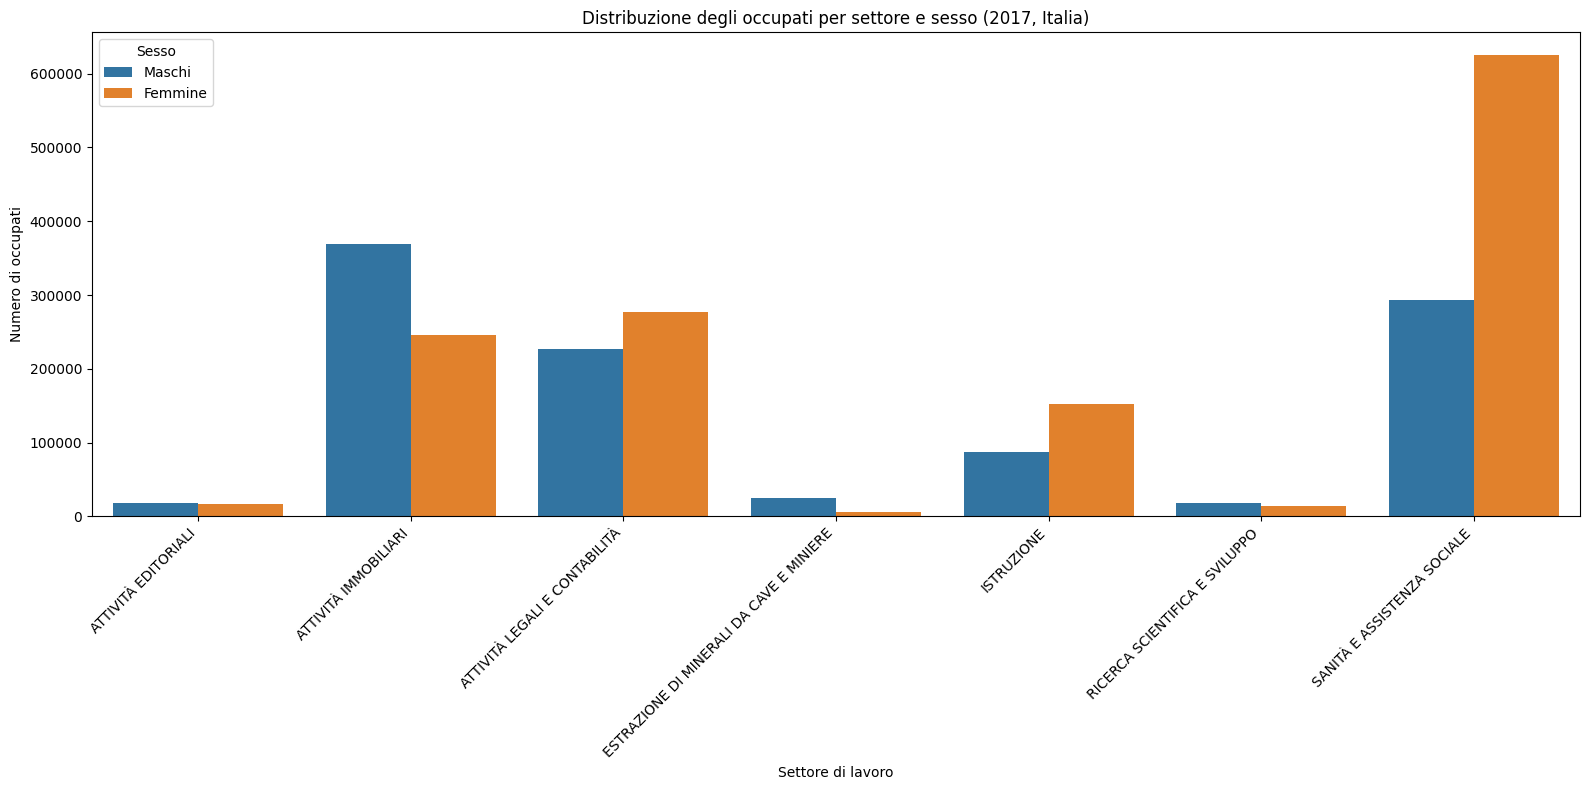

In [12]:
# Grafico
plt.figure(figsize=(16,8)) #imposto la dimensione della figura (larghezza x lunghezza), altrimenti veniva troppo piccolo
graf_ita_2017 = sns.barplot(  #creo un grafico con seaborn
    data=df_sesso_conc_2017_italia, #dataset da cui prendere i dati
    x='Settore di lavoro', 
    y='Occupati',
    hue='SESSO', #colore diverso per sesso
    palette= 'tab10', 
    dodge=True #affianca le barre maschi-femmine
)
plt.title('Distribuzione degli occupati per settore e sesso (2017, Italia)') #titolo del grafico
plt.xticks(rotation=45, ha='right') #ruota etichette asse x per una migliore leggibilità 
plt.xlabel('Settore di lavoro')
plt.ylabel('Numero di occupati')
plt.legend(title='Sesso') #mostra la legenda
plt.tight_layout() #adatta etichette al grafico per evitare ripetizioni. 
plt.show()

Il grafico a barre affiancate mostra con chiarezza determinate tendenze in base al settore lavorativo:
- **Attività editoriali:** mostra quasi una parità di occupazione, con una leggera prevalenza dei maschi.
- **Attività immobiliari:** il grafico mostra una prevalenza maschile nel settore.
- **Attività legali e contabilità:** dal grafico risulta una prevalenza femminile nel settore. *Questo risultato è interessante!*
- **Estrazione di minerali da cave e miniere:** come da attesa, prevalenza maschile, anche se con un'occupazione meno densa rispetto alle altre professioni.
- **Istruzione:** come da attesa, prevalenza femminile nel settore.
- **Ricerca e sviluppo:** leggera prevalenza degli uomini, ma disparità non eccessiva.
- **Sanità e assistenza sociale**: nettissima prevalenza femminile nel settore.

Il grafico mostra delle tendenze di settorializzazione di genere per questi settori presi in analisi: soltanto **Attività editoriali** mostra (quasi) una situazione di equilibrio, seppur, con prevalenza maschile. 

Salviamo il nuovo `df_sesso_conc_2017` e `istat_2017_italia`, in maniera da poterlo ritrovare e poterci lavorare.

In [13]:
df_sesso_conc_2017_italia.to_csv('output_progetto/analisi_istat/df_sesso_conc_2017_italia.csv', index=False, encoding='utf-8')

In [14]:
istat_2017_italia.to_csv("output_progetto/analisi_istat/istat_2017_italia.csv", index=False, encoding='utf-8') #Non ha la colonna SESSO, ma due colonne seaprate per Maschi e femmine, filtrato per Anno 2017 e Italia

In [15]:
istat_2017_italia

Anno Macroarea                         Settore di lavoro     Totale  \
0  2017    Italia                       ATTIVITÀ EDITORIALI   34819.83   
1  2017    Italia                      ATTIVITÀ IMMOBILIARI  614665.26   
2  2017    Italia             ATTIVITÀ LEGALI E CONTABILITÀ  503488.57   
3  2017    Italia  ESTRAZIONE DI MINERALI DA CAVE E MINIERE   30772.26   
4  2017    Italia                                ISTRUZIONE  240082.78   
5  2017    Italia            RICERCA SCIENTIFICA E SVILUPPO   32029.06   
6  2017    Italia               SANITÀ E ASSISTENZA SOCIALE  918539.05   

      Maschi    Femmine  % Maschi  % Femmine  
0   17684.92   17134.91     50.79      49.21  
1  368542.60  246122.66     59.96      40.04  
2  226584.39  276904.18     45.00      55.00  
3   25302.96    5469.30     82.23      17.77  
4   87499.20  152583.58     36.45      63.55  
5   18511.44   13517.62     57.80      42.20  
6  293726.99  624812.06     31.98      68.02

### Stampo i risultati del dataset per avere una maggiore visualizzazione complessiva dei dati numerici per ogni settore, appaiati per genere

Utilizzando il DataFrame già filtrato `istat_2017_italia` stampo in maniera leggibile per ogni settore il totale degli occupati, in valore assoluto, differenziando per maschi e femmine.

In questo modo, si possono controllare rapidamente i dati aggregati e confrontare le dimensioni dei due generi per ciascun settore lavorativo.


In [16]:
print("Occupati maschi e femmine per ciascun settore (valori assoluti) nel 2017 in Italia:") #Stampo intestazione

for i in range(len(istat_2017_italia)): #ciclo per la lunghezza del df istat_2017_italia per estrarre le righe
    settore = istat_2017_italia.loc[i, 'Settore di lavoro'] #estraggo i settori
    maschi = int(istat_2017_italia.loc[i, 'Maschi']) #estraggo i maschi, convertendoli in numeri interi
    femmine = int(istat_2017_italia.loc[i, 'Femmine']) #estraggo le femmine, convertendoli in numeri interi

    print(f"\nSettore di lavoro: {settore}")  #stampo i risultati in maniera leggibile
    print(f"Femmine: {femmine} occupate")
    print(f"Maschi: {maschi} occupati")
 

Occupati maschi e femmine per ciascun settore (valori assoluti) nel 2017 in Italia:

Settore di lavoro: ATTIVITÀ EDITORIALI
Femmine: 17134 occupate
Maschi: 17684 occupati

Settore di lavoro: ATTIVITÀ IMMOBILIARI
Femmine: 246122 occupate
Maschi: 368542 occupati

Settore di lavoro: ATTIVITÀ LEGALI E CONTABILITÀ
Femmine: 276904 occupate
Maschi: 226584 occupati

Settore di lavoro: ESTRAZIONE DI MINERALI DA CAVE E MINIERE
Femmine: 5469 occupate
Maschi: 25302 occupati

Settore di lavoro: ISTRUZIONE
Femmine: 152583 occupate
Maschi: 87499 occupati

Settore di lavoro: RICERCA SCIENTIFICA E SVILUPPO
Femmine: 13517 occupate
Maschi: 18511 occupati

Settore di lavoro: SANITÀ E ASSISTENZA SOCIALE
Femmine: 624812 occupate
Maschi: 293726 occupati


### Stampo, allo stesso modo, la percentuale interna di genere per ciascun settore (2017, Italia)

Ora stampo la distribuzione interna di genere all'interno di ciascun settore lavorativo.  

Questa visualizzazione aiuta a identificare settori a predominanza maschile o femminile, evidenziando eventuali squilibri strutturali di genere.


In [17]:
print("Percentuale di maschi e femmine all’interno di ciascun settore nel 2017 in Italia:")

for i in range(len(istat_2017_italia)):
    settore = istat_2017_italia.loc[i, 'Settore di lavoro']
    perc_maschi = istat_2017_italia.loc[i, '% Maschi']
    perc_femmine = istat_2017_italia.loc[i, '% Femmine']
    
    print(f"\nSettore di lavoro: {settore}")
    print(f"Maschi: {perc_maschi:.2f}%")
    print(f"Femmine: {perc_femmine:.2f}%")


Percentuale di maschi e femmine all’interno di ciascun settore nel 2017 in Italia:

Settore di lavoro: ATTIVITÀ EDITORIALI
Maschi: 50.79%
Femmine: 49.21%

Settore di lavoro: ATTIVITÀ IMMOBILIARI
Maschi: 59.96%
Femmine: 40.04%

Settore di lavoro: ATTIVITÀ LEGALI E CONTABILITÀ
Maschi: 45.00%
Femmine: 55.00%

Settore di lavoro: ESTRAZIONE DI MINERALI DA CAVE E MINIERE
Maschi: 82.23%
Femmine: 17.77%

Settore di lavoro: ISTRUZIONE
Maschi: 36.45%
Femmine: 63.55%

Settore di lavoro: RICERCA SCIENTIFICA E SVILUPPO
Maschi: 57.80%
Femmine: 42.20%

Settore di lavoro: SANITÀ E ASSISTENZA SOCIALE
Maschi: 31.98%
Femmine: 68.02%


## Analisi percentuale degli occupati per sesso e settore (2017, Italia)

Ora procedo a calcolare la percentuale di lavoratori maschi e femmine impiegati in ciascun settore selezionato, rapportata al totale nazionale degli occupati dello stesso sesso nel 2017. L'obiettivo è quantificare il peso specifico di ciascun settore all'interno dell'occupazione maschile e femminile.

Procedimento:

- Seleziono dal dataset completo `istat_pulito` le righe relative al totale nazionale, ovvero quelle in cui il campo *Settore di lavoro* corrisponde a *Tutte le professioni* o *Totale*.
- Raggruppo i dati per sesso, sommando il numero di occupati nel 2017, per ottenere il totale nazionale di Maschi e Femmine occupati.
- Unisco questo totale al dataset `df_sesso_conc_2017_italia` contenente le informazioni dei settori per l'anno 2017.
- Calcolo la percentuale di occupati in ciascun settore rispetto al totale nazionale per sesso.
- Stampo i risultati in modo chiaro, distinguendo settore per settore la percentuale di uomini e donne occupati.

Questa analisi permette di valutare l’incidenza di ciascun settore sul totale nazionale per genere, mettendo in evidenza l’importanza relativa di ogni settore nella composizione dell’occupazione maschile e femminile.


In [18]:
df_totali_nazionali = istat_pulito[istat_pulito['SETTORE DI LAVORO'].str.upper().isin(['TUTTE LE PROFESSIONI', 'TOTALE'])] #Filtro righe dove 'SETTORE DI LAVORO' è "Tutte le professioni" o "Totale"
 
totale_per_sesso_italia = df_totali_nazionali.groupby('SESSO')['2017'].sum().reset_index().rename(columns={'2017': 'Totale sesso italia'}) # Raggruppa per sesso e somma il 2017

#merge con i dati dei settori scelti
df_percentuali_generali = df_sesso_conc_2017_italia.merge(totale_per_sesso_italia, on='SESSO')

#Calcolo la percentuale rispetto al totale nazionale, per ottenere la percentuale di occupazione in base al sesso e a tutti i settori, per i settori in analisi
df_percentuali_generali['Percentuale generale'] = round((df_percentuali_generali['Occupati'] / df_percentuali_generali['Totale sesso italia']) * 100, 2)

df_percentuali_generali

Macroarea                         Settore di lavoro  Anno    SESSO  \
0     Italia                       ATTIVITÀ EDITORIALI  2017   Maschi   
1     Italia                      ATTIVITÀ IMMOBILIARI  2017   Maschi   
2     Italia             ATTIVITÀ LEGALI E CONTABILITÀ  2017   Maschi   
3     Italia  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017   Maschi   
4     Italia                                ISTRUZIONE  2017   Maschi   
5     Italia            RICERCA SCIENTIFICA E SVILUPPO  2017   Maschi   
6     Italia               SANITÀ E ASSISTENZA SOCIALE  2017   Maschi   
7     Italia                       ATTIVITÀ EDITORIALI  2017  Femmine   
8     Italia                      ATTIVITÀ IMMOBILIARI  2017  Femmine   
9     Italia             ATTIVITÀ LEGALI E CONTABILITÀ  2017  Femmine   
10    Italia  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017  Femmine   
11    Italia                                ISTRUZIONE  2017  Femmine   
12    Italia            RICERCA SCIENTIFICA E SVILUPPO  2017  Femmine   
13    Italia               SANITÀ E ASSISTENZA SOCIALE  2017  Femmine   

     Occupati  Percentuale  Totale sesso italia  Percentuale generale  
0    17684.92        50.79          32870713.79                  0.05  
1   368542.60        59.96          32870713.79                  1.12  
2   226584.39        45.00          32870713.79                  0.69  
3    25302.96        82.23          32870713.79                  0.08  
4    87499.20        36.45          32870713.79                  0.27  
5    18511.44        57.80          32870713.79                  0.06  
6   293726.99        31.98          32870713.79                  0.89  
7    17134.91        49.21          20073473.56                  0.09  
8   246122.66        40.04          20073473.56                  1.23  
9   276904.18        55.00          20073473.56                  1.38  
10    5469.30        17.77          20073473.56                  0.03  
11  152583.58        63.55          20073473.56                  0.76  
12   13517.62        42.20          20073473.56                  0.07  
13  624812.06        68.02          20073473.56                  3.11

In [19]:
#Stampo i risultati
print('\n\nPercentuale dei lavoratori maschi e femmine impiegati in ciascun settore (sul totale nazionale realistico) nel 2017:')

for settore in df_percentuali_generali['Settore di lavoro'].unique():
    print(f"\nSettore di lavoro: {settore}")
    for sesso in ['Femmine', 'Maschi']:
        valore = df_percentuali_generali.loc[
            (df_percentuali_generali['Settore di lavoro'] == settore) &
            (df_percentuali_generali['SESSO'] == sesso), 'Percentuale generale']
        if not valore.empty:
            print(f"{sesso}: {valore.iloc[0]}%")



Percentuale dei lavoratori maschi e femmine impiegati in ciascun settore (sul totale nazionale realistico) nel 2017:

Settore di lavoro: ATTIVITÀ EDITORIALI
Femmine: 0.09%
Maschi: 0.05%

Settore di lavoro: ATTIVITÀ IMMOBILIARI
Femmine: 1.23%
Maschi: 1.12%

Settore di lavoro: ATTIVITÀ LEGALI E CONTABILITÀ
Femmine: 1.38%
Maschi: 0.69%

Settore di lavoro: ESTRAZIONE DI MINERALI DA CAVE E MINIERE
Femmine: 0.03%
Maschi: 0.08%

Settore di lavoro: ISTRUZIONE
Femmine: 0.76%
Maschi: 0.27%

Settore di lavoro: RICERCA SCIENTIFICA E SVILUPPO
Femmine: 0.07%
Maschi: 0.06%

Settore di lavoro: SANITÀ E ASSISTENZA SOCIALE
Femmine: 3.11%
Maschi: 0.89%


Da questa stampa emergono risultati interessanti: 
- **Sanità e assistenza sociale**: si osserva un'incidenza importante per l'occupazione femminile (circa il 3%) sul totale, confermando così la maggior occupazione femminile in quesot settore lavorativo.
- **Attività immobiliari**: vedeva (nelle percentuali interne al settore) una prevalenza maschile, ma da questa analisi risulta che, nell'incidenza lavorativa totale, sono più le donne impegnate in questo settore che non gli uomini (0.10% di differenza).
- **Attività legali e contabilità**: dall'analisi emerge una prelavelanza di circa il doppio delle donne rispetto agli uomini impegnati in questo settore.

I restanti settori confermano ciò che si era osservato precedentemente a livello di distribuzione di genere.

Creo un nuovo dataset per continuare con l'analisi (`df_percentuali_2017_italia`): in questo modo ho un dataset contenente le percentuali nel settore e le percentuali in generale tra tutti gli occupati. Lo ordinerò per settore lavorativo.

In [20]:
df_percentuali_2017_italia = df_percentuali_generali.copy()

#Rinomino la colonna 'Percentuale' per chiarezza: è la percentuale interna al settore
df_percentuali_2017_italia = df_percentuali_2017_italia.rename(columns={'Percentuale': 'Percentuale nel settore'})

# Tengo solo le colonne rilevanti
df_percentuali_2017_italia = df_percentuali_2017_italia[[
    'Macroarea', 'Anno', 'Settore di lavoro', 'SESSO', 'Occupati', 
    'Percentuale nel settore', 'Percentuale generale'
]]

df_percentuali_2017_italia #In questo modo ho prima i maschi e poi le femmine

Macroarea  Anno                         Settore di lavoro    SESSO  \
0     Italia  2017                       ATTIVITÀ EDITORIALI   Maschi   
1     Italia  2017                      ATTIVITÀ IMMOBILIARI   Maschi   
2     Italia  2017             ATTIVITÀ LEGALI E CONTABILITÀ   Maschi   
3     Italia  2017  ESTRAZIONE DI MINERALI DA CAVE E MINIERE   Maschi   
4     Italia  2017                                ISTRUZIONE   Maschi   
5     Italia  2017            RICERCA SCIENTIFICA E SVILUPPO   Maschi   
6     Italia  2017               SANITÀ E ASSISTENZA SOCIALE   Maschi   
7     Italia  2017                       ATTIVITÀ EDITORIALI  Femmine   
8     Italia  2017                      ATTIVITÀ IMMOBILIARI  Femmine   
9     Italia  2017             ATTIVITÀ LEGALI E CONTABILITÀ  Femmine   
10    Italia  2017  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  Femmine   
11    Italia  2017                                ISTRUZIONE  Femmine   
12    Italia  2017            RICERCA SCIENTIFICA E SVILUPPO  Femmine   
13    Italia  2017               SANITÀ E ASSISTENZA SOCIALE  Femmine   

     Occupati  Percentuale nel settore  Percentuale generale  
0    17684.92                    50.79                  0.05  
1   368542.60                    59.96                  1.12  
2   226584.39                    45.00                  0.69  
3    25302.96                    82.23                  0.08  
4    87499.20                    36.45                  0.27  
5    18511.44                    57.80                  0.06  
6   293726.99                    31.98                  0.89  
7    17134.91                    49.21                  0.09  
8   246122.66                    40.04                  1.23  
9   276904.18                    55.00                  1.38  
10    5469.30                    17.77                  0.03  
11  152583.58                    63.55                  0.76  
12   13517.62                    42.20                  0.07  
13  624812.06                    68.02                  3.11

In [21]:
ordine_settori = list(df_percentuali_2017_italia.sort_values("Percentuale generale", ascending=False)["Settore di lavoro"]) #decido l'ordine dei settori

settore_ordine_list = [] #Creo una lista con l'indice di ogni settore rispetto all'ordine desiderato
lista_settori = list(ordine_settori)  #lista ordinata dei settori

for settore in df_percentuali_2017_italia['Settore di lavoro']: #ciclo per ogni settore
    idx = lista_settori.index(settore)  #trova la posizione del settore
    settore_ordine_list.append(idx) #lo aggiunge all'indice

df_percentuali_2017_italia['Settore ordine'] = settore_ordine_list #Aggiungo questa lista come nuova colonna per ordinare

df_percentuali_2017_italia = df_percentuali_2017_italia.sort_values(by=['Settore ordine'], ascending=[True]).reset_index(drop=True)  #Ordino in base a questa colonna e al sesso

df_percentuali_2017_italia.drop(columns='Settore ordine', inplace=True) #Elimino la colonna usata per ordinare il df
df_percentuali_2017_italia #ora è ordinato per settore

Macroarea  Anno                         Settore di lavoro    SESSO  \
0     Italia  2017               SANITÀ E ASSISTENZA SOCIALE   Maschi   
1     Italia  2017               SANITÀ E ASSISTENZA SOCIALE  Femmine   
2     Italia  2017             ATTIVITÀ LEGALI E CONTABILITÀ  Femmine   
3     Italia  2017             ATTIVITÀ LEGALI E CONTABILITÀ   Maschi   
4     Italia  2017                      ATTIVITÀ IMMOBILIARI   Maschi   
5     Italia  2017                      ATTIVITÀ IMMOBILIARI  Femmine   
6     Italia  2017                                ISTRUZIONE  Femmine   
7     Italia  2017                                ISTRUZIONE   Maschi   
8     Italia  2017                       ATTIVITÀ EDITORIALI   Maschi   
9     Italia  2017                       ATTIVITÀ EDITORIALI  Femmine   
10    Italia  2017  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  Femmine   
11    Italia  2017  ESTRAZIONE DI MINERALI DA CAVE E MINIERE   Maschi   
12    Italia  2017            RICERCA SCIENTIFICA E SVILUPPO   Maschi   
13    Italia  2017            RICERCA SCIENTIFICA E SVILUPPO  Femmine   

     Occupati  Percentuale nel settore  Percentuale generale  
0   293726.99                    31.98                  0.89  
1   624812.06                    68.02                  3.11  
2   276904.18                    55.00                  1.38  
3   226584.39                    45.00                  0.69  
4   368542.60                    59.96                  1.12  
5   246122.66                    40.04                  1.23  
6   152583.58                    63.55                  0.76  
7    87499.20                    36.45                  0.27  
8    17684.92                    50.79                  0.05  
9    17134.91                    49.21                  0.09  
10    5469.30                    17.77                  0.03  
11   25302.96                    82.23                  0.08  
12   18511.44                    57.80                  0.06  
13   13517.62                    42.20                  0.07

In [22]:
df_percentuali_2017_italia.to_csv("output_progetto/analisi_istat/percentuali/df_percentuali_2017_italia.csv", index=False, encoding='utf-8') #salvo il df

## Grafico della distribuzione percentuale degli occupati per sesso e settore (2017)

Creo un grafico a barre orizzontali affiancate che mostra la percentuale di lavoratori maschi e femmine occupati in ciascun settore selezionato.

Il grafico mette in evidenza i comparti lavorativi a maggiore prevalenza di donne o uomini, consentendo una lettura immediata delle differenze di genere nel mercato del lavoro italiano.


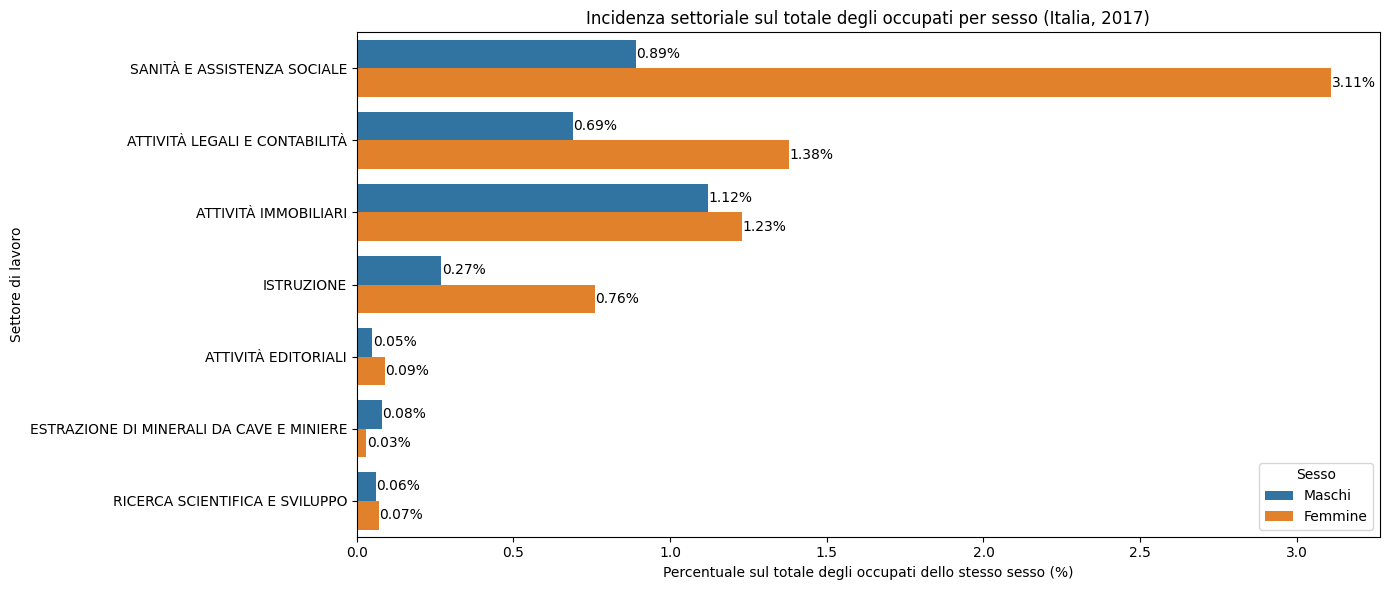

In [23]:
plt.figure(figsize=(14, 6)) #imposto la grandezza del grafico

#Grafico a barre orizzontali raggruppate per sesso e settore
graf_bar_perc_gen = sns.barplot(
    data=df_percentuali_2017_italia,
    y="Settore di lavoro",
    x="Percentuale generale",
    hue="SESSO",
    palette="tab10"
)

#Aggiungo delle etichette percentuali su ogni barra
for bar in graf_bar_perc_gen.patches: #uso metodo .patches per accedere alle proprietà di ogni barra 
    width = bar.get_width() #lunghezza della barra orizzontale
    y = bar.get_y() + bar.get_height() / 2  #calcola posizione verticale centrale: aggiunge etichetta esattamente alla fine della barra: margine inferiore + metà altezza (essendo a barre doppie)

    #Scrive l’etichetta solo se la barra è visibile
    if abs(width) > 0.0005:  # cioè > 0.05%
        plt.text(  #scrivo accanto alla barra a destra la percentuale
            width + 0.002,
            y,
            f"{width:.2f}%", 
            va='center'
        )

plt.title('Incidenza settoriale sul totale degli occupati per sesso (Italia, 2017)')
plt.xlabel('Percentuale sul totale degli occupati dello stesso sesso (%)')
plt.ylabel('Settore di lavoro')
plt.legend(title='Sesso')
plt.tight_layout()
plt.show()


### Interpretazione del grafico

Il grafico mostra la distribuzione percentuale degli occupati maschi e femmine in ciascun settore selezionato, calcolata rispetto al totale nazionale degli occupati del rispettivo sesso nel 2017.

Si nota chiaramente come settori quali **Sanità e Assistenza Sociale**, **Istruzione** abbiano un’incidenza molto più elevata sul totale delle lavoratrici rispetto a quella degli uomini, evidenziando una forte presenza femminile: in particolare il 3.11% delle donne occupate nel 2017 lavoravano nel settore **Sanità e assistenza sociale** (come precedentemente riportato).  
Al contrario, in settori come **Estrazione di Minerali da Cave e Miniere** e **Attività Immobiliari** la presenza maschile risulta più consistente. Da notare che nel settore **Estrazione di Minerali da Cave e Miniere** ha una bassa occupazione. 

Questi dati danno un'idea della distribuzione occupazionale in base al genere, mostrando una netta prevalenza di donne soprattutto in settori quali **Sanità e Assistenza Sociale**, **Istruzione** e, sorprendentemente anche in **Attività Legali e Contabilità**.


## Calcolo del Gender Gap per settore (2017) in Italia

Il Gender Gap indica la differenza percentuale tra la quota di maschi e quella di femmine all’interno di ciascun settore lavorativo.

Calcolo e stampo questa differenza per ogni settore selezionato, usando le percentuali interne al settore (cioè maschi e femmine considerati solo all’interno di quel settore).

Un valore positivo indica prevalenza maschile, mentre un valore negativo indica prevalenza femminile.


In [24]:
gender_gap_2017_italia = {}  #Creo un dizionario per memorizzare i dati di percentuale per settore e sesso

for settore in df_percentuali_2017_italia['Settore di lavoro'].unique(): #Ciclo su tutti i settori unici e le percentuali interne al settore
    df_subset= df_percentuali_2017_italia[df_percentuali_2017_italia['Settore di lavoro'] == settore] #Creo un subset e seleziono solo le righe corrispondenti al settore in analisi nel ciclo (in modo da lavorare su quelle)
   
    maschi = df_subset.loc[df_subset['SESSO'] == 'Maschi', 'Percentuale nel settore'] #estraggo la percentuale di maschi per il settore
    
    femmine = df_subset.loc[df_subset['SESSO'] == 'Femmine', 'Percentuale nel settore'] #Estraggo la percentuale di femmine per il settore
    
    gender_gap_2017_italia[settore] = {  #popolo il dizionario
        'Maschi': maschi.iloc[0], 
        'Femmine': femmine.iloc[0],
        'Gender Gap': maschi.iloc[0] - femmine.iloc[0]
    }

print("\n\nGender Gap percentuale tra uomini e donne nei settori lavorativi in Italia (2017)") #Stampo intestazione

for settore, valori in gender_gap_2017_italia.items(): #ciclo per stampare in maniera leggibile i riusltati 
    print(f"\nSettore: {settore}")
    print(f"Gender Gap: {valori['Gender Gap']:.2f}% (Maschi {valori['Maschi']:.2f}% vs Femmine {valori['Femmine']:.2f}%)")



Gender Gap percentuale tra uomini e donne nei settori lavorativi in Italia (2017)

Settore: SANITÀ E ASSISTENZA SOCIALE
Gender Gap: -36.04% (Maschi 31.98% vs Femmine 68.02%)

Settore: ATTIVITÀ LEGALI E CONTABILITÀ
Gender Gap: -10.00% (Maschi 45.00% vs Femmine 55.00%)

Settore: ATTIVITÀ IMMOBILIARI
Gender Gap: 19.92% (Maschi 59.96% vs Femmine 40.04%)

Settore: ISTRUZIONE
Gender Gap: -27.10% (Maschi 36.45% vs Femmine 63.55%)

Settore: ATTIVITÀ EDITORIALI
Gender Gap: 1.58% (Maschi 50.79% vs Femmine 49.21%)

Settore: ESTRAZIONE DI MINERALI DA CAVE E MINIERE
Gender Gap: 64.46% (Maschi 82.23% vs Femmine 17.77%)

Settore: RICERCA SCIENTIFICA E SVILUPPO
Gender Gap: 15.60% (Maschi 57.80% vs Femmine 42.20%)


## Creo un DataFrame riepilogativo per l'Italia (2017)

Costruisco un DataFrame riassuntivo con le percentuali di occupazione maschile e femminile nei settori lavorativi selezionati, limitandoci al dato nazionale (italia) del 2017.

Per ciascun settore:
- Seleziono la percentuale di uomini e donne sul totale degli occupati in quel settore.
- Calcolo il **gender gap** come differenza tra le due percentuali.

Il risultato è una tabella riepilogativa che rappresenta in modo sintetico la distribuzione di genere nel mondo del lavoro in Italia, all'interno dei settori.


In [25]:
df_gender_gap_2017_italia = pd.DataFrame.from_dict(gender_gap_2017_italia, orient='index') #creo df a partire dal dizionario appena costruito

#Imposto come colonna i nomi dei settori
df_gender_gap_2017_italia.reset_index(inplace=True)
df_gender_gap_2017_italia.rename(columns={'index': 'Settore di lavoro'}, inplace=True)


#Rinomino le colonne
df_gender_gap_2017_italia = df_gender_gap_2017_italia.rename(columns={
    'Settore di laovoro': 'Settore di lavoro',
    'Maschi': '% Maschi (settore)',
    'Femmine': '% Femmine (settore)',
    'Gender Gap': 'Gender Gap (settore)'
})

df_gender_gap_2017_italia['Macroarea'] = df_sesso_conc_2017_italia['Macroarea'] #aggiungo le colonne macroarea e anno
df_gender_gap_2017_italia['Anno'] = df_sesso_conc_2017_italia['Anno']

df_gender_gap_2017_italia = df_gender_gap_2017_italia[[
    'Anno',
    'Macroarea',
    'Settore di lavoro',
    '% Maschi (settore)',
    '% Femmine (settore)',
    'Gender Gap (settore)'
]]


df_gender_gap_2017_italia


Anno Macroarea                         Settore di lavoro  \
0  2017    Italia               SANITÀ E ASSISTENZA SOCIALE   
1  2017    Italia             ATTIVITÀ LEGALI E CONTABILITÀ   
2  2017    Italia                      ATTIVITÀ IMMOBILIARI   
3  2017    Italia                                ISTRUZIONE   
4  2017    Italia                       ATTIVITÀ EDITORIALI   
5  2017    Italia  ESTRAZIONE DI MINERALI DA CAVE E MINIERE   
6  2017    Italia            RICERCA SCIENTIFICA E SVILUPPO   

   % Maschi (settore)  % Femmine (settore)  Gender Gap (settore)  
0               31.98                68.02                -36.04  
1               45.00                55.00                -10.00  
2               59.96                40.04                 19.92  
3               36.45                63.55                -27.10  
4               50.79                49.21                  1.58  
5               82.23                17.77                 64.46  
6               57.80                42.20                 15.60

In [26]:
df_gender_gap_2017_italia.to_csv('output_progetto/analisi_istat/gender_gap/df_gender_gap_2017_italia.csv', index=False)

### Interpretazione del Gender Gap per settore

Un **Gender Gap positivo** indica una prevalenza maschile, mentre un **Gender Gap negativo** indica una prevalenza femminile.

Dalla visualizzazione del DataFrame emerge:

- Settori come **Estrazione di Minerali da Cave e Miniere** mostrano un forte predominio maschile (oltre il 64%), mentre in **Sanità e Assistenza Sociale** e **Istruzione** la presenza femminile è nettamente maggiore (con Gender Gap negativi intorno al 27-36%).
- Alcuni settori, come **Attività Editoriali** e **Attività Legali e Contabilità**, mostrano un bilanciamento più equilibrato o una leggera prevalenza femminile.

Questi dati confermano come la distribuzione occupazionale per genere in Italia sia ancora fortemente settorializzata, evidenziando fenomeni di segregazione orizzontale nel mercato del lavoro.


## Grafico del Sex Gap per settore (2017)

Questo grafico a barre orizzontali mostra la differenza percentuale tra occupati maschi e femmine all’interno di ciascun settore.

- Le barre blu indicano una maggioranza maschile nel settore, mentre le barre rosse indicano una maggioranza femminile.
- La linea verticale a zero rappresenta l’equilibrio perfetto tra i due sessi.
- La lunghezza e la direzione della barra indicano l’entità e il verso del gap di genere.

Questa rappresentazione visiva facilita la comprensione della distribuzione di genere nei diversi ambiti lavorativi e rende evidenti le aree con maggiore squilibrio.


In [27]:
#df_percentuali_settore

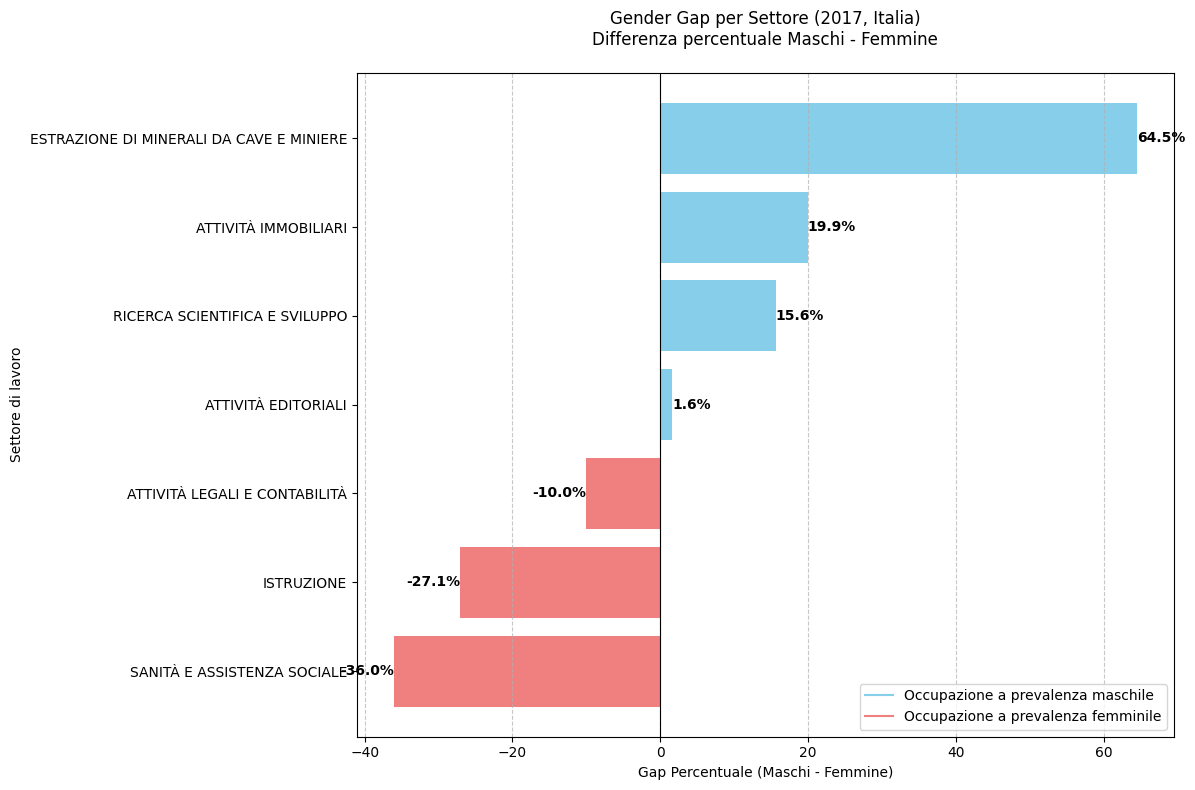

In [28]:
df_gender_gap_2017_italia_sorted = df_gender_gap_2017_italia.sort_values('Gender Gap (settore)') #Ordino il df in ordine di gender gap: da femminile (valori negativi) a maschile (valori positivi)

settori = df_gender_gap_2017_italia_sorted['Settore di lavoro']  #per comodità, nomino variabili e assegno i valori che voglio analizzare nel grafico
gap_values = df_gender_gap_2017_italia_sorted['Gender Gap (settore)']

col_maschi = 'skyblue'
col_femmine= 'lightcoral'

colors = [col_maschi if gap > 0 else col_femmine for gap in gap_values] #Assegno colori alle barre in base al segno del gender gap: skyblue se positivo (maschi), altrimenti rosso se negativo (femmine)

#Creo il grafico a barre orizzontali
plt.figure(figsize=(12, 8))
#graf_barh_gender_gap_settore = plt.barh (settori, gap_values, color=colors)
graf_barh_gender_gap_settore = plt.barh (settori, gap_values, color=colors)
#Imposto titoli ed etichette degli assi
plt.title('Gender Gap per Settore (2017, Italia)\nDifferenza percentuale Maschi - Femmine', pad=20)
plt.xlabel('Gap Percentuale (Maschi - Femmine)')
plt.ylabel('Settore di lavoro')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Aggiungo i valori percentuali sulle barre
for bar in graf_barh_gender_gap_settore: #Scorro ogni barra del grafico
    width = bar.get_width()    #Ottengo lunghezza della barra (il suo valore numerico associato: gender gap percentuale)
    label = f"{width:.1f}%"    #Creo stringa per mostrare il valore sulle barre
    if width > 0:  #se il valore è positivo 
        plt.text(width, bar.get_y() + bar.get_height() / 2, label, #posiziono il testo alla fine della barra, allineato a destra in modo da non sovrapporsi con la barra
                 ha='left', va='center', fontweight='bold')
    else:    #altrimenti
        plt.text(width, bar.get_y() + bar.get_height() / 2, label,   #testo a sinistra della barra senza sovrapporsi ad essa
                 ha='right', va='center', fontweight='bold')

plt.axvline(0, color='black', linewidth=0.8)  # Linea di  verticale in corrispondenza dello 0: per separare valori positivi e negativi

#imposto i colori che avrà la legenda
plt.plot([], [], color=col_maschi, label='Occupazione a prevalenza maschile') #maschi
plt.plot([], [], color=col_femmine, label='Occupazione a prevalenza femminile') #femmine



plt.legend(loc='best') #faccio la legenda

plt.tight_layout()  #evita tagli al grafico
plt.show() 


Emerge che settori quali **Sanità e assistenza sociale**, **Istruzione** mostrino una netta prevalenza femminile, gli altri settori, invece o sono in equilibrio (**Attività editoriali**), o hanno prevalenza maschi .
Nota per **Attività legali e contabilità**: mi sarei aspettata un gap a favore maschile, invece è a favore femminile!

## 1b) Analisi per Macroaree, Sesso e Settore nel 2017

In questa fase dell'analisi, si esaminano i dati relativi agli occupati suddivisi per macroarea geografica, sesso e settore di lavoro nell'anno 2017.

Le macroaree considerate sono: **Nord-ovest, Nord-est, Centro, Sud e Isole**.

Per ogni combinazione di macroarea e settore, si confrontano il numero di occupati maschi e femmine, e le rispettive percentuali, infine, il Gender Gap.

I dati sono stati organizzati in un unico DataFrame che facilita analisi e visualizzazioni comparative tra sesso e area geografica.


#### Come per l'analisi precedente, a partiere dal DataFrame  `istat_analisi_macroaree_anni` si crea un nuovo dataset (questa volta con melt) per accorpare i dati inerenti al sesso in un'unica colonna e, anche per le percentuali, per le macroaree (esclusa l'Italia).

In [29]:
#Seleziono le macroaree di interesse e filtro il dataset
macroaree_selezionate = ["Nord-ovest", "Nord-est", "Centro", "Sud", "Isole"] #nel df istat_analisi_macroaree_anni era compresa anche l'Italia, che ora voglio escludere dall'analisi

istat_2017_macroaree = istat_analisi_macroaree_anni[ #filtro per anno e macroarea
    (istat_analisi_macroaree_anni['Anno'] == 2017) &
    (istat_analisi_macroaree_anni['Macroarea'].isin(macroaree_selezionate))].reset_index(drop=True)


sesso_unito_col = istat_2017_macroaree.melt(  #Uso .melt per trasformare le colonne 'Maschi' e 'Femmine' in righe, in modo da avere una colonna 'Sesso' e una colonna 'Occupati' corrispondente
    id_vars=['Macroarea', 'Settore di lavoro', 'Anno'], #colonne che voglio mantenere così come sono
    value_vars=['Maschi', 'Femmine'], #colonne da trasformare in righe
    var_name='Sesso', #Nome della nuova colonna che conterrà 'Maschi' e 'Femmine'
    value_name='Occupati'  #Nome della colonna che conterrà i risultati numerici
)

percentuali_unite_col = istat_2017_macroaree.melt(    #stessa logica di sopra, solo con le percentuali
    id_vars=['Macroarea', 'Settore di lavoro', 'Anno'],
    value_vars=['% Maschi', '% Femmine'],
    var_name='Sesso',
    value_name='Percentuale'
)


percentuali_unite_col['Sesso'] = percentuali_unite_col['Sesso'].str.replace('% ', '', regex=False) #Eimino il prefisso 'Perc_' per avere solo 'Maschi' e 'Femmine'

#Unisco i due DataFrame sul sesso e sulle altre colonne chiave [Macroarea, settore di lavoro, anno e sesso]
df_sesso_conc_2017_macroaree = sesso_unito_col.merge(
    percentuali_unite_col[['Macroarea', 'Settore di lavoro', 'Anno', 'Sesso', 'Percentuale']],
    on=['Macroarea', 'Settore di lavoro', 'Anno', 'Sesso']).reset_index(drop=True) #colonne su cui applico il merge, resettando l'indice in modo che sia ordinato

df_sesso_conc_2017_macroaree #visualizzo il nuovo df

Macroarea                         Settore di lavoro  Anno    Sesso  \
0     Centro                       ATTIVITÀ EDITORIALI  2017   Maschi   
1     Centro                      ATTIVITÀ IMMOBILIARI  2017   Maschi   
2     Centro             ATTIVITÀ LEGALI E CONTABILITÀ  2017   Maschi   
3     Centro  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017   Maschi   
4     Centro                                ISTRUZIONE  2017   Maschi   
..       ...                                       ...   ...      ...   
65       Sud             ATTIVITÀ LEGALI E CONTABILITÀ  2017  Femmine   
66       Sud  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017  Femmine   
67       Sud                                ISTRUZIONE  2017  Femmine   
68       Sud            RICERCA SCIENTIFICA E SVILUPPO  2017  Femmine   
69       Sud               SANITÀ E ASSISTENZA SOCIALE  2017  Femmine   

    Occupati  Percentuale  
0    2953.42        50.80  
1   84316.72        59.03  
2   51625.40        45.31  
3   13243.21        76.68  
4   17852.00        33.19  
..       ...          ...  
65  40957.35        41.67  
66    302.37         8.51  
67  30725.38        66.90  
68   1442.49        42.02  
69  99364.61        61.10  

[70 rows x 6 columns]

In [30]:
df_sesso_conc_2017_macroaree.to_csv("output_progetto/analisi_istat/df_sesso_conc_2017_macroaree.csv", index=False, encoding='utf-8') #Salvo il nuovo df
istat_2017_macroaree.to_csv("output_progetto/analisi_istat/istat_2017_macroaree.csv", index=False, encoding='utf-8')

## Grafico della distribuzione percentuale degli occupati per settore, sesso e macroarea (2017)

Per ogni macroarea geografica selezionata, questo grafico mostra la percentuale di lavoratori maschi e femmine suddivisi per settore di lavoro.

L’obiettivo è mettere in evidenza le differenze di genere nella distribuzione occupazionale nelle diverse aree geografiche italiane, evidenziando le peculiarità territoriali per il 2017 (1 grafico per ogni macroarea).


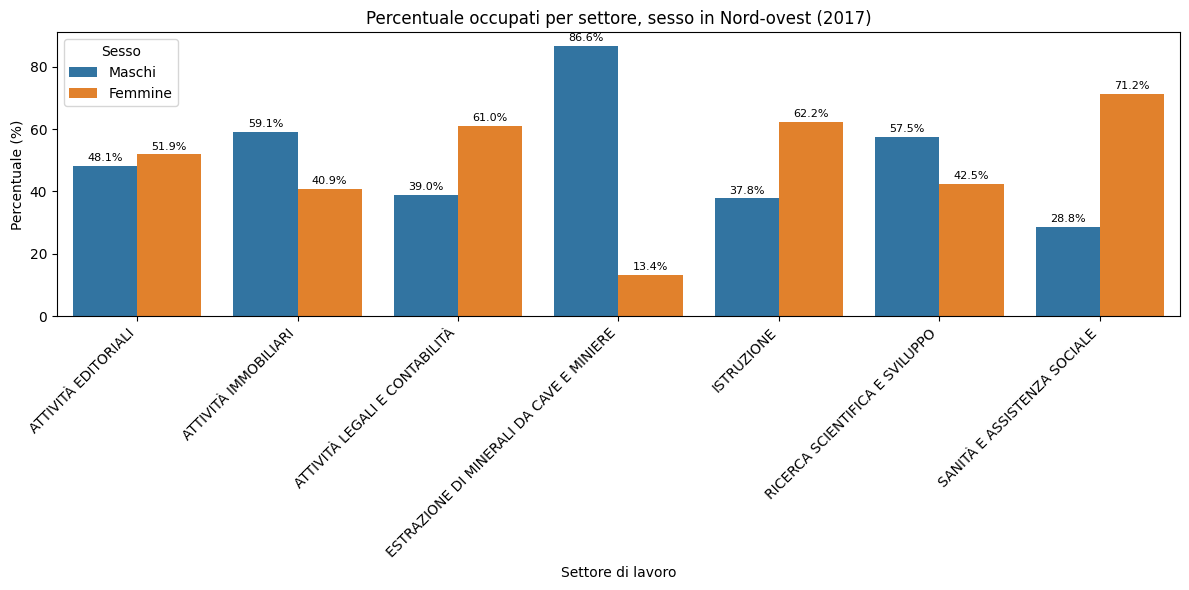

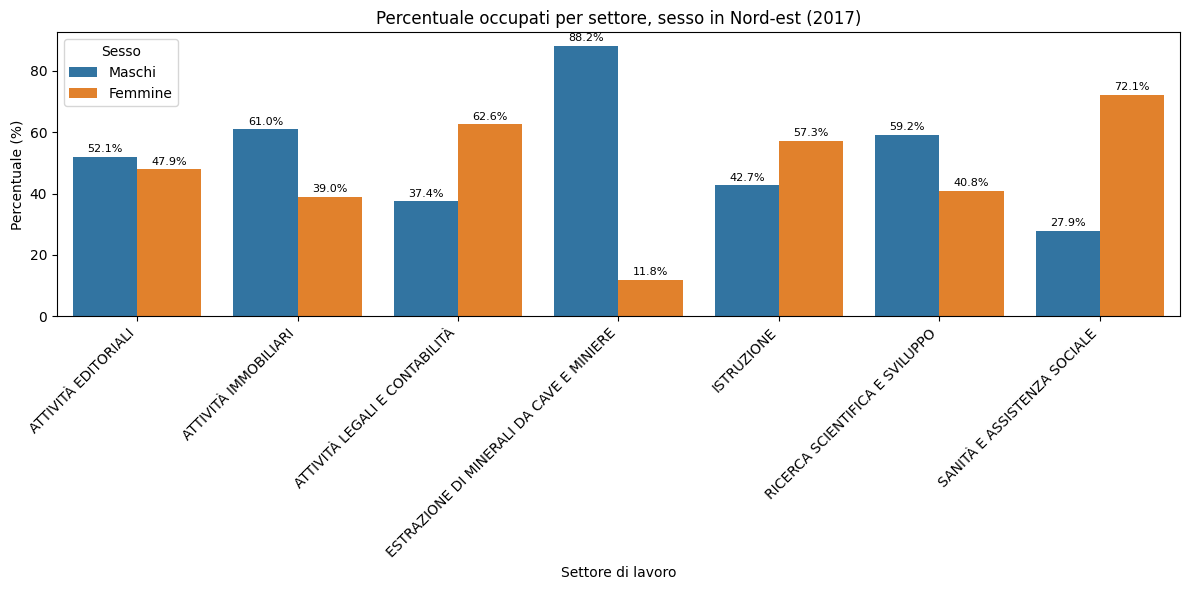

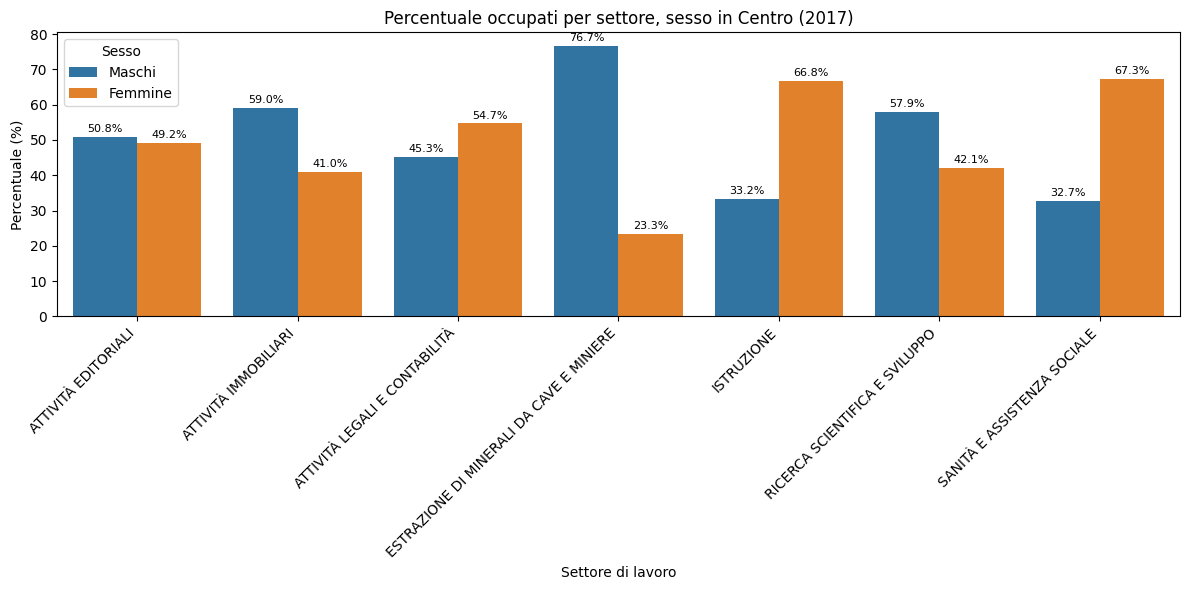

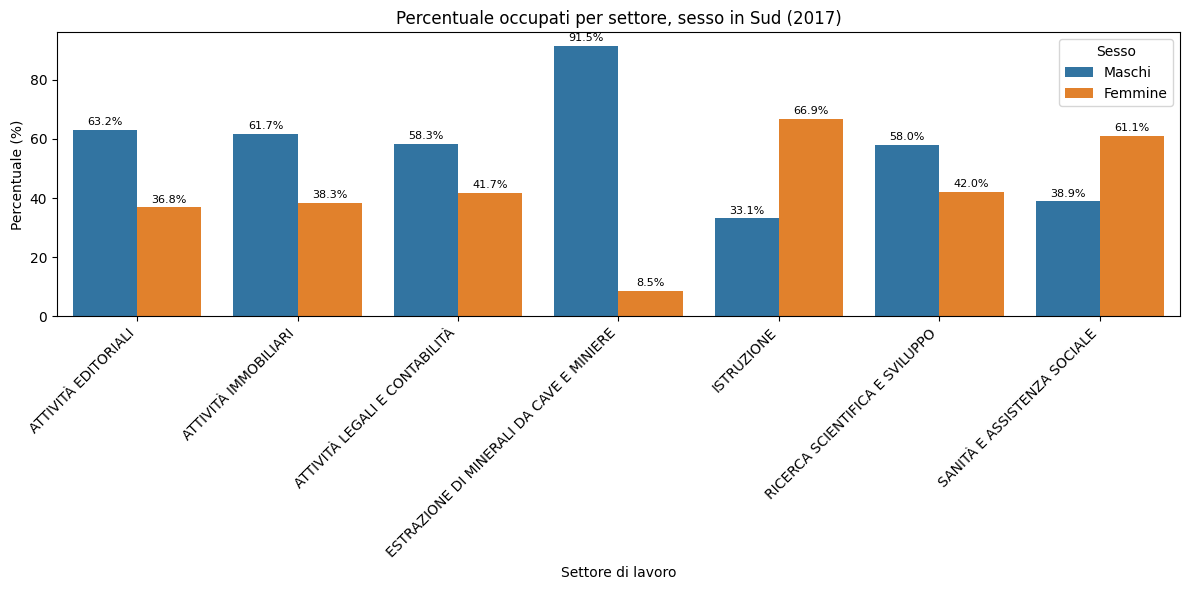

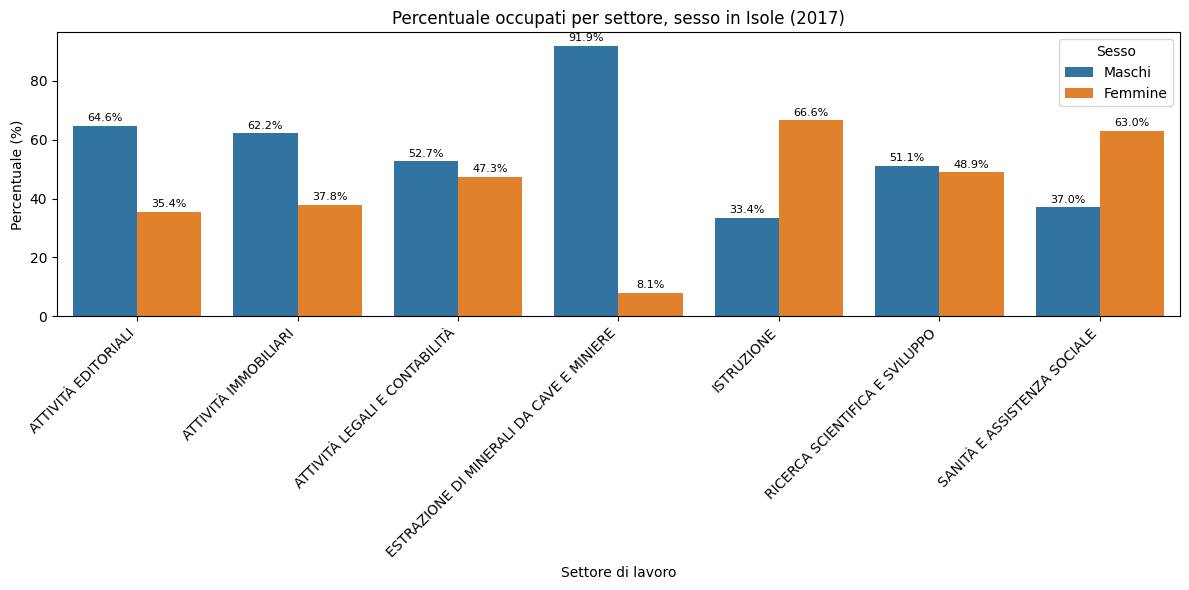

In [31]:
for area in macroaree_selezionate:  #ciclo su ogni macroarea di interesse 
    dati_area = df_sesso_conc_2017_macroaree [df_sesso_conc_2017_macroaree['Macroarea'] == area]  #Filtro i dati per macroarea corrente

#Metto i grafici nel ciclo, così che ne crea uno per ogni macroarea interessata:
    
    graf_istat_macroaree_2017= plt.figure(figsize=(12,6)) #imposto dimensione dei grafici
    graf_bar_macro = sns.barplot(  #faccio un barplot con Seaborn
        data=dati_area, 
        x='Settore di lavoro',
        y='Percentuale',
        hue='Sesso',
        palette='tab10',
        dodge=True  #barre di maschi e femmine affiancate
    )
    for container in graf_bar_macro.containers:  #creo un altro ciclo per aggiungere le percentuali alle barre
        graf_bar_macro.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8, padding=2)  #impostazioni delle etichette per le percentuali


    plt.title(f'Percentuale occupati per settore, sesso in {area} (2017)') #titolo del grafico
    plt.xticks(rotation=45, ha='right') #ruoto i nomi nell'asse x, per renderli più leggibili
    plt.xlabel('Settore di lavoro')  #Nome asse x
    plt.ylabel('Percentuale (%)')  #Nome asse y
    plt.legend(title='Sesso') #legenda
    plt.tight_layout()
    plt.show()


### Interpretazione della distribuzione di genere per settore e macroarea geografica nel 2017

L’analisi dei dati evidenzia una distribuzione differenziata degli occupati maschili e femminili nelle diverse macroaree italiane e nei settori selezionati.

- **Nord-Ovest e Nord-Est** mostrano una predominanza maschile più marcata in settori tradizionalmente *"maschili"* come l’estrazione mineraria (oltre l’86% di maschi) e la ricerca scientifica (circa 57-59% maschi).
- **Centro**: Si conferma in linea con i trend osservati per l'Italia, ma il settore **Ricerca scientifica e sviluppo** mostra una prevalenza maschile di circa il 15%.
- **Sud**: troviamo maggioranza maschile in quasi tutti i settori (esclusi quelli a maggioranza femminile), anche in quelli dove nel trend nazionale erano abbastanza equilibrati come **Attività Editoriali**: circa il 20% in più di uomini.
- **Isole**: circa la stessa situazione dell'area *Sud*, ad eccezione del settore **Ricerca scientifica e sviluppo** in cui l'occupazione è equilibrata tra uomini e donne.
- Nei settori dell’**istruzione** e della **sanità e assistenza sociale**, invece, le donne rappresentano la maggioranza, con percentuali femminili che superano il 60% in tutte le macroaree, specialmente al Sud e nelle Isole.
- Le differenze territoriali sono evidenti anche nel settore delle **attività legali e contabili**, con una più forte presenza femminile al Nord (oltre il 60%) rispetto al Sud, dove la distribuzione è più equilibrata o maschile.

Questi dati riflettono sia le caratteristiche economiche e sociali delle macroaree italiane sia le dinamiche di segregazione di genere nei vari settori professionali.


#### Come prima, calcolo l'incidenza dei settori lavorativi, per genere, in relazione al totale nazionale

In [32]:
df_sesso_conc_2017_macroaree.rename(columns={'Sesso': 'SESSO'}, inplace=True)

df_percentuali_2017_macroaree = df_sesso_conc_2017_macroaree.merge(totale_per_sesso_italia, on='SESSO') #Merge con il totale nazionale per sesso

df_percentuali_2017_macroaree['Percentuale generale nazionale'] = round((df_percentuali_2017_macroaree['Occupati'] / df_percentuali_2017_macroaree['Totale sesso italia']) * 100, 4) #calcolo la percentuale rispetto al totale nazionale per sesso


print("\n\nPercentuale dei lavoratori maschi e femmine impiegati in ciascun settore e macroarea (sul totale nazionale) nel 2017:")

macroaree = df_percentuali_2017_macroaree['Macroarea'].unique()
for macroarea in macroaree:
    print(f"\nMacroarea: {macroarea}")
    df_macro = df_percentuali_2017_macroaree[df_percentuali_2017_macroaree['Macroarea'] == macroarea]
    settori = df_macro['Settore di lavoro'].unique()
    for settore in settori:
        print(f"\nSettore di lavoro: {settore}")
        for sesso in ['Femmine', 'Maschi']:
            valore = df_macro.loc[
                (df_macro['Settore di lavoro'] == settore) &
                (df_macro['SESSO'] == sesso), 'Percentuale generale nazionale'
            ]
            if not valore.empty:
                print(f"{sesso}: {valore.iloc[0]}%")



Percentuale dei lavoratori maschi e femmine impiegati in ciascun settore e macroarea (sul totale nazionale) nel 2017:

Macroarea: Centro

Settore di lavoro: ATTIVITÀ EDITORIALI
Femmine: 0.0143%
Maschi: 0.009%

Settore di lavoro: ATTIVITÀ IMMOBILIARI
Femmine: 0.2915%
Maschi: 0.2565%

Settore di lavoro: ATTIVITÀ LEGALI E CONTABILITÀ
Femmine: 0.3104%
Maschi: 0.1571%

Settore di lavoro: ESTRAZIONE DI MINERALI DA CAVE E MINIERE
Femmine: 0.0201%
Maschi: 0.0403%

Settore di lavoro: ISTRUZIONE
Femmine: 0.179%
Maschi: 0.0543%

Settore di lavoro: RICERCA SCIENTIFICA E SVILUPPO
Femmine: 0.0157%
Maschi: 0.0131%

Settore di lavoro: SANITÀ E ASSISTENZA SOCIALE
Femmine: 0.6419%
Maschi: 0.1904%

Macroarea: Isole

Settore di lavoro: ATTIVITÀ EDITORIALI
Femmine: 0.002%
Maschi: 0.0022%

Settore di lavoro: ATTIVITÀ IMMOBILIARI
Femmine: 0.0418%
Maschi: 0.042%

Settore di lavoro: ATTIVITÀ LEGALI E CONTABILITÀ
Femmine: 0.0964%
Maschi: 0.0655%

Settore di lavoro: ESTRAZIONE DI MINERALI DA CAVE E MINIERE
Fem

In [33]:
df_percentuali_2017_italia

Macroarea  Anno                         Settore di lavoro    SESSO  \
0     Italia  2017               SANITÀ E ASSISTENZA SOCIALE   Maschi   
1     Italia  2017               SANITÀ E ASSISTENZA SOCIALE  Femmine   
2     Italia  2017             ATTIVITÀ LEGALI E CONTABILITÀ  Femmine   
3     Italia  2017             ATTIVITÀ LEGALI E CONTABILITÀ   Maschi   
4     Italia  2017                      ATTIVITÀ IMMOBILIARI   Maschi   
5     Italia  2017                      ATTIVITÀ IMMOBILIARI  Femmine   
6     Italia  2017                                ISTRUZIONE  Femmine   
7     Italia  2017                                ISTRUZIONE   Maschi   
8     Italia  2017                       ATTIVITÀ EDITORIALI   Maschi   
9     Italia  2017                       ATTIVITÀ EDITORIALI  Femmine   
10    Italia  2017  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  Femmine   
11    Italia  2017  ESTRAZIONE DI MINERALI DA CAVE E MINIERE   Maschi   
12    Italia  2017            RICERCA SCIENTIFICA E SVILUPPO   Maschi   
13    Italia  2017            RICERCA SCIENTIFICA E SVILUPPO  Femmine   

     Occupati  Percentuale nel settore  Percentuale generale  
0   293726.99                    31.98                  0.89  
1   624812.06                    68.02                  3.11  
2   276904.18                    55.00                  1.38  
3   226584.39                    45.00                  0.69  
4   368542.60                    59.96                  1.12  
5   246122.66                    40.04                  1.23  
6   152583.58                    63.55                  0.76  
7    87499.20                    36.45                  0.27  
8    17684.92                    50.79                  0.05  
9    17134.91                    49.21                  0.09  
10    5469.30                    17.77                  0.03  
11   25302.96                    82.23                  0.08  
12   18511.44                    57.80                  0.06  
13   13517.62                    42.20                  0.07

In [34]:
df_percentuali_2017_macroaree = df_percentuali_2017_macroaree.rename(columns={ #rinomino le colonne per uniformità
    'Percentuale': 'Percentuale nel settore',
    'Percentuale generale nazionale': 'Percentuale generale'
})
df_percentuali_2017_macroaree = df_percentuali_2017_macroaree[[  #seleziono solo le colonne che voglio tenere nel mio df
    'Macroarea', 'Settore di lavoro', 'SESSO', 'Occupati',
    'Percentuale nel settore', 'Percentuale generale']].sort_values('Macroarea')
df_percentuali_2017_macroaree

Macroarea                         Settore di lavoro    SESSO  Occupati  \
0     Centro                       ATTIVITÀ EDITORIALI   Maschi   2953.42   
35    Centro                       ATTIVITÀ EDITORIALI  Femmine   2860.86   
36    Centro                      ATTIVITÀ IMMOBILIARI  Femmine  58513.72   
37    Centro             ATTIVITÀ LEGALI E CONTABILITÀ  Femmine  62307.42   
38    Centro  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  Femmine   4027.92   
..       ...                                       ...      ...       ...   
30       Sud             ATTIVITÀ LEGALI E CONTABILITÀ   Maschi  57324.38   
29       Sud                      ATTIVITÀ IMMOBILIARI   Maschi  33220.72   
28       Sud                       ATTIVITÀ EDITORIALI   Maschi   1514.17   
68       Sud            RICERCA SCIENTIFICA E SVILUPPO  Femmine   1442.49   
69       Sud               SANITÀ E ASSISTENZA SOCIALE  Femmine  99364.61   

    Percentuale nel settore  Percentuale generale  
0                     50.80                0.0090  
35                    49.20                0.0143  
36                    40.97                0.2915  
37                    54.69                0.3104  
38                    23.32                0.0201  
..                      ...                   ...  
30                    58.33                0.1744  
29                    61.67                0.1011  
28                    63.19                0.0046  
68                    42.02                0.0072  
69                    61.10                0.4950  

[70 rows x 6 columns]

In [35]:
df_percentuali_2017_macroaree.to_csv("output_progetto/analisi_istat/percentuali/df_percentuali_2017_macroaree.csv", index=False, encoding='utf-8')   #salvo il df

### Grafico

Anche ora, come prima, facciamo il grafico a barre orizzontali affiancate, in modo da riuscire a visualizzare meglio i valori ottenuti. 

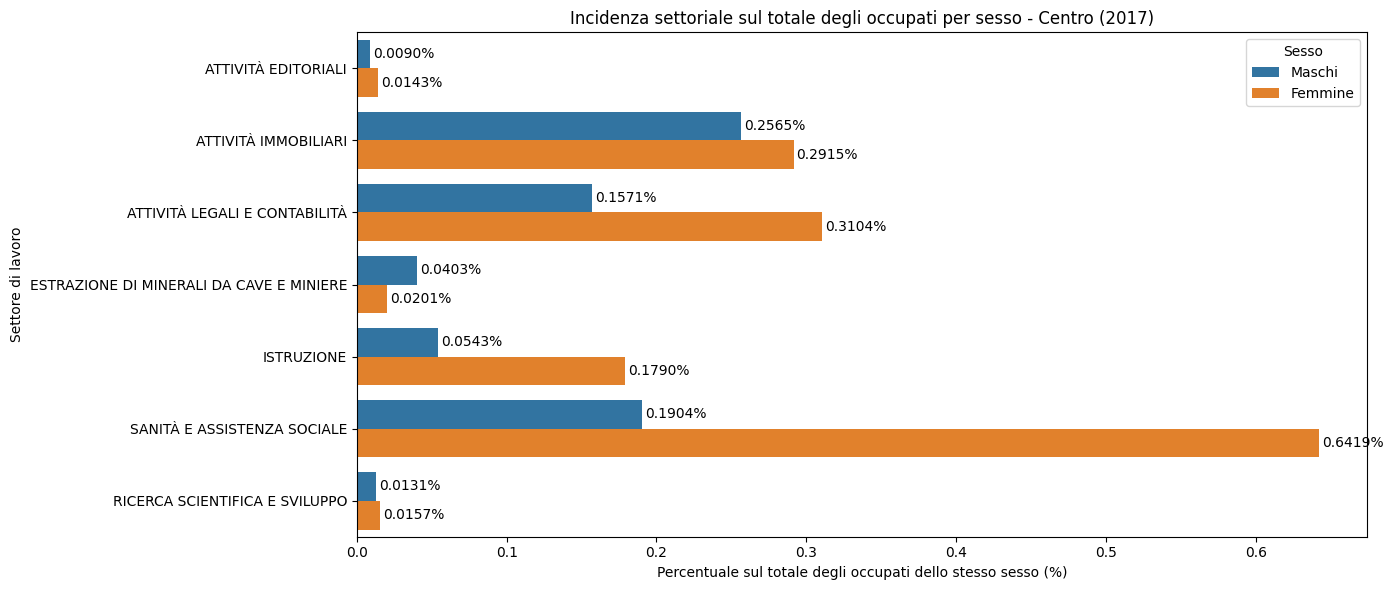

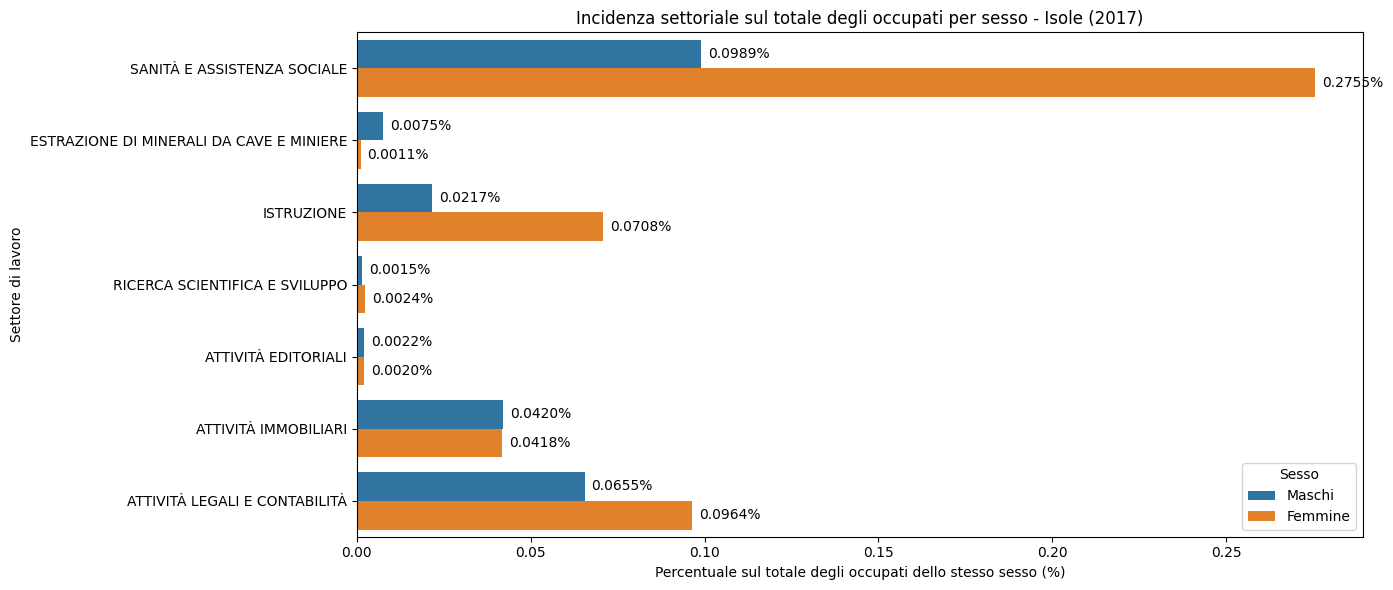

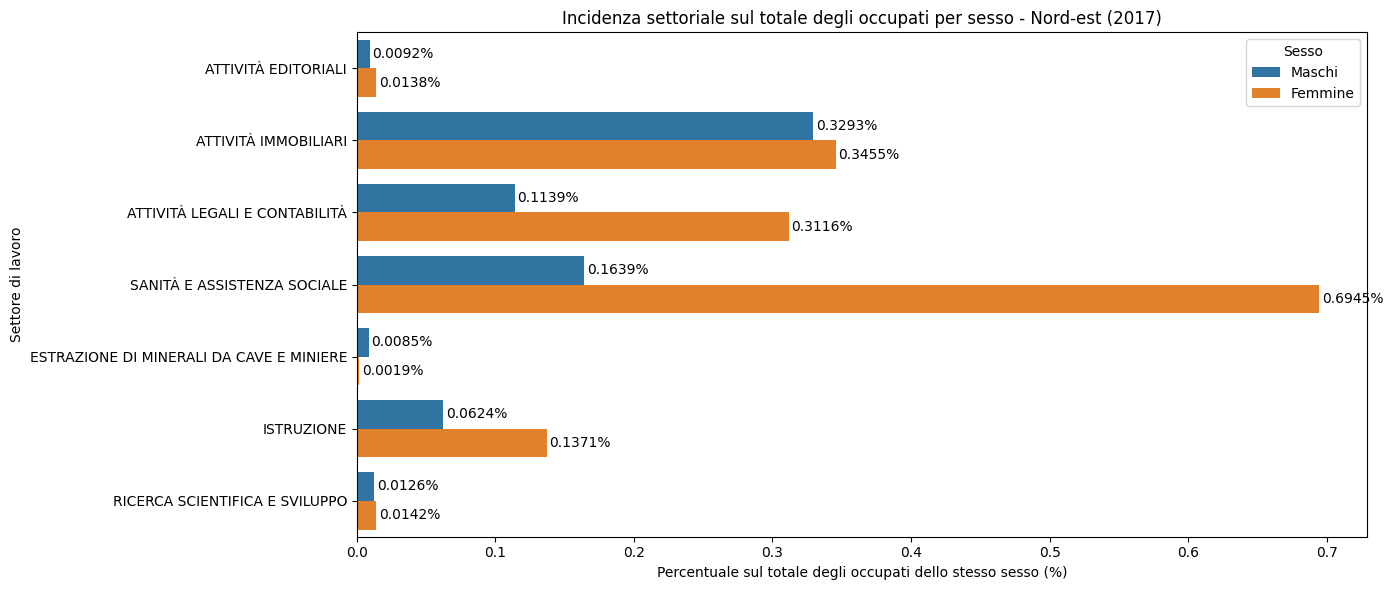

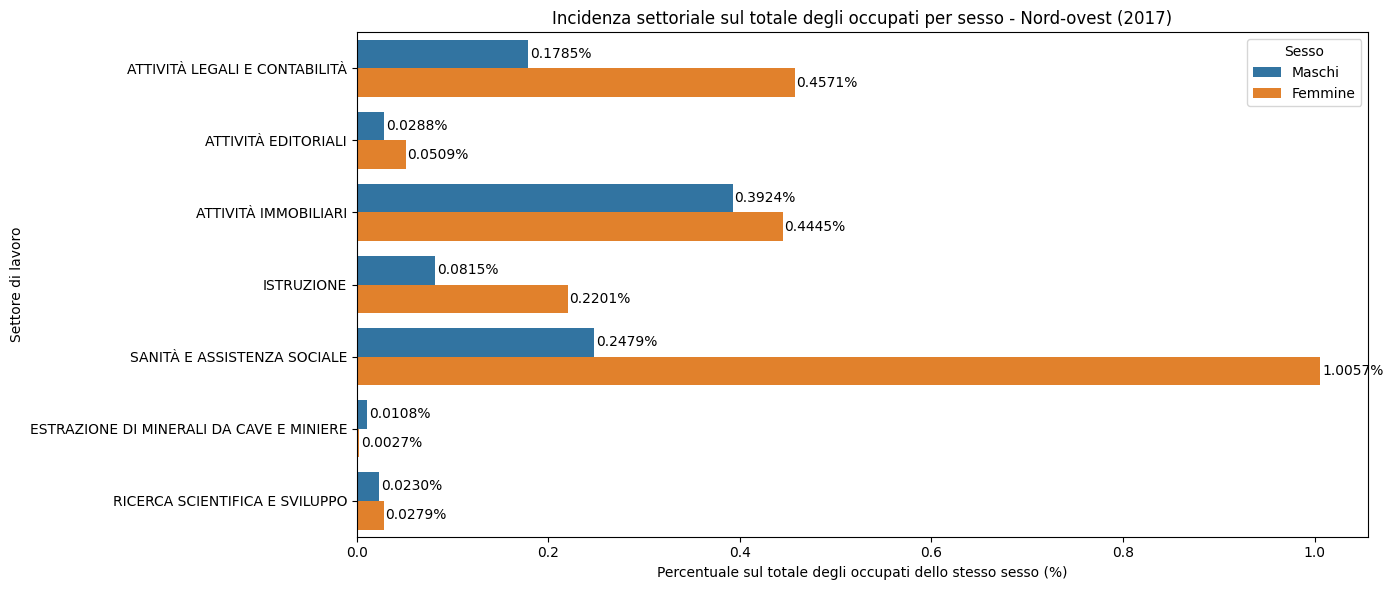

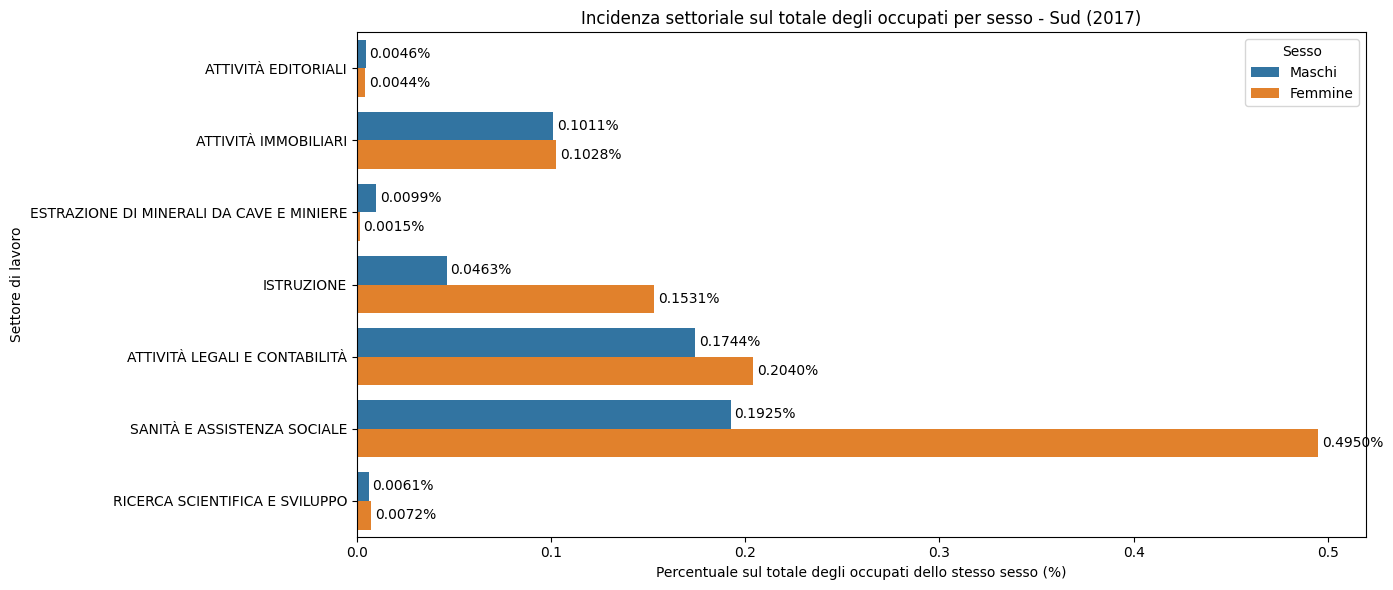

In [36]:
macroaree = df_percentuali_2017_macroaree['Macroarea'].unique() #Seleziono le macroaree

for macro in macroaree: #Ciclo su ogni macroarea per fare il grafico inerente
    plt.figure(figsize=(14, 6))
    df_macro = df_percentuali_2017_macroaree[df_percentuali_2017_macroaree['Macroarea'] == macro]
    
    graf_istat_macroaree_2017 = sns.barplot(
        data=df_macro,
        y="Settore di lavoro",
        x="Percentuale generale",
        hue="SESSO",
        hue_order=['Maschi', 'Femmine'],  #Devo dare l'ordine esplicito, altrimenti inverte i colori nel grafico e nella legenda
        palette="tab10"
    )
    
    for bar in graf_istat_macroaree_2017.patches: #accedo alle barre del grafico
        width = bar.get_width()    #lunghezza della barra
        y = bar.get_y() + bar.get_height() / 2  #posizione verticale centrata
        if abs(width) > 0.0005:
            plt.text(width + 0.002, y, f"{width:.4f}%", va='center')
    
    plt.title(f'Incidenza settoriale sul totale degli occupati per sesso - {macro} (2017)')
    plt.xlabel('Percentuale sul totale degli occupati dello stesso sesso (%)')
    plt.ylabel('Settore di lavoro')
    plt.legend(title='Sesso')
    plt.tight_layout()
    plt.show()

## Sintesi dei risultati per sesso, settore e macroarea (Italia, 2017), sul totale nazionale

L’analisi delle percentuali di occupazione per sesso nei diversi settori e macroaree italiane evidenzia alcune tendenze significative:

- **Sanità e assistenza sociale** è il settore con la maggiore incidenza femminile in tutte le macroaree, con valori particolarmente elevati nel **Nord-ovest** (1,00%) e nel **Nord-est** (0,69%). L’incidenza maschile nello stesso settore è molto più contenuta.

- Anche il settore dell’**Istruzione** mostra un’alta presenza femminile, quasi ovunque doppia rispetto a quella maschile.

- Le **Attività legali e contabili** registrano una prevalenza femminile in tutte le aree, soprattutto nel Nord, segnalando una forte partecipazione delle donne nei servizi professionali.

- Il settore dell’**Estrazione di minerali da cave e miniere** presenta invece un’incidenza maggiore tra gli uomini in tutte le macroaree, confermandosi come comparto a prevalenza maschile, comunque con una bassa incidenza occupazionale in tutte le aree in analisi.

- Le **Attività immobiliari** risultano più equilibrate tra i generi, con incidenze simili per uomini e donne in tutte le aree.

- Le **Attività editoriali** e la **Ricerca scientifica e sviluppo** mostrano valori percentuali bassi ma con una leggera prevalenza femminile in diverse macroaree, in particolare al Nord.

Anche in questo caso, i risultati sono in linea con gli stessi dati, inerenti all'Italia dello stesso anno, perciò osserviamo che, nonostante la conformazione interna dei settori sia quasi sempre a prevalenza maschile (tranne che per settori prettamente femminili, come *Istruzione* e *Sanità e assistenza sociale*), in questa analisi in rapporto al totale nazionale, emerge che questi settori impieghino più le donne che gli uomini (escluso *Estrazione*).

Questi dati evidenziano la persistenza di una segmentazione di genere nel mercato del lavoro italiano, con una distribuzione settoriale ancora influenzata da stereotipi e ruoli tradizionali.


## Analisi del Sex Gap per Settore e Macroarea (2017)
Ora procedo con l'analisi del divario percentuale tra maschi e femmine (Gender Gap) in ciascun settore di lavoro suddiviso per macroarea geografica per l'anno 2017. 

- Viene calcolata la differenza tra la percentuale di occupati maschi e quella femminile in ogni settore e macroarea (come fatto precedentemente per l'italia).
- Il gap rappresenta l’ampiezza e la direzione della predominanza di uno dei due sessi.
- Ordinando i dati in base al valore assoluto del gap, è possibile identificare i settori e le aree geografiche con le disuguaglianze di genere più marcate.

Infine creazione di una tabella con i risultati ordinati per grandezza del gap.


In [37]:
df_gender_gap_2017_macroaree= istat_2017_macroaree.copy() #Creo un nuovo df, copiando istat_2017_macroaree, per i gap % riguardante le macroaree e l'anno 2017

df_gender_gap_2017_macroaree.rename(columns={  #Rinomino le colonne per comodità e leggibilità
    'Settore di lavoro': 'Settore',
}, inplace=True)

df_gender_gap_2017_macroaree['Gap %'] = df_gender_gap_2017_macroaree['% Maschi'] - df_gender_gap_2017_macroaree['% Femmine'] # Calcolo il gap di genere come differenza tra % di maschi e % di femmine in ciascuna riga


# Ordino il DataFrame in ordine decrescente secondo il gap assoluto, in modo da mettere in evidenza i settori e macroaree con maggiori differenze di genere
df_gender_gap_2017_macroaree = df_gender_gap_2017_macroaree.sort_values(by='Gap %', ascending=False).reset_index(drop=True)


df_gender_gap_2017_macroaree = df_gender_gap_2017_macroaree.loc[:, ['Anno', 'Macroarea', 'Settore', '% Maschi', '% Femmine', 'Gap %']] #Mantengo solo le colonne di mio interesse
df_gender_gap_2017_macroaree #visualizzo il df

Anno   Macroarea                                   Settore  % Maschi  \
0   2017       Isole  ESTRAZIONE DI MINERALI DA CAVE E MINIERE     91.92   
1   2017         Sud  ESTRAZIONE DI MINERALI DA CAVE E MINIERE     91.49   
2   2017    Nord-est  ESTRAZIONE DI MINERALI DA CAVE E MINIERE     88.19   
3   2017  Nord-ovest  ESTRAZIONE DI MINERALI DA CAVE E MINIERE     86.64   
4   2017      Centro  ESTRAZIONE DI MINERALI DA CAVE E MINIERE     76.68   
5   2017       Isole                       ATTIVITÀ EDITORIALI     64.59   
6   2017         Sud                       ATTIVITÀ EDITORIALI     63.19   
7   2017       Isole                      ATTIVITÀ IMMOBILIARI     62.19   
8   2017         Sud                      ATTIVITÀ IMMOBILIARI     61.67   
9   2017    Nord-est                      ATTIVITÀ IMMOBILIARI     60.95   
10  2017    Nord-est            RICERCA SCIENTIFICA E SVILUPPO     59.21   
11  2017  Nord-ovest                      ATTIVITÀ IMMOBILIARI     59.11   
12  2017      Centro                      ATTIVITÀ IMMOBILIARI     59.03   
13  2017         Sud             ATTIVITÀ LEGALI E CONTABILITÀ     58.33   
14  2017         Sud            RICERCA SCIENTIFICA E SVILUPPO     57.98   
15  2017      Centro            RICERCA SCIENTIFICA E SVILUPPO     57.87   
16  2017  Nord-ovest            RICERCA SCIENTIFICA E SVILUPPO     57.46   
17  2017       Isole             ATTIVITÀ LEGALI E CONTABILITÀ     52.68   
18  2017    Nord-est                       ATTIVITÀ EDITORIALI     52.11   
19  2017       Isole            RICERCA SCIENTIFICA E SVILUPPO     51.06   
20  2017      Centro                       ATTIVITÀ EDITORIALI     50.80   
21  2017  Nord-ovest                       ATTIVITÀ EDITORIALI     48.10   
22  2017      Centro             ATTIVITÀ LEGALI E CONTABILITÀ     45.31   
23  2017    Nord-est                                ISTRUZIONE     42.70   
24  2017  Nord-ovest             ATTIVITÀ LEGALI E CONTABILITÀ     39.00   
25  2017         Sud               SANITÀ E ASSISTENZA SOCIALE     38.90   
26  2017  Nord-ovest                                ISTRUZIONE     37.75   
27  2017    Nord-est             ATTIVITÀ LEGALI E CONTABILITÀ     37.44   
28  2017       Isole               SANITÀ E ASSISTENZA SOCIALE     37.03   
29  2017       Isole                                ISTRUZIONE     33.41   
30  2017      Centro                                ISTRUZIONE     33.19   
31  2017         Sud                                ISTRUZIONE     33.10   
32  2017      Centro               SANITÀ E ASSISTENZA SOCIALE     32.69   
33  2017  Nord-ovest               SANITÀ E ASSISTENZA SOCIALE     28.76   
34  2017    Nord-est               SANITÀ E ASSISTENZA SOCIALE     27.87   

    % Femmine  Gap %  
0        8.08  83.84  
1        8.51  82.98  
2       11.81  76.38  
3       13.36  73.28  
4       23.32  53.36  
5       35.41  29.18  
6       36.81  26.38  
7       37.81  24.38  
8       38.33  23.34  
9       39.05  21.90  
10      40.79  18.42  
11      40.89  18.22  
12      40.97  18.06  
13      41.67  16.66  
14      42.02  15.96  
15      42.13  15.74  
16      42.54  14.92  
17      47.32   5.36  
18      47.89   4.22  
19      48.94   2.12  
20      49.20   1.60  
21      51.90  -3.80  
22      54.69  -9.38  
23      57.30 -14.60  
24      61.00 -22.00  
25      61.10 -22.20  
26      62.25 -24.50  
27      62.56 -25.12  
28      62.97 -25.94  
29      66.59 -33.18  
30      66.81 -33.62  
31      66.90 -33.80  
32      67.31 -34.62  
33      71.24 -42.48  
34      72.13 -44.26

In [38]:
df_gender_gap_2017_macroaree.to_csv("output_progetto/analisi_istat/gender_gap/df_gender_gap_2017_macroaree.csv", index=False)  #salvo il df

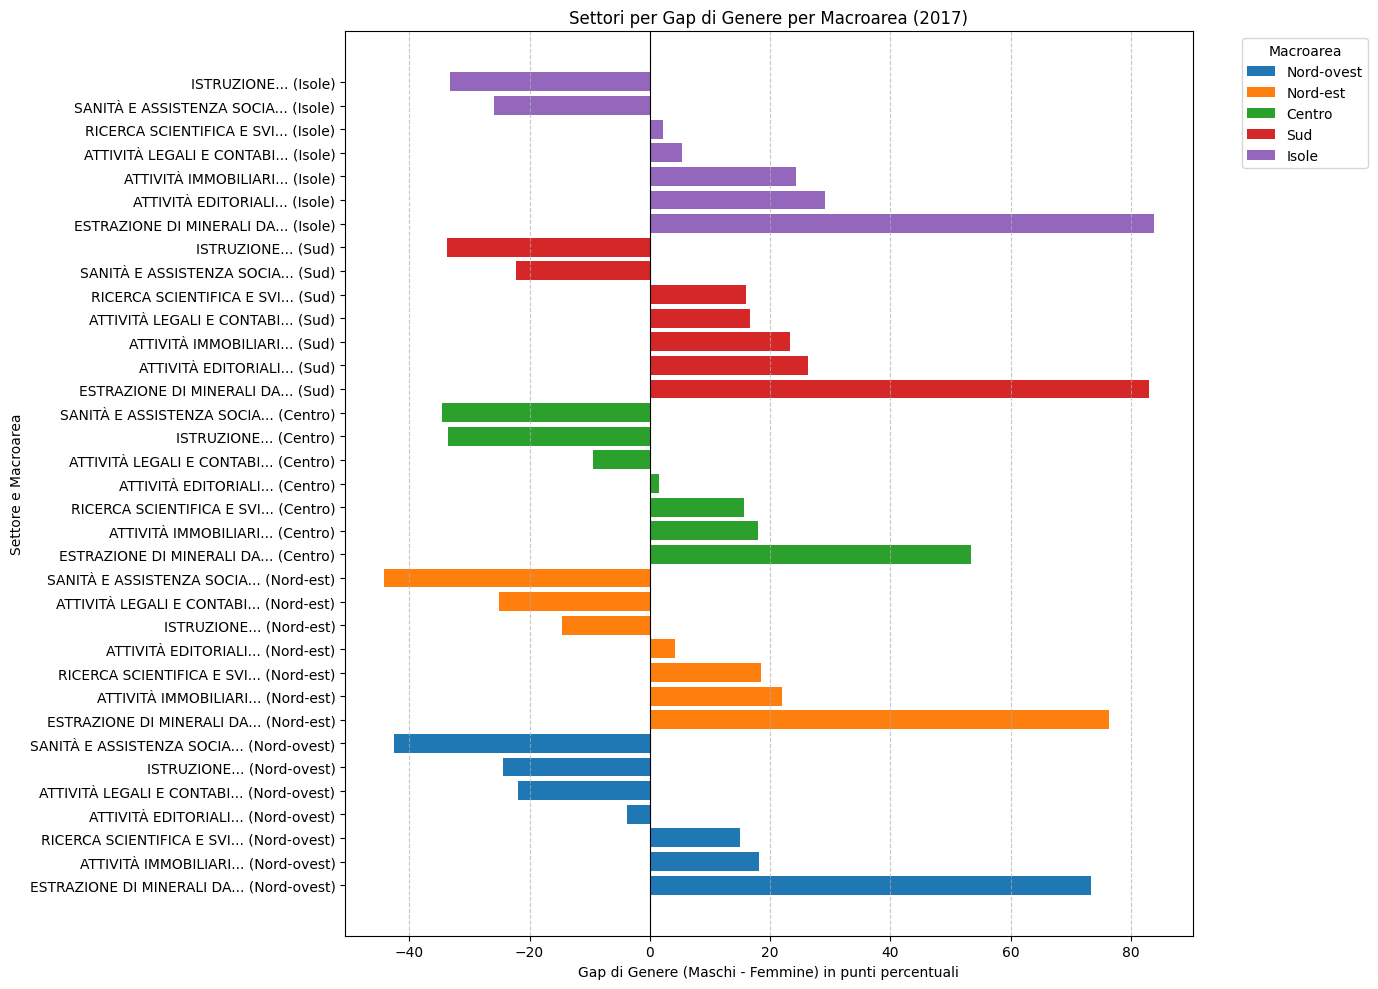

In [39]:
colors = ['#1f77b4', #Blu: per Nord-ovest
          '#ff7f0e', #Arancione: per Nord-est
          '#2ca02c', #Verde: per Centro
          '#d62728', #Rosso: per Sud
          '#9467bd'] #Viola: per Isole

plt.figure(figsize=(14, 10))  #Creo figura

for i, macro in enumerate(macroaree_selezionate): #ciclo per ogni macroaree_selezionate con indice 
    dati_macro = df_gender_gap_2017_macroaree[df_gender_gap_2017_macroaree['Macroarea'] == macro] #filtro per prendere solo le righe della macroarea in ciclo
     
    y_labels = [f"{s[:25]}... ({macro})" for s in dati_macro['Settore']] #creo etichette per la y, specificando che avranno max 25 caratteri (altirmenti si sovrapponeva) e, vicino, metto la macroarea
    
    graf_gender_gap_2017_macroaree = plt.barh(y=y_labels, width=dati_macro['Gap %'], color=colors[i % len(colors)], label=macro) #disegno barre orizzontali, con le mie etichette e, i colori delle barre 

plt.axvline(0, color='black', linewidth=0.8) #aggiungo linea verticale in corrispondenza dello 0 per dividere il gap
plt.title('Settori per Gap di Genere per Macroarea (2017)') 
plt.xlabel('Gap di Genere (Maschi - Femmine) in punti percentuali')
plt.ylabel('Settore e Macroarea')
plt.grid(axis='x', linestyle='--', alpha=0.7)  #per griglia quasi trasparenza in sottofondo
plt.legend(title='Macroarea', bbox_to_anchor=(1.05, 1), loc='upper left')  #bbox_to_anchor argomento per mettere la legenda fuori dal grafico
plt.tight_layout()
plt.show()


## Interpretazoine del gender gap per settore e macroarea (Italia, 2017)

Il grafico mostra la distribuzione del divario occupazionale di genere (**Gap %**) nei principali settori economici, suddivisi per macroarea geografica: valori positivi indicano una prevalenza maschile, mentre valori negativi segnalano una prevalenza femminile.

### Settori con prevalenza maschile

- Il settore con il divario di genere più marcato a favore degli uomini è **Estrazione di minerali da cave e miniere**, con gap superiori all'80% nelle **Isole** (+83.84%) e nel **Sud** (+82.98%), confermando una fortissima connotazione maschile.
- Anche settori come le **Attività immobiliari**, la **Ricerca scientifica e sviluppo** e le **Attività editoriali** mostrano una moderata prevalenza maschile, seppur con gap più contenuti (tra +20% e +4%).

### Settori con prevalenza femminile

- I settori con maggiore presenza femminile sono:
  - **Sanità e assistenza sociale**, con gap negativi molto marcati, in particolare nel **Nord-est** (-44.26%) e nel **Nord-ovest** (-42.48%).
  - **Istruzione**, che presenta un divario femminile stabile e consistente in tutte le macroaree, con valori fino a -33.80% nel **Sud**.
  - Anche le **Attività legali e contabili** risultano tendenzialmente femminilizzate, specialmente nel **Nord-ovest** (-22.00%) e nel **Nord-est** (-25.12%).

### Conclusione

L’analisi evidenzia una chiara segregazione di genere nei settori occupazionali, con alcuni ambiti fortemente dominati da uomini (estrazione) e altri da donne (sanità, istruzione). Le differenze risultano omogenee tra le macroaree, suggerendo che il gender gap settoriale sia una tendenza strutturale del mercato del lavoro italiano.


### Estrazione dei 10 settori con il Gender Gap più alto per macroarea

In [40]:
print("\n--- Top 10 gap assoluti maschili ---\n") #Intestazione

#Seleziono le prime 10 righe già ordinate per gap maschile

top10_gap = df_gender_gap_2017_macroaree.head(10)[['Settore', 'Macroarea', '% Maschi', '% Femmine', 'Gap %']]

top10_gap


--- Top 10 gap assoluti maschili ---



Settore   Macroarea  % Maschi  % Femmine  \
0  ESTRAZIONE DI MINERALI DA CAVE E MINIERE       Isole     91.92       8.08   
1  ESTRAZIONE DI MINERALI DA CAVE E MINIERE         Sud     91.49       8.51   
2  ESTRAZIONE DI MINERALI DA CAVE E MINIERE    Nord-est     88.19      11.81   
3  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  Nord-ovest     86.64      13.36   
4  ESTRAZIONE DI MINERALI DA CAVE E MINIERE      Centro     76.68      23.32   
5                       ATTIVITÀ EDITORIALI       Isole     64.59      35.41   
6                       ATTIVITÀ EDITORIALI         Sud     63.19      36.81   
7                      ATTIVITÀ IMMOBILIARI       Isole     62.19      37.81   
8                      ATTIVITÀ IMMOBILIARI         Sud     61.67      38.33   
9                      ATTIVITÀ IMMOBILIARI    Nord-est     60.95      39.05   

   Gap %  
0  83.84  
1  82.98  
2  76.38  
3  73.28  
4  53.36  
5  29.18  
6  26.38  
7  24.38  
8  23.34  
9  21.90

## 1c) Analisi della variazione nel tempo negli anni dell'occupazione in base al genere nei miei settori scelti (variazione Gender Gap tra il 2012 e il 2017) 

In questa ultima parte di analisi del dataset istat, si analizzerà l'**andamento occupazionale dal 2012 al 2017**, distinguendo per:

- **Settore di lavoro**
- **Macroarea geografica**
- **Genere (Maschi e Femmine)**

L'obiettivo è osservare **eventuali tendenze divergenti nel tempo tra i generi** e **disparità territoriali** all'interno dello stesso settore.

### Evoluzione del divario di genere (2012-2017) solo per le macroaree (Italia esclusa)

Per ogni settore vengono riportati:

- Le **percentuali** di occupati per genere nei due anni (2012 e 2017).
- Le **variazioni in punti percentuali (p.p.)** per ciascun genere.
- La **variazione del Gender Gap**, ovvero la differenza tra la quota maschile e quella femminile nel tempo.
- Un'indicazione sintetica sulla **direzione** della variazione (se il divario è aumentato o diminuito).

I risultati sono ordinati per **maggiore variazione del gap**, così da evidenziare i settori con cambiamenti più rilevanti nella distribuzione di genere.

> *Un gap positivo indica una maggiore presenza maschile rispetto a quella femminile. Una riduzione del gap segnala una maggiore parità occupazionale.*


In [41]:
risultati = []  #creo un contenitore per i risultati del ciclo di ogni combinazione

macroaree = istat_analisi_macroaree_anni['Macroarea'].unique()   #seleziono le macroaree
macroaree = [macro for macro in macroaree if macro != 'Italia']  #Escludo l'Italia
settori = istat_analisi_macroaree_anni['Settore di lavoro'].unique()  #seleziono i settori di lavoro

for macroarea in macroaree: #ciclo annidato per: macroarea+settore
    for settore in settori:   
        dati_settore = istat_analisi_macroaree_anni[  #Filtro i df per selezionare solo i dati relativi a questa macroarea e settore
            (istat_analisi_macroaree_anni['Macroarea'] == macroarea) &
            (istat_analisi_macroaree_anni['Settore di lavoro'] == settore)
        ]

        risultato = mf.calcola_gender_gap_settore(dati_settore, 2012, 2017)  #Se la funzione ritorna un risultato valido, aggiungo macroarea e settore e lo salvo nella lista
        if risultato:
            risultato['Macroarea'] = macroarea
            risultato['Settore'] = settore
            risultati.append(risultato)

df_gender_gap_macroaree_anni = pd.DataFrame(risultati) #creo un nuovo df per organizzare i risultati

colonne_ordinate = ['Macroarea', 'Settore',  #Definisco l'ordine delle colonne
                    '% Maschi 2012', '% Maschi 2017',
                    '% Femmine 2012', '% Femmine 2017',
                    'Gender Gap 2012', 'Gender Gap 2017',
                    'Var Gap (p.p.)', 'Direzione Gap']

df_gender_gap_macroaree_anni = df_gender_gap_macroaree_anni[colonne_ordinate] #Riordino le colonne in base alla lista colonne_ordinate

df_gender_gap_macroaree_anni = df_gender_gap_macroaree_anni.sort_values('Var Gap (p.p.)', ascending=False).reset_index(drop=True) #Ordino il df per variazione gap
df_gender_gap_macroaree_anni

Macroarea                                   Settore  % Maschi 2012  \
0          Sud                                ISTRUZIONE          29.11   
1        Isole                                ISTRUZIONE          30.43   
2          Sud                       ATTIVITÀ EDITORIALI          61.40   
3       Centro                                ISTRUZIONE          31.61   
4   Nord-ovest                                ISTRUZIONE          36.36   
5        Isole                      ATTIVITÀ IMMOBILIARI          61.20   
6   Nord-ovest                       ATTIVITÀ EDITORIALI          47.38   
7          Sud  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          90.96   
8   Nord-ovest            RICERCA SCIENTIFICA E SVILUPPO          57.08   
9     Nord-est                                ISTRUZIONE          42.47   
10       Isole               SANITÀ E ASSISTENZA SOCIALE          36.91   
11      Centro            RICERCA SCIENTIFICA E SVILUPPO          57.81   
12      Centro             ATTIVITÀ LEGALI E CONTABILITÀ          45.44   
13    Nord-est               SANITÀ E ASSISTENZA SOCIALE          28.05   
14  Nord-ovest               SANITÀ E ASSISTENZA SOCIALE          28.97   
15  Nord-ovest             ATTIVITÀ LEGALI E CONTABILITÀ          39.23   
16    Nord-est  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          88.45   
17    Nord-est             ATTIVITÀ LEGALI E CONTABILITÀ          37.73   
18      Centro               SANITÀ E ASSISTENZA SOCIALE          33.02   
19    Nord-est                      ATTIVITÀ IMMOBILIARI          61.35   
20  Nord-ovest                      ATTIVITÀ IMMOBILIARI          59.56   
21       Isole  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          92.60   
22      Centro                      ATTIVITÀ IMMOBILIARI          59.81   
23  Nord-ovest  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          87.56   
24         Sud               SANITÀ E ASSISTENZA SOCIALE          40.25   
25         Sud             ATTIVITÀ LEGALI E CONTABILITÀ          59.76   
26       Isole             ATTIVITÀ LEGALI E CONTABILITÀ          54.14   
27    Nord-est            RICERCA SCIENTIFICA E SVILUPPO          61.20   
28      Centro  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          78.86   
29    Nord-est                       ATTIVITÀ EDITORIALI          54.30   
30         Sud                      ATTIVITÀ IMMOBILIARI          63.87   
31       Isole                       ATTIVITÀ EDITORIALI          67.35   
32      Centro                       ATTIVITÀ EDITORIALI          54.80   
33         Sud            RICERCA SCIENTIFICA E SVILUPPO          63.17   
34       Isole            RICERCA SCIENTIFICA E SVILUPPO          60.15   

    % Maschi 2017  % Femmine 2012  % Femmine 2017  Gender Gap 2012  \
0           33.10           70.89           66.90           -41.78   
1           33.41           69.57           66.59           -39.14   
2           63.19           38.60           36.81            22.80   
3           33.19           68.39           66.81           -36.78   
4           37.75           63.64           62.25           -27.28   
5           62.19           38.80           37.81            22.40   
6           48.10           52.62           51.90            -5.24   
7           91.49            9.04            8.51            81.92   
8           57.46           42.92           42.54            14.16   
9           42.70           57.53           57.30           -15.06   
10          37.03           63.09           62.97           -26.18   
11          57.87           42.19           42.13            15.62   
12          45.31           54.56           54.69            -9.12   
13          27.87           71.95           72.13           -43.90   
14          28.76           71.03           71.24           -42.06   
15          39.00           60.77           61.00           -21.54   
16          88.19           11.55           11.81            76.90   
17          37.44           62.27           

### Risultati principali:

- In molti settori con gap negativo (prevalenza femminile), come l'**Istruzione**, il gap si è ridotto, quindi la disparità a favore delle donne è diminuita, in particolare al *Sud* e nelle *Isole*.
- Alcuni settori con gap positivo (prevalenza maschile), come le **Attività editoriali** e le **Attività immobiliari**, mostrano un aumento del gap, quindi un aumento della disparità a favore degli uomini, in particolare al *Sud* e nelle *Isole*.
- La variazione del gap è generalmente contenuta entro pochi punti percentuali, ma in alcuni casi raggiunge valori significativi (oltre 3 punti percentuali). In particolare questi settori sono: **Istruzione** al *Centro*, *Sud* e *Isole* e, le **Attività editoriali** al *Sud*, che vede un aumento dell'occupazione maschile.
- Notevole il settore **Ricerca e sviluppo scientifico** al *Sud* e *Isole*, che mostra una variazione del gender gap (negativo, quindi favorevole per le donne) di 18 punti (*Isole*) e di circa 10 punti al *Sud*.  
- La direzione del gap non sempre riflette la semplice differenza positiva/negativa, perché un gap negativo che si avvicina a zero è comunque una diminuzione della disparità.



- La diminuzione del gap in settori con forte prevalenza femminile può indicare un lieve riequilibrio verso una maggiore presenza maschile.
- L’aumento del gap in settori tradizionalmente maschili potrebbe indicare un rafforzamento della segregazione di genere.

Questi risultati evidenziano come le dinamiche di genere nei diversi settori lavorativi varino sensibilmente tra macroaree geografiche.

In [42]:
df_gender_gap_macroaree_anni.to_csv("output_progetto/analisi_istat/gender_gap/df_gender_gap_macroaree_anni.csv", index=False) #salvo il df

## Visualizzazione: 

Ora si procede a visualizzare i dati dal df per avere una visione migliore dei risultati ottenuti. In particolare si creeranno 2 grafici:

-  Un grafico a barre per evidenziare la variazione dei punti del gap dei vari settori per ogni macroarea;
-  Un grafico lineplot per visualizzare l'andamento del gap negli anni indagati per ogni macroarea.

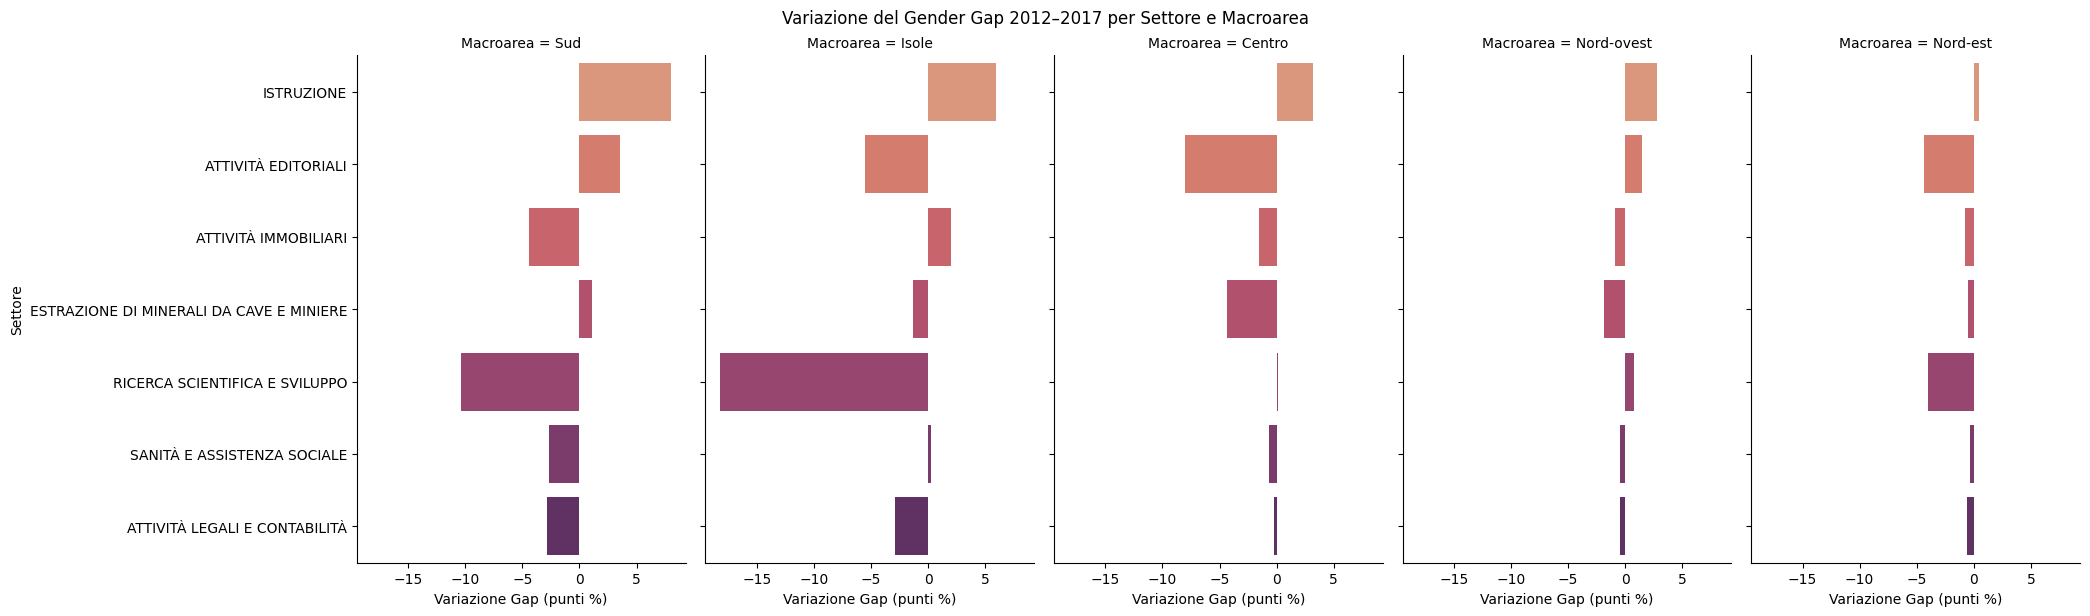

In [43]:
graf_var_gap_macroaree = sns.catplot(  #Creo un grafico per rappresentare i miei risultati
    data=df_gender_gap_macroaree_anni,
    y='Settore',
    x='Var Gap (p.p.)',
    hue='Settore',
    col='Macroarea',          #una colonna per ogni macroarea
    palette='flare',
    kind='bar',
    height=6,
    aspect=0.7,
    orient='h',
    legend=False
)
graf_var_gap_macroaree.set_axis_labels("Variazione Gap (punti %)", "Settore")
graf_var_gap_macroaree.fig.suptitle("Variazione del Gender Gap 2012–2017 per Settore e Macroarea", y=1.02)
plt.show()

### Interpretazione del Grafico – Variazione del Sex Gap 2012–2017 per ogni macroarea

Il grafico rappresenta la variazione del divario occupazionale tra uomini e donne in Italia, in base alla percentuale media di occupati per genere nel 2012 e nel 2017, per ciascun settore economico.

Le barre più lunghe sono in settori in cui hanno avuto più variazione di gap. 

Questa visualizzazione consente di identificare facilmente i settori più critici in termini di equità di genere e quelli che stanno andando nella direzione di una maggiore parità. In particolare possiamo osservare delle variazioni peculiari alle macroaree: 

- **Isole**: come notato anche poco prima, la variazione del gender gap per il settore *Ricerca scientifica e sviluppo* è notevole, soprattutto se paragonato alle altre macroaree, in cui vediamo o una variazione minima (**Centro**), o addirittura un aumento del Gender Gap a favore del genere maschile (**Nord-ovest**).
- *Attività editoriali*: risultati contrversi rispetto alle macroaree:
  - **Sud**: gap aumentato a favore degli uomini.
  - **Isole**: riduzione del gap di 5 punti circa.
  - **Centro**: riduzione ancora maggiore del gap: circa 8 punti.
  - **Nord-ovest**: diminuzione del gender gap (era prevalenza femminile, quindi aumento dell'occupazione maschile per questo settore).
  - **Nord-est**: riduzione del gap


#### Grafico di tipo line per osservare l'andamento del gap per questo range di tempo 

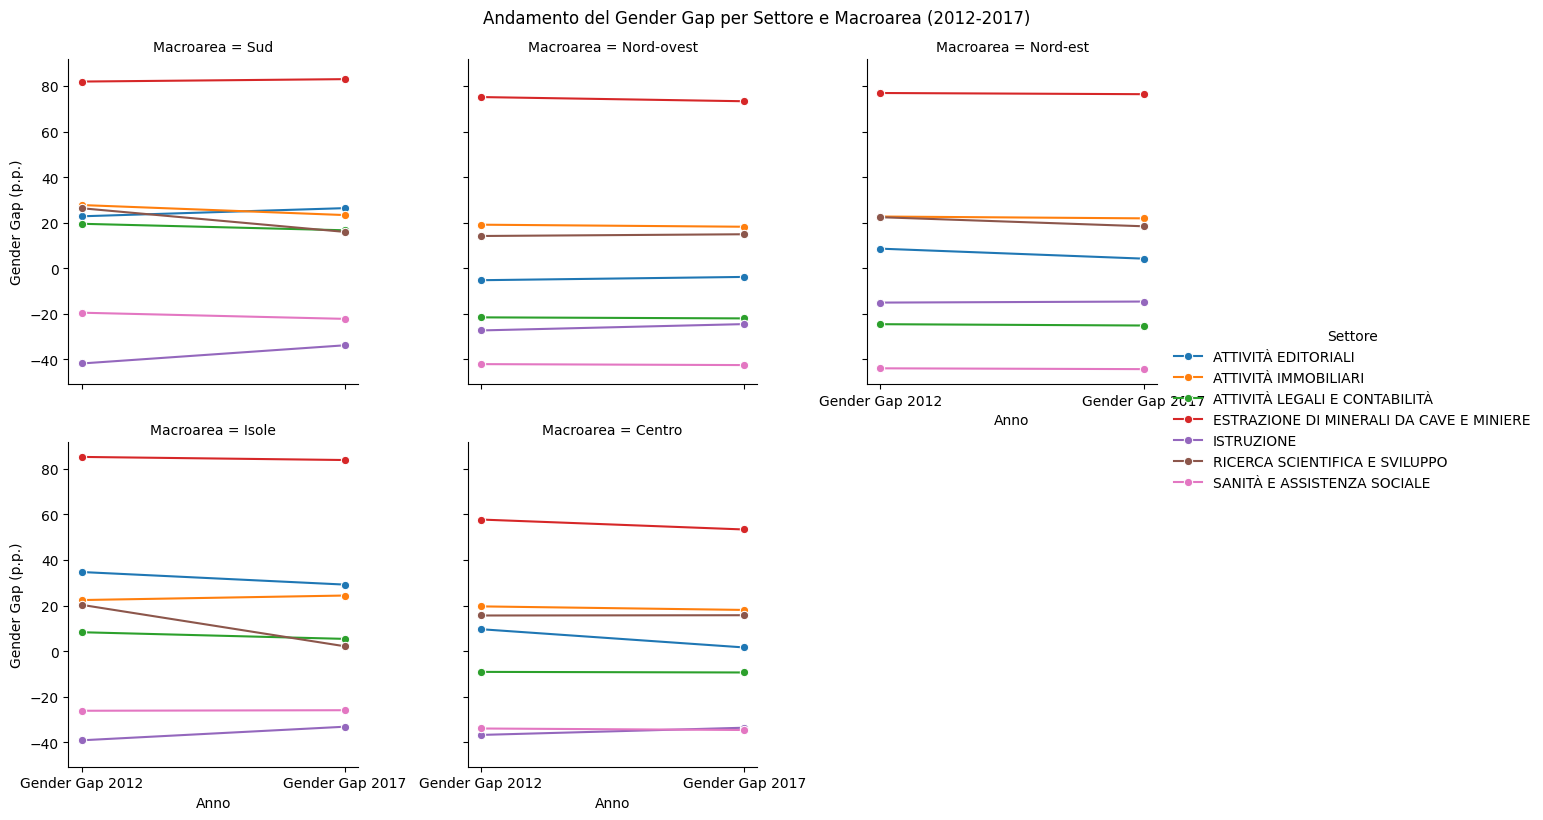

In [44]:
df_gap_uniti_colonna = pd.melt(    #faccio un melt per trasformare i dati: per avere anno e gap come colonne
    df_gender_gap_macroaree_anni,
    id_vars=['Macroarea', 'Settore'], #Colonne da mantenere fisse
    value_vars=['Gender Gap 2012', 'Gender Gap 2017'],  #Colonne da unire
    var_name='Anno', #Nuova colonna con i nomi Gender Gap 2012 e 2017
    value_name='Gender Gap') #nuova colonna

df_gap_uniti_colonna['Anno'] = df_gap_uniti_colonna['Anno']  #Pulisco colonna anno per avere solo anni 2012, e 2017

df_gap_uniti_colonna.sort_values(by=['Settore', 'Anno'], inplace=True) #Ordino il df per settore e anno

graf_andamento_gap = sns.FacetGrid(df_gap_uniti_colonna,
                                   col="Macroarea",  #faccio subplot per ogni macroarea
                                   col_wrap=3,   #numero colonne prima di andare a capo
                                   height=4,  #Altezza di ogni grafico
                                   sharey=True)  #Tutti i grafici hanno lo stesso asse y

graf_andamento_gap.map_dataframe(sns.lineplot, #.map_dataframe applica ad ogni subplot questi parametri
                                 x="Anno", 
                                 y="Gender Gap",  
                                 hue="Settore", 
                                 marker="o")

graf_andamento_gap.add_legend(title="Settore")

graf_andamento_gap.set_axis_labels("Anno", "Gender Gap (p.p.)")

graf_andamento_gap.fig.suptitle("Andamento del Gender Gap per Settore e Macroarea (2012-2017)", y=1.02)

plt.show()


### Interpretazione

I grafici mostrano per le aree del Nord una situazione abbastanza stabile, mentre, le maggiori escursioni le vediamo nelle aree del **Sud** e nelle **Isole**, dove in particolare sono in crescita di gender gap i settori: **Istruzione**; mentre il gender gap è in diminuzione per i settori: **Attività editoriali** (in particolare nelle *Isole*). 


## Stampo i risultati più incisivi

In particolare:

- 5 settori con il maggior aumento del gap (filtrando in base alla colonna della direzione gap)
- 5 settori con la maggior diminuzione del gap.

In [45]:
#5 settori con più aumento del gap 

df_gender_gap_macroaree_anni[df_gender_gap_macroaree_anni['Direzione Gap'] == 'aumentato'].sort_values('Var Gap (p.p.)', ascending=False).head(5)

Macroarea                                   Settore  % Maschi 2012  \
2          Sud                       ATTIVITÀ EDITORIALI          61.40   
5        Isole                      ATTIVITÀ IMMOBILIARI          61.20   
7          Sud  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          90.96   
8   Nord-ovest            RICERCA SCIENTIFICA E SVILUPPO          57.08   
11      Centro            RICERCA SCIENTIFICA E SVILUPPO          57.81   

    % Maschi 2017  % Femmine 2012  % Femmine 2017  Gender Gap 2012  \
2           63.19           38.60           36.81            22.80   
5           62.19           38.80           37.81            22.40   
7           91.49            9.04            8.51            81.92   
8           57.46           42.92           42.54            14.16   
11          57.87           42.19           42.13            15.62   

    Gender Gap 2017  Var Gap (p.p.) Direzione Gap  
2             26.38            3.58     aumentato  
5             24.38            1.98     aumentato  
7             82.98            1.06     aumentato  
8             14.92            0.76     aumentato  
11            15.74            0.12     aumentato

Si riscontra un aumento del gap in particolare al **Sud**: per settori *Attività editoriali*, che mostra un aumento del gap di più di 3 punti, a favore dei maschi. 

Interessante come nel settore *Ricerca scientifica e sviluppo* il gap sia aumentato in **Nord-ovest** e **Centro**, mentre nelle aree del **Sud** e nelle **Isole** si riscontrava una diminuzione importante del gap in questo settore. 

In [46]:
#5 settori con più diminuzione del gap 

df_gender_gap_macroaree_anni[df_gender_gap_macroaree_anni['Direzione Gap'] == 'diminuito'].sort_values('Var Gap (p.p.)', ascending=False).tail(5)


Macroarea                         Settore  % Maschi 2012  % Maschi 2017  \
30       Sud            ATTIVITÀ IMMOBILIARI          63.87          61.67   
31     Isole             ATTIVITÀ EDITORIALI          67.35          64.59   
32    Centro             ATTIVITÀ EDITORIALI          54.80          50.80   
33       Sud  RICERCA SCIENTIFICA E SVILUPPO          63.17          57.98   
34     Isole  RICERCA SCIENTIFICA E SVILUPPO          60.15          51.06   

    % Femmine 2012  % Femmine 2017  Gender Gap 2012  Gender Gap 2017  \
30           36.13           38.33            27.74            23.34   
31           32.65           35.41            34.70            29.18   
32           45.20           49.20             9.60             1.60   
33           36.83           42.02            26.34            15.96   
34           39.85           48.94            20.30             2.12   

    Var Gap (p.p.) Direzione Gap  
30           -4.40     diminuito  
31           -5.52     diminuito  
32           -8.00     diminuito  
33          -10.38     diminuito  
34          -18.18     diminuito

Tralasciando il settore *Ricerca scientifica e sviluppo*, già ampiamente discusso, i risultati sono notevoli. 
**Sud** e **Isole** mostrano un importante diminuzione del gap anche in settori quali: *Attività immobiliari* (sud) e *Attività editoriali*.

Questi risultati possono far pensare a una settorializzazione in base alle macroaree, in cui al *Sud* e nelle *Isole* stanno cercando di rimediare, diminuendo sensibilmente per alcuni settori il gender gap, ma, aumentandolo in altri settori. 

### Comparazione tra macroaree e Italia

Creo un nuovo DataFrame in cui includo anche l'Italia, in maniera da poter analizzare se l'andamento del gap per le macroaree, riflette la tendenza nazionale (per questi settori).

In [47]:
risultati_italia = [] #lista vuota per salvare i risultati di Italia

for settore in settori:  #Uso la stessa logica di prima: ciclo su settori
    dati_settore = istat_analisi_macroaree_anni[
        (istat_analisi_macroaree_anni['Settore di lavoro'] == settore) &
        (istat_analisi_macroaree_anni['Macroarea'] == 'Italia')]

    risultato = mf.calcola_gender_gap_settore(dati_settore, 2012, 2017)  #calcolo gender gap con la mia funzione

    if risultato:         #Se ottengo un risultato valido, aggiungo la colonna Macroarea = 'Italia' e salvo
        risultato['Macroarea'] = 'Italia'
        risultato['Settore'] = settore
        risultati_italia.append(risultato)

df_gap_solo_italia_anni = pd.DataFrame(risultati_italia) #creo un df con i risultati ottenuti

df_gap_solo_italia_anni = df_gap_solo_italia_anni[colonne_ordinate]

#Concateno il DataFrame con i dati per macroaree con quello per l'Italia
df_gender_gap_macroaree_italia_anni = pd.concat([df_gender_gap_macroaree_anni, df_gap_solo_italia_anni], ignore_index=True)

#Ordino il DataFrame completo in base alla variazione del gap e resetto l'indice
df_gender_gap_macroaree_italia_anni = df_gender_gap_macroaree_italia_anni.sort_values('Var Gap (p.p.)', ascending=False).reset_index(drop=True)

df_gender_gap_macroaree_italia_anni



Macroarea                                   Settore  % Maschi 2012  \
0          Sud                                ISTRUZIONE          29.11   
1        Isole                                ISTRUZIONE          30.43   
2       Italia                                ISTRUZIONE          34.47   
3          Sud                       ATTIVITÀ EDITORIALI          61.40   
4       Centro                                ISTRUZIONE          31.61   
5   Nord-ovest                                ISTRUZIONE          36.36   
6        Isole                      ATTIVITÀ IMMOBILIARI          61.20   
7   Nord-ovest                       ATTIVITÀ EDITORIALI          47.38   
8          Sud  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          90.96   
9   Nord-ovest            RICERCA SCIENTIFICA E SVILUPPO          57.08   
10    Nord-est                                ISTRUZIONE          42.47   
11       Isole               SANITÀ E ASSISTENZA SOCIALE          36.91   
12      Centro            RICERCA SCIENTIFICA E SVILUPPO          57.81   
13      Centro             ATTIVITÀ LEGALI E CONTABILITÀ          45.44   
14    Nord-est               SANITÀ E ASSISTENZA SOCIALE          28.05   
15  Nord-ovest               SANITÀ E ASSISTENZA SOCIALE          28.97   
16  Nord-ovest             ATTIVITÀ LEGALI E CONTABILITÀ          39.23   
17    Nord-est  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          88.45   
18    Nord-est             ATTIVITÀ LEGALI E CONTABILITÀ          37.73   
19      Centro               SANITÀ E ASSISTENZA SOCIALE          33.02   
20      Italia               SANITÀ E ASSISTENZA SOCIALE          32.33   
21    Nord-est                      ATTIVITÀ IMMOBILIARI          61.35   
22      Italia             ATTIVITÀ LEGALI E CONTABILITÀ          45.42   
23  Nord-ovest                      ATTIVITÀ IMMOBILIARI          59.56   
24      Italia                      ATTIVITÀ IMMOBILIARI          60.52   
25       Isole  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          92.60   
26      Centro                      ATTIVITÀ IMMOBILIARI          59.81   
27  Nord-ovest  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          87.56   
28      Italia                       ATTIVITÀ EDITORIALI          51.83   
29         Sud               SANITÀ E ASSISTENZA SOCIALE          40.25   
30      Italia            RICERCA SCIENTIFICA E SVILUPPO          59.18   
31         Sud             ATTIVITÀ LEGALI E CONTABILITÀ          59.76   
32       Isole             ATTIVITÀ LEGALI E CONTABILITÀ          54.14   
33    Nord-est            RICERCA SCIENTIFICA E SVILUPPO          61.20   
34      Italia  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          84.22   
35      Centro  ESTRAZIONE DI MINERALI DA CAVE E MINIERE          78.86   
36    Nord-est                       ATTIVITÀ EDITORIALI          54.30   
37         Sud                      ATTIVITÀ IMMOBILIARI          63.87   
38       Isole                       ATTIVITÀ EDITORIALI          67.35   
39      Centro                       ATTIVITÀ EDITORIALI          54.80   
40         Sud            RICERCA SCIENTIFICA E SVILUPPO          63.17   
41       Isole            RICERCA SCIENTIFICA E SVILUPPO          60.15   

    % Maschi 2017  % Femmine 2012  % Femmine 2017  Gender Gap 2012  \
0           33.10           70.89           66.90           -41.78   
1           33.41           69.57           66.59           -39.14   
2           36.45           65.53           63.55           -31.06   
3           63.19           38.60           36.81            22.80   
4           33.19           68.39           66.81           -36.78   
5           37.75           63.64           62.25           -27.28   
6           62.19           38.80           37.81            22.40   
7           48.10           52.62           51.90            -5.24   
8           91.49            9.04            8.51            81.92   
9           57.46           42.92           42.54            14.16   
10       

In [48]:
df_gender_gap_macroaree_italia_anni.to_csv("output_progetto/analisi_istat/gender_gap/df_gender_gap_macroaree_italia_anni.csv", index=False)  #salvo il df
df_gap_solo_italia_anni.to_csv("output_progetto/analisi_istat/gender_gap/df_gap_solo_italia_anni.csv", index=False)

### Confronto variazione Gender Gap: Macroaree vs Italia (2012–2017)

Creo un nuovo DataFrame per confrontare la variazione del Gender Gap occupazionale tra il 2012 e il 2017, nelle diverse **macroaree** italiane rispetto alla media nazionale (**Italia**).

- Per ogni riga, calcolo Variazione Gender Gap
- Estrae la variazione nazionale (`Variazione Italia`) per ciascun settore
- Confronta le macroaree con l’Italia calcolando Differenza_Italia.

Il risultato finale mostra in quali settori le macroaree hanno registrato un miglioramento **maggiore** rispetto alla media nazionale o un **peggioramento** rispetto alla tendenza italiana.


In [49]:
df_confronto = df_gender_gap_macroaree_italia_anni[['Macroarea', 'Settore', 'Gender Gap 2012', 'Gender Gap 2017']].copy() #Creo nuovo df e filtro le colonne rilevanti per il confronto

df_confronto['Variazione Gender Gap in Macroaree'] = df_gender_gap_macroaree_italia_anni['Var Gap (p.p.)']
var_italia = df_confronto[df_confronto['Macroarea'] == 'Italia'][['Settore', 'Variazione Gender Gap in Macroaree']] #Estraggo i dati per le variazioni gap italia per ogni settore
var_italia.columns = ['Settore', 'Variazione Italia'] #rinomino le colonne di var_italia (altrimenti l'etichetta sarebbe riferita alle macroaree)

confronto_macro = df_confronto[df_confronto['Macroarea'] != 'Italia'] #Seleziono le macroaree escludendo l'Italia

confronto_finale_gap_italia_macroaree = pd.merge(confronto_macro, var_italia, on='Settore', how='left')  #Faccio un merge per inserire i dati inerenti all'Italia

#Calcolo la differenza rispetto all’Italia per le macroaree e settore
confronto_finale_gap_italia_macroaree['Differenza Italia'] = confronto_finale_gap_italia_macroaree['Variazione Gender Gap in Macroaree'] - confronto_finale_gap_italia_macroaree['Variazione Italia']

confronto_finale_gap_italia_macroaree

Macroarea                                   Settore  Gender Gap 2012  \
0          Sud                                ISTRUZIONE           -41.78   
1        Isole                                ISTRUZIONE           -39.14   
2          Sud                       ATTIVITÀ EDITORIALI            22.80   
3       Centro                                ISTRUZIONE           -36.78   
4   Nord-ovest                                ISTRUZIONE           -27.28   
5        Isole                      ATTIVITÀ IMMOBILIARI            22.40   
6   Nord-ovest                       ATTIVITÀ EDITORIALI            -5.24   
7          Sud  ESTRAZIONE DI MINERALI DA CAVE E MINIERE            81.92   
8   Nord-ovest            RICERCA SCIENTIFICA E SVILUPPO            14.16   
9     Nord-est                                ISTRUZIONE           -15.06   
10       Isole               SANITÀ E ASSISTENZA SOCIALE           -26.18   
11      Centro            RICERCA SCIENTIFICA E SVILUPPO            15.62   
12      Centro             ATTIVITÀ LEGALI E CONTABILITÀ            -9.12   
13    Nord-est               SANITÀ E ASSISTENZA SOCIALE           -43.90   
14  Nord-ovest               SANITÀ E ASSISTENZA SOCIALE           -42.06   
15  Nord-ovest             ATTIVITÀ LEGALI E CONTABILITÀ           -21.54   
16    Nord-est  ESTRAZIONE DI MINERALI DA CAVE E MINIERE            76.90   
17    Nord-est             ATTIVITÀ LEGALI E CONTABILITÀ           -24.54   
18      Centro               SANITÀ E ASSISTENZA SOCIALE           -33.96   
19    Nord-est                      ATTIVITÀ IMMOBILIARI            22.70   
20  Nord-ovest                      ATTIVITÀ IMMOBILIARI            19.12   
21       Isole  ESTRAZIONE DI MINERALI DA CAVE E MINIERE            85.20   
22      Centro                      ATTIVITÀ IMMOBILIARI            19.62   
23  Nord-ovest  ESTRAZIONE DI MINERALI DA CAVE E MINIERE            75.12   
24         Sud               SANITÀ E ASSISTENZA SOCIALE           -19.50   
25         Sud             ATTIVITÀ LEGALI E CONTABILITÀ            19.52   
26       Isole             ATTIVITÀ LEGALI E CONTABILITÀ             8.28   
27    Nord-est            RICERCA SCIENTIFICA E SVILUPPO            22.40   
28      Centro  ESTRAZIONE DI MINERALI DA CAVE E MINIERE            57.72   
29    Nord-est                       ATTIVITÀ EDITORIALI             8.60   
30         Sud                      ATTIVITÀ IMMOBILIARI            27.74   
31       Isole                       ATTIVITÀ EDITORIALI            34.70   
32      Centro                       ATTIVITÀ EDITORIALI             9.60   
33         Sud            RICERCA SCIENTIFICA E SVILUPPO            26.34   
34       Isole            RICERCA SCIENTIFICA E SVILUPPO            20.30   

    Gender Gap 2017  Variazione Gender Gap in Macroaree  Variazione Italia  \
0            -33.80                                7.98               3.96   
1            -33.18                                5.96               3.96   
2             26.38                                3.58              -2.08   
3            -33.62                                3.16               3.96   
4            -24.50                                2.78               3.96   
5             24.38                                1.98              -1.12   
6             -3.80                                1.44              -2.08   
7             82.98                                1.06              -3.98   
8             14.92                                0.76              -2.76   
9            -14.60                                0.46               3.96   
10           -25.94                                0.24              -0.70   
11            15.74                                0.12              -2.76   
12            -9.38                               -0.26              -0.84   
13           -44.26                               -0.36              -0.70   
14           -42.48                               -0.42       

In [50]:
confronto_finale_gap_italia_macroaree.to_csv("output_progetto/analisi_istat/gender_gap/confronto_finale_gap_italia_macroaree.csv", index=False)

## 3 top e 3 flop area-settore per variazione del gender gap rispetto all'Italia
Stampo i risultati inerenti ad ogni macroaree, rispettivamente i 3 settori in cui è migliorato rispetto all'Italia e, i 3 in cui è peggiorato rispetto all'Italia

In [51]:
print("CONFRONTO TRA MACROAREE E ITALIA (2012–2017)") #stampa il titolo del confronto
print("=" * 50) 

for macro in macroaree_selezionate:  #ciclo sulle aree 'macroaree_selezionate'
    print(f"\nMACROAREA: {macro.upper()}") #stmapa il nome della variabile in maiuscolo
    print("-" * 30)

    dati_macro = confronto_finale_gap_italia_macroaree[confronto_finale_gap_italia_macroaree['Macroarea'] == macro] #seleziono dal df solo le righe che corrispondono alla macroarea corrente

#Top 3 peggioramenti rispetto all'Italia
    
    dati_peggiorati = dati_macro.nlargest(3, 'Differenza Italia') #nlargest prende i valori più alti del df rispetto all'Italia
    print("\nDove il gap è peggiorato più che in Italia:")
    for i in range(min(3, len(dati_peggiorati))): #Ciclo su righe selezionate come peggioramenti
        riga_pegg = dati_peggiorati.iloc[i] #estrae la riga corrente
        print(    
            f"{riga_pegg['Settore']}: "  #stampa settore
            f"{riga_pegg['Differenza Italia']:+.2f} p.p. " #differenza da Italia (segno + è per mostrare il segno nella stampa)
            f"(Italia: {riga_pegg['Variazione Italia']:+.2f}, " #Variazione Italia
            f"{macro}: {riga_pegg['Variazione Gender Gap in Macroaree']:+.2f})"  #Vairazione macroarea
    )


#Top 3 miglioramenti rispetto all'Italia
    
    dati_migliorati = dati_macro.nsmallest(3, 'Differenza Italia') #nsmallest prende gli elemenit più piccoli del df rispetto all'Italia
    print("\nDove il gap è migliorato più che in Italia:")
    for i in range(min(3, len(dati_migliorati))): #Ciclo su righe selezionate come miglioramenti
        riga = dati_migliorati.iloc[i] #estrae la riga corrente
        print(
            f"{riga['Settore']}: "
            f"{riga['Differenza Italia']:+.2f} p.p. "
            f"(Italia: {riga['Variazione Italia']:+.2f}, "
            f"{macro}: {riga['Variazione Gender Gap in Macroaree']:+.2f})"
    )


CONFRONTO TRA MACROAREE E ITALIA (2012–2017)

MACROAREA: NORD-OVEST
------------------------------

Dove il gap è peggiorato più che in Italia:
ATTIVITÀ EDITORIALI: +3.52 p.p. (Italia: -2.08, Nord-ovest: +1.44)
RICERCA SCIENTIFICA E SVILUPPO: +3.52 p.p. (Italia: -2.76, Nord-ovest: +0.76)
ESTRAZIONE DI MINERALI DA CAVE E MINIERE: +2.14 p.p. (Italia: -3.98, Nord-ovest: -1.84)

Dove il gap è migliorato più che in Italia:
ISTRUZIONE: -1.18 p.p. (Italia: +3.96, Nord-ovest: +2.78)
ATTIVITÀ IMMOBILIARI: +0.22 p.p. (Italia: -1.12, Nord-ovest: -0.90)
SANITÀ E ASSISTENZA SOCIALE: +0.28 p.p. (Italia: -0.70, Nord-ovest: -0.42)

MACROAREA: NORD-EST
------------------------------

Dove il gap è peggiorato più che in Italia:
ESTRAZIONE DI MINERALI DA CAVE E MINIERE: +3.46 p.p. (Italia: -3.98, Nord-est: -0.52)
SANITÀ E ASSISTENZA SOCIALE: +0.34 p.p. (Italia: -0.70, Nord-est: -0.36)
ATTIVITÀ IMMOBILIARI: +0.32 p.p. (Italia: -1.12, Nord-est: -0.80)

Dove il gap è migliorato più che in Italia:
ISTRUZIONE

## Grafico di confronto per la variazione del Gender Gap (2012-2017) nelle macroaree e Italia

- Un grafico per ogni settore
- Linea dell'Italia sarà nera tratteggiata, per non confonderla con le altre macroaree

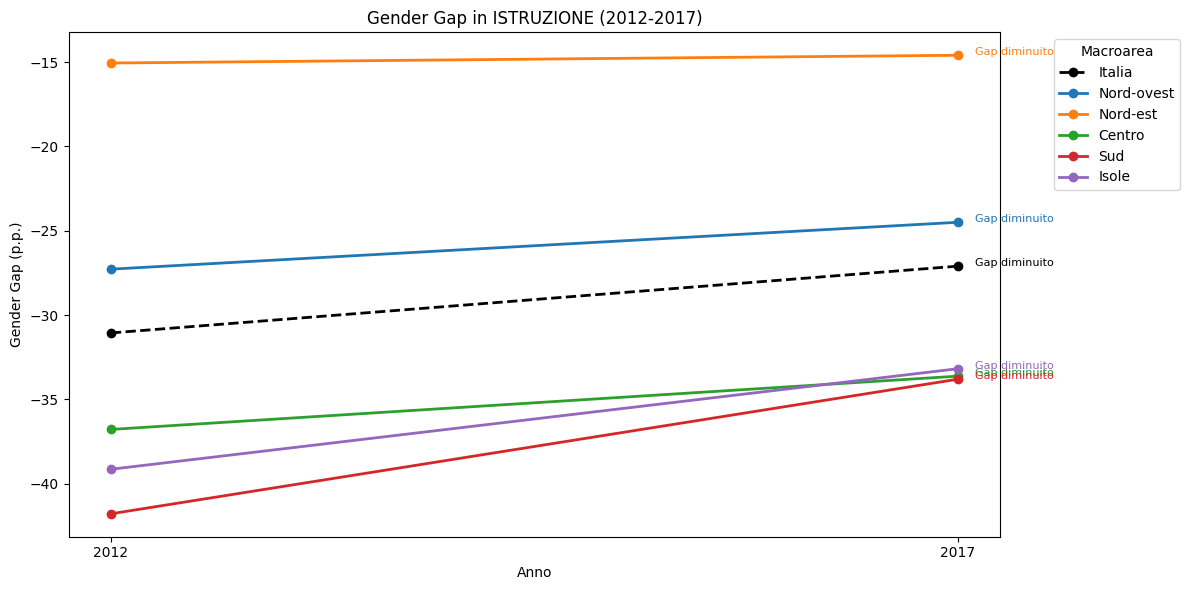

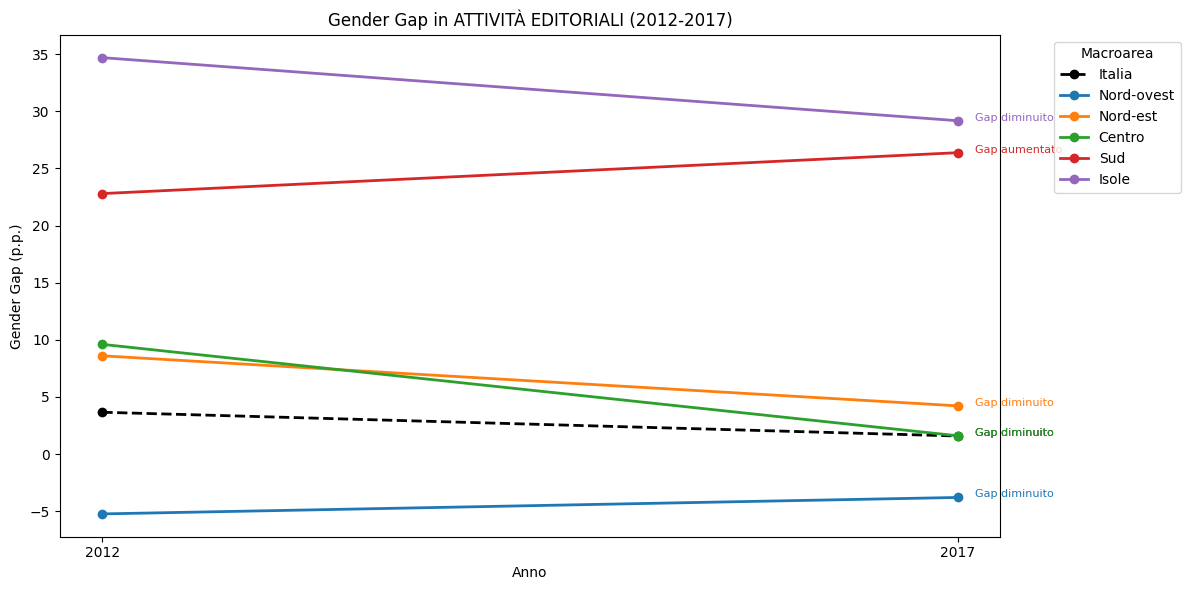

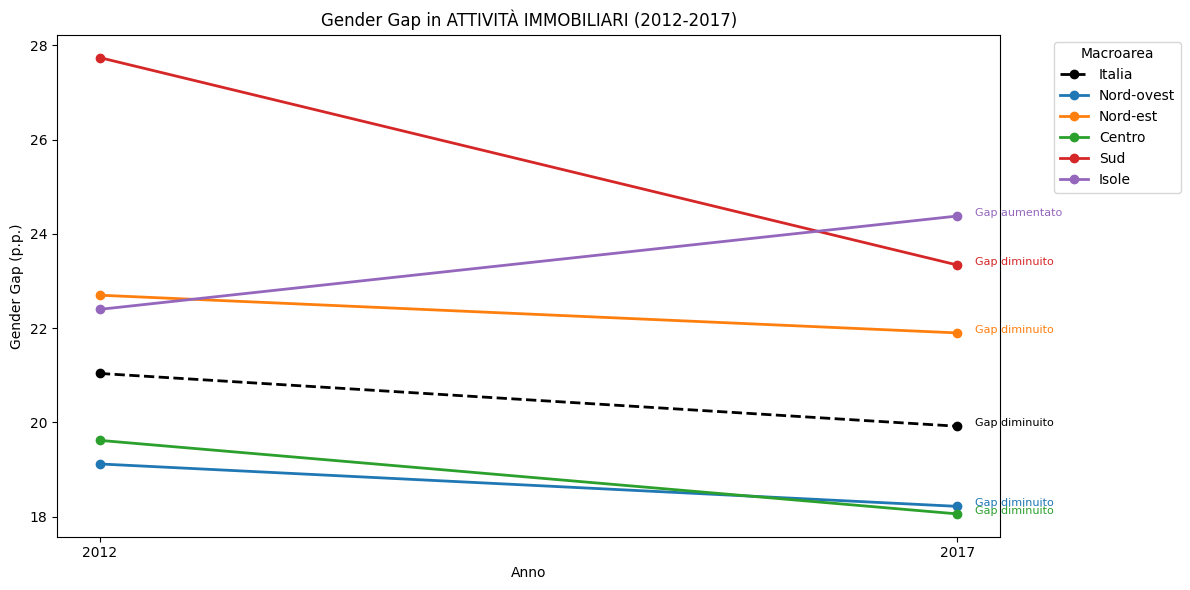

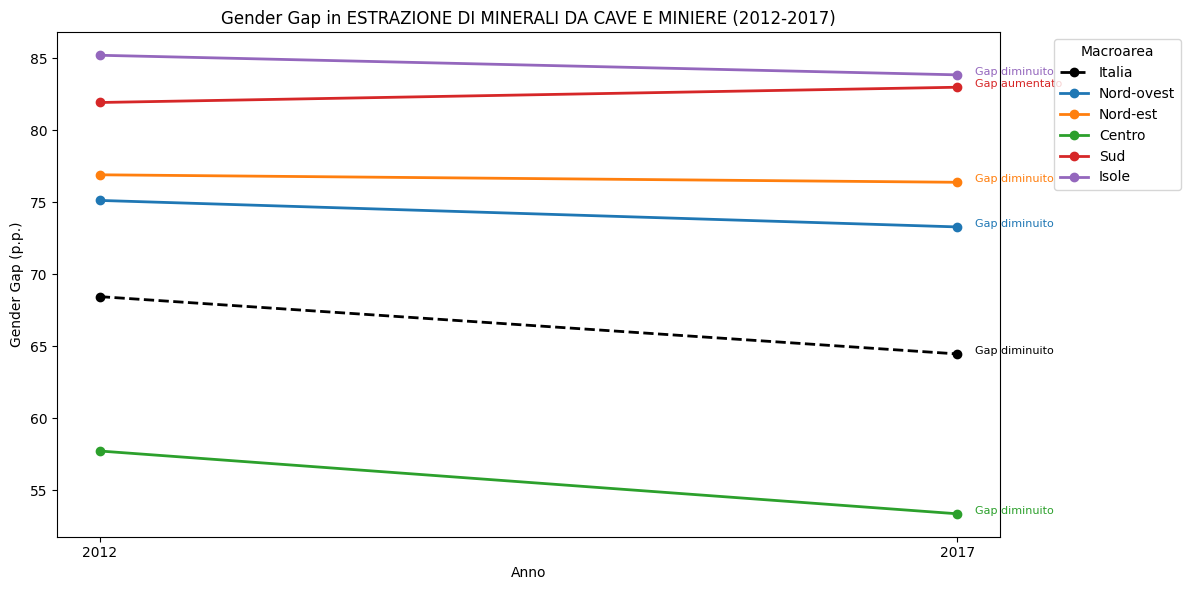

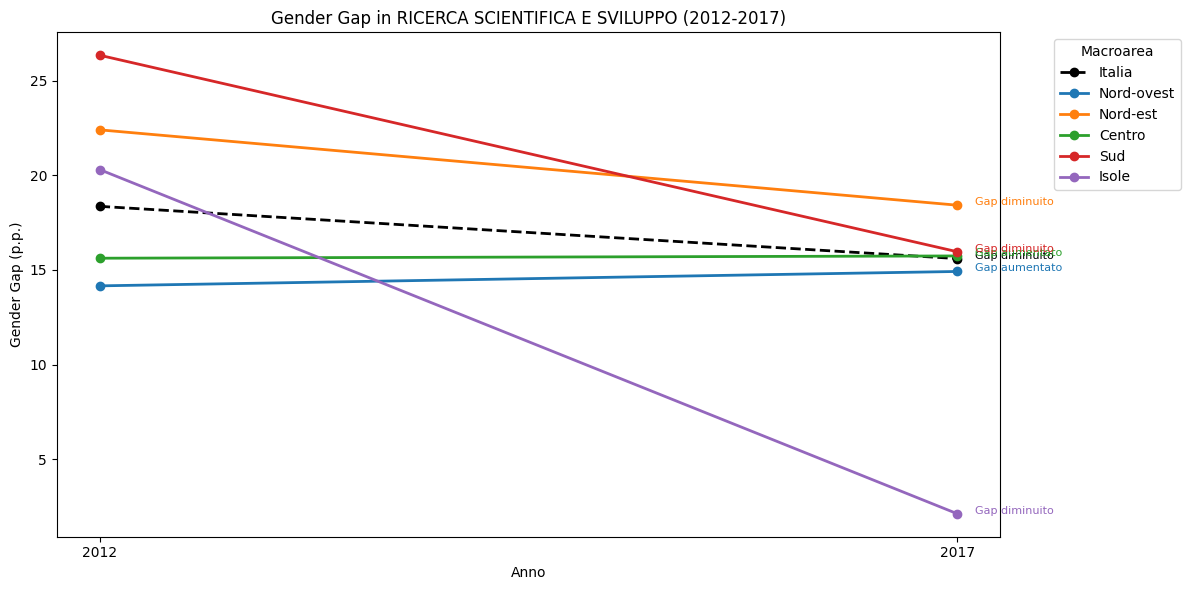

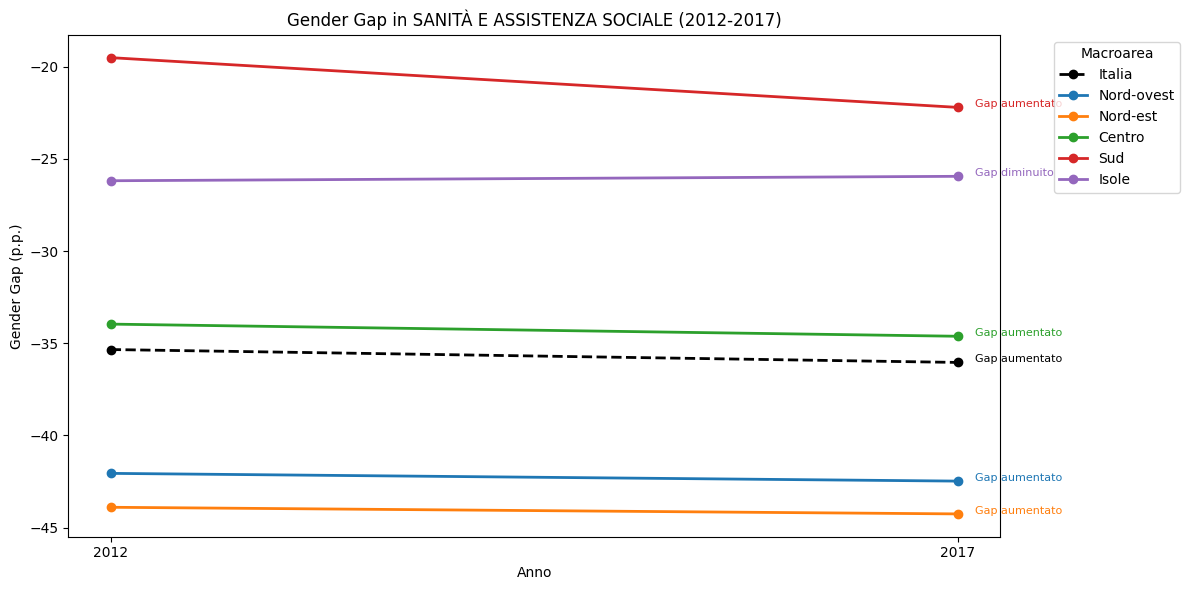

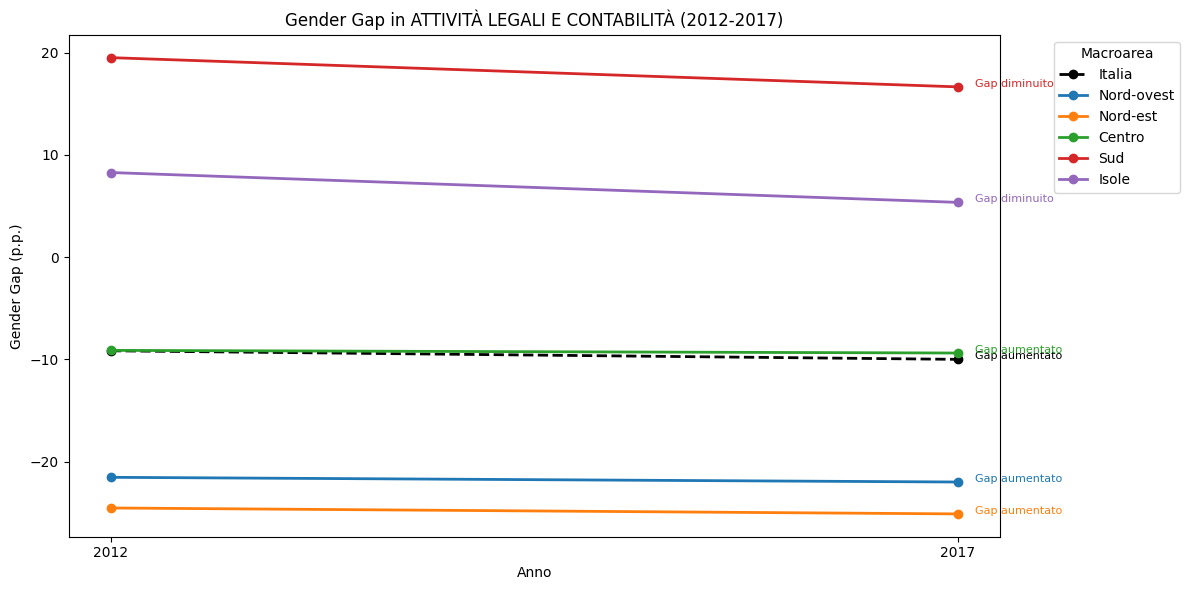

In [52]:
df_macroaree_italia_colonne_gender_gap = pd.concat([
    df_gender_gap_macroaree_italia_anni[['Macroarea', 'Settore', 'Gender Gap 2012']].rename(columns={'Gender Gap 2012': 'Gender Gap'}).assign(Anno=2012),
    df_gender_gap_macroaree_italia_anni[['Macroarea', 'Settore', 'Gender Gap 2017']].rename(columns={'Gender Gap 2017': 'Gender Gap'}).assign(Anno=2017),])

macroaree = ['Nord-ovest', 'Nord-est', 'Centro', 'Sud', 'Isole'] #Definisco una lista delle macroaree da usare, in maniera da escludere l'Italia

colors = ['#1f77b4', #Blu Nord-ovest
          '#ff7f0e', #Arancione Nord-est
          '#2ca02c', #Verde 
          '#d62728', #Rosso Sud
          '#9467bd'] #Viola Isole

anni = [2012, 2017] #anni da mettere in asse x

professioni = df_macroaree_italia_colonne_gender_gap['Settore'].unique() #Lista di professioni uniche nel df

for professione in professioni: #Ciclo su ogni professione per fare grafici separati
    plt.figure(figsize=(12, 6))  #imposto le dimensioni dei grafici
    
    dati_italia = df_macroaree_italia_colonne_gender_gap[ #Estraggo dati Italia per la professione corrente ordinati per anno
        (df_macroaree_italia_colonne_gender_gap['Settore'] == professione) &
        (df_macroaree_italia_colonne_gender_gap['Macroarea'] == 'Italia')].sort_values('Anno')
    
    if len(dati_italia) == 2: #Se ci sono entrambi gli anni (2012 e 2017) traccia la linea tratteggiata nera per l'Italia (in questo modo la distingue dalle altre macroaree)
        gap_2012 = dati_italia.iloc[0]['Gender Gap']  #estraggo valori per calcoli del gender gap 
        gap_2017 = dati_italia.iloc[1]['Gender Gap'] 
        direzione = "Gap diminuito" if abs(gap_2017) < abs(gap_2012) else "Gap aumentato"  #indico la direzione

        graf_gap_2012_2017_tutti = plt.plot(dati_italia['Anno'], dati_italia['Gender Gap'], 'k--', label='Italia', linewidth=2, marker='o')
        
        plt.text(  #etichette per direzione del gap
        dati_italia.iloc[1]['Anno'] + 0.1,
        dati_italia.iloc[1]['Gender Gap'],
        direzione,
        color='black',
        fontsize=8
    )
    
    for i, macro in enumerate(macroaree): #Ciclo per ogni macroarea da visualizzare 
        dati_macro = df_macroaree_italia_colonne_gender_gap[ #estraggo dati per professione e macroarea attuale, ordinate per anno
            (df_macroaree_italia_colonne_gender_gap['Settore'] == professione) &
            (df_macroaree_italia_colonne_gender_gap['Macroarea'].str.strip().str.lower() == macro.lower())].sort_values('Anno') #Normalizzo i nomi, in maniera tale che non risentano del case-sensitive
        
        if len(dati_macro) == 2:   #se ci sono entrambi gli anni per le macroaree, traccio le linee colorate
            gap_2012 = dati_macro['Gender Gap'].iloc[0]  #imposto i calcoli per le etichette sulle direzione del gender gap
            gap_2017 = dati_macro['Gender Gap'].iloc[1]
            direzione = "Gap diminuito" if abs(gap_2017) < abs(gap_2012) else "Gap aumentato" 
            
            plt.plot(dati_macro['Anno'], dati_macro['Gender Gap'], color=colors[i], label=macro, linewidth=2, marker='o')
            
            plt.text(  #valori su etichette del gap
            dati_macro.iloc[1]['Anno'] + 0.1,
            dati_macro.iloc[1]['Gender Gap'],
            direzione,
            color=colors[i],
            fontsize=8
        )
    plt.title(f'Gender Gap in {professione.upper()} (2012-2017)')
    plt.xlabel('Anno')
    plt.ylabel('Gender Gap (p.p.)')
    plt.xticks(anni)
    plt.legend(title='Macroarea', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# Interpretazione Gender Gap per Macroarea e Italia (2012–2017) 

Per interpretare correttamente questo grafico, bisogna considerare i valori di partenza: ad esempio **Ricerca scientifica e sviluppo** ha una riduzione del gap di -18 punti circa, da una posizione di partenza di prevalenza maschile, quindi la linea discende nettamente, mentre, ad esempio per valori come **Istruzione** per Italia, che diminuisce il gap (che però era a favore femminile), la linea sarà crescente, in quanto il valore aumenta. Per chiarimento, ho inserito l'etichetta inerente alla direzione del gap.
### Nord-Ovest

- **Peggioramenti marcati**:
  -  *Ricerca scientifica e sviluppo*: in Italia il gap si è ridotto di -5.74 p.p., mentre qui **è aumentato** (+0.76): **+6.50 p.p. rispetto a Italia**.
  -  *Attività editoriali*: mentre in Italia si è ridotto, qui è **aumentato**: andamento opposto.
- **Miglioramenti deboli**:
  - *Istruzione*: peggiora meno che a livello nazionale (+2.78 vs +4.05), ma **rimane un aumento del gap**.

**Conclusione**: il Nord-Ovest è in controtendenza negativa rispetto all’Italia nei settori scientifici e culturali. Unico punto parzialmente positivo: l’istruzione peggiora meno che altrove.

### Nord-Est

- **Peggioramenti**:
  - *Ricerca scientifica e sviluppo*: il gap si riduce ma **meno** che a livello nazionale (miglioramento inferiore all’Italia).
  - *Estrazione di minerali da cave e miniere*: peggioramento relativo rispetto all' Italia.
- **Miglioramenti**:
  - *Istruzione*: +0.46 p.p. contro i +4.05 italiani (**meglio dell’Italia di 3.59 p.p.**).
  - *Attività editoriali*: riduzione del gap più marcata rispetto alla variazione nazionale.

**Conclusione**: Nord-Est mostra **progressi superiori alla media italiana** in *Istruzione* ed *Attività editoriali*, ma non riesce a tenere il passo sul fronte scientifico.

### Centro

- **Peggioramenti gravi**:
  - *Ricerca scientifica e sviluppo*: in Italia migliorava, qui peggiora sensibilmente: **grave controtendenza**.
  - *Attività legali e contabilità* e *Sanità e assistenza sociale*: peggioramenti lievi, ma comunque peggiori rispetto al dato nazionale.
- **Miglioramenti**:
  - *Attività editoriali*: miglioramento molto superiore alla media italiana.
  - *Istruzione*: anche qui il gap cresce meno che in Italia.

**Conclusione**: Il Centro si distingue **positivamente nei settori culturali**, ma **delude nella Ricerca**, con un’inversione di tendenza preoccupante rispetto ai dati della variazione italiana.

### Sud

- **Peggioramenti**:
  - *Istruzione*: peggioramento **più forte che in Italia** (+7.98 contro +4.05).
  - *Attività editoriali*: qui il gap **aumenta**, mentre in Italia diminuisce: andamento contrario.
- **Miglioramenti**:
  - *Ricerca scientifica e sviluppo*: riduzione del gap **quasi doppia rispetto all’Italia** (Italia: -5.74, Sud: -10.38).
  - *Attività immobiliari* e *Sanità e assistenza sociale*: miglioramenti **più marcati che in Italia**.

**Conclusione**: il Sud è **ambivalente**: fallisce dove dovrebbe garantire equità (istruzione), ma eccelle nella **ricerca e nei servizi**.

### Isole

- **Peggioramenti**:
  - *Istruzione*: peggioramento più ampio rispetto all’Italia (+5.96 vs +4.05).
  - *Sanità e assistenza sociale* e *Attività immobiliari*: mentre l’Italia migliora, qui il gap **cresce**.
- **Miglioramenti forti**:
  - *Ricerca scientifica e sviluppo*: miglioramento **più netto di tutta Italia** (Italia: -5.74, Isole: -18.18).
  - *Attività editoriali* e *Attività legali e contabilità*: riduzione del gap **più ampia rispetto alla media nazionale**.

**Conclusione**: Isole **eccellenti nei settori accademici e legali**, ma con **forti criticità nei settori sociali**, specie istruzione e sanità.

### Riflessione finale

- **Ricerca scientifica e sviluppo**: migliora ovunque **tranne Centro e Nord-Ovest** (dove peggiora, contro il trend nazionale).
- **Istruzione**: **peggiora ovunque**, ma molto più **al Sud e nelle Isole** rispetto all’Italia.
- **Attività editoriali**: solo **Centro, Nord-Est e Isole** fanno meglio dell’Italia. Altrove il divario cresce.
- **Attività legali e contabilità**: **solo le Isole** migliorano rispetto al trend italiano.
- **Sanità e assistenza sociale**: solo **il Sud migliora più dell’Italia**. Isole e Centro peggiorano.

Da questo confronto con l’Italia si evince come non esista una frattura Nord/Sud lineare. Alcune macroaree (*Isole*) eccellono nella Ricerca ma falliscono nei servizi. Il **Nord-Ovest delude nei settori chiave**. Il Sud è un caso limite: **ottimi risultati nella Ricerca, ma fallimenti pesanti nell’Istruzione**.

Da questa analisi, quindi, emerge come non ci sia una spaccatura Nord-Sud, anzi, essa è **settore-specifico**.

### Con questo abbiamo concluso l'analisi del dataset istat. La riprenderemo in seguito in (task 3) per la comparazione con i dati del corpus PAISA.

# 2) ANALISI PAISA

In questa seconda parte di analisi si andrà ad analizzare:

- 2a) Task che si divide in due fasi:
   - Si normalizza e tokenizza il corpus, in modo da renderlo disponibile per l'analisi.
   - Si escluderanno Url che danno messaggi di errori e, si divideranno gli url in categorie.
- 2b) Occorrenze delle professioni all'interno del corpus, come ad esempio: *avvocato/avvocata*, per poter osservare quali sono le parole più comuni per parlare di queste attività e, si visualizzeranno le occorrenze nel testo in cui queste occorrono. 
- 2c) Occorrenze delle parole delle professioni, inerenti alle professioni e ai settori, divise per genere (maschile o femminile), basandosi sui suffissi finali delle parole.
- 2d) Analisi delle categorie di url in cui compaiono queste parole, divise per genere.

## 2a) Normalizzazione del corpus.

Come primo passaggio apriamo e visualizziamo il corpus originale.

In [53]:
with open("data/paisa/paisa.csv", newline = "", encoding = "utf-8") as infile:
    reader= csv.DictReader(infile)  #leggo il file paisa grezzo
    for i, row in enumerate(reader):
        print(row)  #dizionario per cui ogni riga è una chiave
        if i >= 2:  #stampo solo le prime 10 righe
            break  #In questo modo ho visualizzato le prime 10 righe del file paisa grezzo per visualizzarne la struttura e come è messo
        

{'id': '242490', 'text': 'François Gigot de Peyronie.\nChirurgo della corte del re di Francia Luigi XV, descrisse per primo, nel 1743, la cosiddetta "induratio penis plastica" (IPP), che da lui prende il nome di "morbo di Peyronie".\nFiglio di chirurgo a sua volta, iniziò dapprima gli studi presso i Gesuiti a Montpellier, una delle migliori scuole di Francia, studiò quindi filosofia per due anni ed iniziò poi l\'apprendistato di chirurgo. Alla giovane età di 17 anni era "magister" di chirurgia. A Parigi ebbe modo di apprendere ancora da Georges Mareschal (1658-1736), primo chirurgo all\'"Hôtel-Dieu de Paris".\nCome membro della "Société royale des Sciences" di Montpellier si fece una reputazione di chirurgo capace nell\'Armata del maresciallo de Villars; nel 1717 fu designato come successore di Mareschal come primo medico personale di Luigi XV, ed entrò in carica alla morte del suo maestro nel 1736; nel 1721 fu fatto cavaliere.\nOpere\nVoci correlate\nFrançois Gigot de la Peyronie\n', 

In [54]:
with open('data/stopwords-it.txt', 'r', encoding='utf-8') as f: #apro il file txt stopwords, contente le parole da rimuovere
    stopwords = set(line.strip() for line in f)

Applico la funzione `normalize`: normalizza il corpus, divide in token per rimuovere le stopwords e poi ricostruisce una stringa unica, unendo i token

In [55]:
with open("data/paisa/paisa.csv", newline="", encoding="utf-8") as infile: #apro il file paisa originale
    with open("output_progetto/df_puliti/paisa_pulito.csv", "w", newline="", encoding="utf-8") as outfile: #Apro un file in modalità scrittura per salvare i dati normalizzati
        reader= csv.DictReader(infile)  #con il metodo DictReader posso accedere alle righe e alle colonne del mio file: lettore csv che restituisce ogni riga come dizionario
        fieldnames= reader.fieldnames #prende le intestazioni
        writer = csv.DictWriter(outfile, fieldnames = fieldnames) #Creo un writer CSV per scrivere righe con le stesse intestazioni
        writer.writeheader() #Scrivo l'intestazione
        for colonna in reader:#Ciclo su ogni riga del file originale
            colonna["text"] = mf.normalize (colonna["text"], stopwords) #Normalizzo il contenuto della colonna text usano la funzione normalize, togliendo anche le stopwords, solo in quella colonna
            writer.writerow(colonna) #scrivo la riga normalizzata nel nuovo csv

   

In [56]:
with open("output_progetto/df_puliti/paisa_pulito.csv", newline = "", encoding = "utf-8") as infile:
    reader= csv.DictReader(infile)  #Apro il file paisa_pulito (normalizzato) in modalità lettura
    for i, row in enumerate(reader):
        print(row)  #dizionario per cui ogni colonna è una chiave
        if i >= 2:  #stampo solo le prime 3 righe
            break  #In questo modo ho visualizzato le prime 3 righe per visualizzare il risultato ottenuto
        

{'id': '242490', 'text': 'françois gigot de peyronie chirurgo corte re francia luigi xv descrisse 1743 la cosiddetta induratio penis plastica ipp prende il morbo peyronie figlio chirurgo iniziò dapprima gli studi presso i gesuiti montpellier una migliori scuole francia studiò filosofia iniziò l apprendistato chirurgo giovane età 17 magister chirurgia parigi apprendere georges mareschal 1658 1736 chirurgo hôtel dieu de paris membro société royale des sciences montpellier una reputazione chirurgo capace armata maresciallo de villars 1717 designato successore mareschal medico personale luigi xv entrò carica morte maestro 1736 1721 cavaliere opere voci correlate françois gigot de la peyronie', 'url': 'http://it.wikipedia.org/wiki/Fran%C3%A7ois_Gigot_de_Peyronie'}
{'id': '5009705', 'text': 'pseudostereoscopia limiti stereoscopia naturale il sistema rilevamento cervello infallibile distanze inferiori metro praticamente inutilizzabile rilevamenti distanza una conferma viene dalia sicurezza mu

### Individuazione di URL con messaggi di errore

Controllando il corpus paisa, mi sono accorta che alcuni url contenevano messaggi di errore.

Definisco un'espressione regolare per trovare nei testi messaggi di errore comuni. Carico il file `paisa_pulito.csv` con pandas e filtro le righe il cui testo contiene questi messaggi. Infine, estraggo gli URL corrispondenti per identificare dati sospetti da controllare o escludere. Infine creerò un nuovo dataframe, chiamato `paisa_analisi` contenente queste informazioni: 

- **id**
- **text**
- **url**
- **categoria url**

Successivamente le analisi dal corpus verranno tutte effettuate utilizzando `paisa_analisi`.

In [57]:
reg_ex_url_sospetti = r'wwwoffle|this error message|socket timeout' #espressione regolare con | separatore logico OR per cercare nei testi quei messaggi di errore

paisa_pulito = pd.read_csv("output_progetto/df_puliti/paisa_pulito.csv") #controllo filtrando la colonna url, con la libreria pandas

url_sospetti = paisa_pulito[paisa_pulito['text'].str.contains(reg_ex_url_sospetti, na= False)] # Filtra righe sospette (quelle che nel testo contengono messaggi di errore indicati nella mia espressione regolare)

url_sospetti['url'] #estrae e mostra la colonna degli url rilevati sospetti e contenenti errori nel testo

10       http://www.italia-blog.it/24227/li-ritmo-delle...
266      http://www.ilverdemondodigaia.net/index.php?mo...
1212     http://www.metaware.it/news/15.000-pratiche-al...
4434     http://www.italia-blog.it/25795/domani-no-nuke...
4806     http://www.gamesnetworks.it/story.php?title=st...
                               ...                        
76083    http://www.laleva.org/it/2004/04/cause_legali_...
76337    http://www.gamesnetworks.it/story.php?title=ub...
76341    http://www.ilverdemondodigaia.net/modules.php?...
76490    http://santagatadimilitello.blogolandia.it/200...
76786    http://www.tele-blog.it/8732/troppa-tv-aumenta...
Name: url, Length: 174, dtype: object

In [58]:
paisa_pulito

id                                               text  \
0       242490  françois gigot de peyronie chirurgo corte re f...   
1      5009705  pseudostereoscopia limiti stereoscopia natural...   
2      1856398  figli santissimo redentore i figli santissimo ...   
3       100655  arancia rossa sicilia la definizione arancia r...   
4      7109614  torna il nono san zeno castagne vino la rasseg...   
...        ...                                                ...   
77513  2662290  rho aquarii rho aquarii ρ aquarii una stella g...   
77514   875084  falso documentario falso documentario mockumen...   
77515  1195575  pudiga torrente il torrente nasce senago congu...   
77516   644437  stv televisione stv emittente televisiva nacqu...   
77517  7722747  premettendo robert robert cara kristen i tradi...   

                                                     url  
0      http://it.wikipedia.org/wiki/Fran%C3%A7ois_Gig...  
1      http://it.wikiversity.org/wiki/Pseudostereoscopia  
2      http://it.wikipedia.org/wiki/Figli_del_Santiss...  
3      http://it.wikipedia.org/wiki/Arancia_Rossa_di_...  
4      http://guide.supereva.it/ristoranti/interventi...  
...                                                  ...  
77513           http://it.wikipedia.org/wiki/Rho_Aquarii  
77514    http://it.wikipedia.org/wiki/Falso_documentario  
77515  http://it.wikipedia.org/wiki/Pudiga_%28torrent...  
77516  http://it.wikipedia.org/wiki/STV_%28television...  
77517  http://www.spettegola.com/generale/kristen-ste...  

[77518 rows x 3 columns]

## Assegnazione delle categorie tematiche agli URL

Si assegna a ciascun URL del corpus una categoria tematica, utile per successive analisi basate sul tipo di sito.  
La categorizzazione si basa sulla funzione `assegna_categoria()`, che confronta ogni URL con un dizionario di espressioni regolari rappresentanti i domini o pattern caratteristici di varie categorie (es. blog, forum, news, università, ecc.).  
I risultati sono salvati in una lista `url_categorie` che viene poi aggiunta come nuova colonna al DataFrame `paisa_pulito`.


In [59]:
# Crea una lista di URL sospetti per escluderli dopo usando la colonna del df
lista_url_sospetti = list(url_sospetti["url"])


In [60]:
paisa_pulito["url_sospetto"] = paisa_pulito["url"].isin(lista_url_sospetti)
url_categorie = [] # Lista che conterrà le categorie per ogni url  

for i in range(len(paisa_pulito)): #ciclo su tutte le righe del df
    url = paisa_pulito.loc[i, "url"] #estrae url alla riga i-esima
    categoria = mf.assegna_categoria(url, eu.categorie_url)  #usa la funzione assegna categoria per determinare la categoria dell'url
    url_categorie.append(categoria)

paisa_analisi = paisa_pulito.copy() #Creo un nuovo df, copiando la struttura del precedente, e aggiungo una colonna
paisa_analisi["url_categoria"] = url_categorie

paisa_analisi

id                                               text  \
0       242490  françois gigot de peyronie chirurgo corte re f...   
1      5009705  pseudostereoscopia limiti stereoscopia natural...   
2      1856398  figli santissimo redentore i figli santissimo ...   
3       100655  arancia rossa sicilia la definizione arancia r...   
4      7109614  torna il nono san zeno castagne vino la rasseg...   
...        ...                                                ...   
77513  2662290  rho aquarii rho aquarii ρ aquarii una stella g...   
77514   875084  falso documentario falso documentario mockumen...   
77515  1195575  pudiga torrente il torrente nasce senago congu...   
77516   644437  stv televisione stv emittente televisiva nacqu...   
77517  7722747  premettendo robert robert cara kristen i tradi...   

                                                     url  url_sospetto  \
0      http://it.wikipedia.org/wiki/Fran%C3%A7ois_Gig...         False   
1      http://it.wikiversity.org/wiki/Pseudostereoscopia         False   
2      http://it.wikipedia.org/wiki/Figli_del_Santiss...         False   
3      http://it.wikipedia.org/wiki/Arancia_Rossa_di_...         False   
4      http://guide.supereva.it/ristoranti/interventi...         False   
...                                                  ...           ...   
77513           http://it.wikipedia.org/wiki/Rho_Aquarii         False   
77514    http://it.wikipedia.org/wiki/Falso_documentario         False   
77515  http://it.wikipedia.org/wiki/Pudiga_%28torrent...         False   
77516  http://it.wikipedia.org/wiki/STV_%28television...         False   
77517  http://www.spettegola.com/generale/kristen-ste...         False   

      url_categoria  
0         wikipedia  
1         wikipedia  
2         wikipedia  
3         wikipedia  
4              blog  
...             ...  
77513     wikipedia  
77514     wikipedia  
77515     wikipedia  
77516     wikipedia  
77517          blog  

[77518 rows x 5 columns]

In [61]:
print(paisa_analisi["url_categoria"].value_counts())

url_categoria
wikipedia         53428
blog              13036
altro              5829
news               2683
forum              2261
blog_femminili      281
Name: count, dtype: int64


In [62]:
paisa_analisi.to_csv("output_progetto/analisi_paisa/paisa_analisi.csv", index=False) #salvo il mio file

### Estrazione di professioni, settori e contesti dal corpus PAISA

Per analizzare il testo contenuto nella colonna `text` del DataFrame `paisa_pulito` senza modificarlo direttamente, ho creato una copia chiamata `paisa_analisi`.  
Successivamente, per ogni riga del testo:

- Vengono estratte le **professioni** e i **settori** corrispondenti usando la funzione nella classe `EstrazioniProfessioniSettori`:  `estrai_professioni_e_settori`, la quale sfrutta espressioni regolari compilate nel modulo `eu` (`settori_regex_compilati`) e la ricerca fine di `filtra_match_per_contesto` che verifica se ogni parola trovata (*match*) compaiono parole proibite, definite in `eu`: `parole_proibite_per_professione`.
- Per ogni professione trovata, con la funzione `estrai_contesto` estraggo un contesto linguistico, cioè un insieme di parole circostanti (default: 5 parole prima e dopo la parola target), per aiutare a comprendere meglio l’uso e il significato.
- I risultati per ogni riga vengono salvati in tre liste separate: `lista_professioni`, `lista_settori` e `lista_contesti`.

Alla fine del ciclo, queste liste vengono aggiunte come nuove colonne nel DataFrame `paisa_analisi`, così da associare a ogni testo le relative informazioni estratte.

In [63]:
estrattore = classe.EstrazioneProfessioniSettori(eu.settori_regex_compilati, parole_proibite_per_professione=eu.parole_proibite_per_professione) #chiamo la classe

lista_professioni = []  #liste per salvare i risultati in ogni riga per: professioni, settori e contesti
lista_settori = []
lista_contesti = []

for testo in paisa_analisi['text'].fillna(""):  #ciclo su colonna 'text' di paisa, evitando valori NaN
    # uso il metodo della classe per estrarre professioni e settori
    profs, settori = estrattore.estrai_professioni_e_settori(testo) #estrago professione e settori usando la funzione nella mia classe

    tokens = testo.split()  #tokenizzo il testo
    contesti = []   #creo lista per salvare i contesti

    for prof in profs: #per ogni professione estraggo le parole circostanti (5)
        contesti += estrattore.estrai_contesto(tokens, prof)  #Uso il metodo della classe per estrarre i contesti

    lista_professioni.append(profs) #aggiungo i risultati alle liste 
    lista_settori.append(settori)
    lista_contesti.append(contesti)

paisa_analisi['professioni_estratte'] = lista_professioni  #creo nuove colonne per il fd
paisa_analisi['settori_estratti'] = lista_settori
paisa_analisi['contesti_estratti'] = lista_contesti

In [64]:
paisa_analisi.to_csv('output_progetto/analisi_paisa/paisa_analisi.csv', index=False)

In [65]:
paisa_analisi

id                                               text  \
0       242490  françois gigot de peyronie chirurgo corte re f...   
1      5009705  pseudostereoscopia limiti stereoscopia natural...   
2      1856398  figli santissimo redentore i figli santissimo ...   
3       100655  arancia rossa sicilia la definizione arancia r...   
4      7109614  torna il nono san zeno castagne vino la rasseg...   
...        ...                                                ...   
77513  2662290  rho aquarii rho aquarii ρ aquarii una stella g...   
77514   875084  falso documentario falso documentario mockumen...   
77515  1195575  pudiga torrente il torrente nasce senago congu...   
77516   644437  stv televisione stv emittente televisiva nacqu...   
77517  7722747  premettendo robert robert cara kristen i tradi...   

                                                     url  url_sospetto  \
0      http://it.wikipedia.org/wiki/Fran%C3%A7ois_Gig...         False   
1      http://it.wikiversity.org/wiki/Pseudostereoscopia         False   
2      http://it.wikipedia.org/wiki/Figli_del_Santiss...         False   
3      http://it.wikipedia.org/wiki/Arancia_Rossa_di_...         False   
4      http://guide.supereva.it/ristoranti/interventi...         False   
...                                                  ...           ...   
77513           http://it.wikipedia.org/wiki/Rho_Aquarii         False   
77514    http://it.wikipedia.org/wiki/Falso_documentario         False   
77515  http://it.wikipedia.org/wiki/Pudiga_%28torrent...         False   
77516  http://it.wikipedia.org/wiki/STV_%28television...         False   
77517  http://www.spettegola.com/generale/kristen-ste...         False   

      url_categoria                               professioni_estratte  \
0         wikipedia  [medico, chirurgo, chirurgo, chirurgo, chirurg...   
1         wikipedia                                                 []   
2         wikipedia                                                 []   
3         wikipedia                                                 []   
4              blog                                                 []   
...             ...                                                ...   
77513     wikipedia                                                 []   
77514     wikipedia                                                 []   
77515     wikipedia                                                 []   
77516     wikipedia                                                 []   
77517          blog                                                 []   

                                settori_estratti  \
0      [ISTRUZIONE, SANITÀ E ASSISTENZA SOCIALE]   
1                                             []   
2                                             []   
3                                             []   
4                                             []   
...                                          ...   
77513                                         []   
77514                                         []   
77515                                         []   
77516                                         []   
77517                                         []   

                                       contesti_estratti  
0      [villars 1717 designato successore mareschal m...  
1                                                     []  
2                                                     []  
3                                                     []  
4                                                     []  
...                                                  ...  
77513                                                 []  
77514                                                 []  
77515                                                 []  
77516                                                 []  
77517                                                 []  

[77518 rows x 8 columns]

### Conteggio delle professioni estratte nel corpus PAISÀ

Per ottenere una panoramica delle professioni più frequentemente citate nel corpus, ho:

- Unito tutte le liste di professioni estratte da ogni riga in un'unica lista completa.
- Usato la classe `Counter` dalla libreria `collections` per contare quante volte ogni professione compare.
- Stampato il risultato, che fornisce la frequenza di occorrenza di ciascuna professione nel dataset.

Questo passaggio è utile per identificare i termini più rilevanti e comuni nel corpus rispetto alle professioni.


In [66]:
tutte_professioni = sum(paisa_analisi['professioni_estratte'], []) #Unisco tutte le professioni estratte in un'unica lista
counter_professioni = Counter(tutte_professioni) #contatore per calcolare le frequenze di ogni professione nel corpus

print(counter_professioni) 

Counter({'maestro': 3985, 'scrittore': 2689, 'medico': 2659, 'professore': 2281, 'editore': 1952, 'medici': 1921, 'avvocato': 1637, 'scrittori': 1359, 'maestri': 1282, 'scienziati': 1173, 'ricercatori': 1028, 'editori': 935, 'amministratore': 853, 'scienziato': 773, 'medica': 768, 'maestra': 659, 'magistrati': 630, 'avvocati': 590, 'magistrato': 578, 'professori': 518, 'scrittrice': 516, 'mediche': 446, 'ricercatore': 436, 'minatore': 420, 'minatori': 416, 'amministratori': 415, 'redattore': 398, 'chirurgo': 377, 'infermiere': 253, 'infermiera': 236, 'psicologo': 223, 'professoressa': 205, 'editrice': 191, 'psicologi': 169, 'redattori': 162, 'intermediari': 122, 'infermieri': 104, 'maestre': 100, 'chirurghi': 95, 'ragioniere': 92, 'minatrice': 85, 'educatore': 81, 'psicologa': 74, 'ricercatrice': 58, 'educatori': 55, 'editrici': 30, 'redattrice': 29, 'scienziata': 29, 'avvocatessa': 27, 'scrittrici': 27, 'amministratrice': 25, 'educatrice': 21, 'ragionieri': 20, 'minatrici': 16, 'avvoc

### Visualizzazione dei contesti estratti

Itero su ogni riga del dataframe `paisa_analisi` nella colonna `contesti_estratti`:

- Stampa l'indice della riga.
- Se esistono contesti validi (lista o tupla non vuota), mostra fino a 10 esempi di contesti estratti.
- Altrimenti, indica che non sono stati trovati contesti validi.

Serve per esaminare qualitativamente i contesti in cui appaiono le professioni, utili per analisi linguistiche più approfondite (usato anche per definire le regex).


In [67]:
for idx, contesti in paisa_analisi['contesti_estratti'].items(): #ciclo su ogni riga del df nella colonna contesti estratti 
    print(f"Riga {idx}:")
    if contesti and isinstance(contesti, (list, tuple)):  #verifico che il valore non sia vuoto e che sia una lista o una tupla
        for c in contesti[:10]: #stampo i primi 10 contesti trovati per quella riga
            print("  -", c)
    else:
        print("  Nessun contesto valido trovato.")
    print()


Riga 0:
  - villars 1717 designato successore mareschal medico personale luigi xv entrò carica
  - françois gigot de peyronie chirurgo corte re francia luigi xv
  - prende il morbo peyronie figlio chirurgo iniziò dapprima gli studi presso
  - studiò filosofia iniziò l apprendistato chirurgo giovane età 17 magister chirurgia
  - apprendere georges mareschal 1658 1736 chirurgo hôtel dieu de paris membro
  - des sciences montpellier una reputazione chirurgo capace armata maresciallo de villars
  - françois gigot de peyronie chirurgo corte re francia luigi xv
  - prende il morbo peyronie figlio chirurgo iniziò dapprima gli studi presso
  - studiò filosofia iniziò l apprendistato chirurgo giovane età 17 magister chirurgia
  - apprendere georges mareschal 1658 1736 chirurgo hôtel dieu de paris membro

Riga 1:
  Nessun contesto valido trovato.

Riga 2:
  Nessun contesto valido trovato.

Riga 3:
  Nessun contesto valido trovato.

Riga 4:
  Nessun contesto valido trovato.

Riga 5:
  Nessun cont

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### 2b) Stima del genere delle professioni e analisi delle frequenze

- Si stima il genere di ciascuna professione usando la funzione `stima_genere_solo_suffisso` (basata sul suffisso della parola). I generi stimati vengono salvati in una nuova colonna `generi_professioni`.
- Successivamente si utilizza la funzione `conta_professioni_per_genere` per aggregare tutte le professioni estratte in base al genere (`maschile` e `femminile`).
- Infine, per ciascun genere, si contano e si stampano le frequenze di ogni parola-professione.

Questo passaggio permette di ottenere una stima quantitativa della distribuzione di genere nelle professioni estratte dal corpus, facilitando l’analisi comparativa tra maschile e femminile.


In [68]:
generi_professioni = [] #lista per salvare i generi delle professioni

for i in range(len(paisa_analisi)): #ciclo su ogni riga del df
    profs = paisa_analisi.at[i, 'professioni_estratte'] #prendo lista delle professioni estratte per la riga i-esima
   
    if not isinstance(profs, list): #se il valore non è una lista
        generi_professioni.append([]) #aggiungi una lista vuota
        continue
    
    generi = [mf.stima_genere_solo_suffisso(prof) for prof in profs] #Per ogni professione nella lista, stimo il genere usando la mia funzione 
    generi_professioni.append(generi) #aggiungo professioni trovate nella riga alla lista generale

paisa_analisi['generi_professioni'] = generi_professioni #nuova colonna nel df

conteggi_per_genere = mf.conta_professioni_per_genere(paisa_analisi) #conto le professioni per genere, usando la mia funzione

professioni = []

for genere, lista_professioni in conteggi_per_genere.items(): #ciclo per contare le professioni divise per genere
    counter = Counter(lista_professioni)
    print(f"\n🔹 Parole classificate come {genere.upper()}:")
    for professione, count in counter.items():
        print(f"  {professione}: {count}")
        professioni.append({
            'professione': professione,
            'genere': genere,
            'conteggio': count
        })



🔹 Parole classificate come MASCHILE:
  medico: 2659
  chirurgo: 377
  maestro: 3985
  editori: 935
  scrittore: 2689
  psicologo: 223
  infermiere: 253
  ricercatore: 436
  avvocato: 1637
  minatori: 416
  maestri: 1282
  medici: 1921
  chirurghi: 95
  scienziato: 773
  redattore: 398
  editore: 1952
  scrittori: 1359
  professore: 2281
  minatore: 420
  magistrato: 578
  amministratore: 853
  ricercatori: 1028
  amministratori: 415
  redattori: 162
  educatori: 55
  infermieri: 104
  educatore: 81
  ragioniere: 92
  ragionieri: 20

🔹 Parole classificate come FEMMINILE:
  maestra: 659
  ricercatrice: 58
  medica: 768
  minatrice: 85
  scrittrice: 516
  psicologa: 74
  mediche: 446
  infermiera: 236
  maestre: 100
  redattrice: 29
  avvocatessa: 27
  educatrici: 9
  editrice: 191
  professoressa: 205
  scrittrici: 27
  scienziate: 11
  scienziata: 29
  amministratrice: 25
  educatrice: 21
  magistrate: 2
  professoresse: 9
  minatrici: 16
  editrici: 30
  avvocata: 15
  avvocate: 6
  r

### Grafico per le professioni più frequenti per genere

- Definisco la funzione `plot_top_parole_conteggi` che prende in input:
  - `df`: il dataframe contenente i dati analizzati,
  - `genere`: la categoria di genere da analizzare ('maschile' o 'femminile'),
  - `top_n`: il numero delle professioni più frequenti da visualizzare (default 10).


 Si ottengono i conteggi delle professioni per genere utilizzando la funzione `conta_professioni_per_genere` (modulo `mf`); poi si selezionano le `top_n` professioni più frequenti per il genere richiesto e si separano le parole dalle frequenze in due liste distinte per poterle usare per il grafico.
 
Colore blu chiaro per il genere maschile e rosa per il genere femminile.

La funzione viene chiamata due volte per mostrare i grafici relativi alle professioni maschili e femminili.

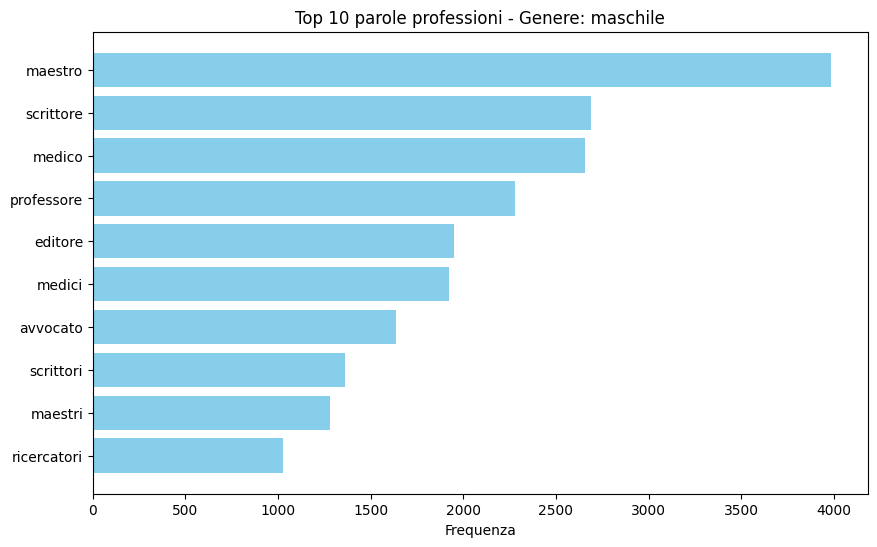

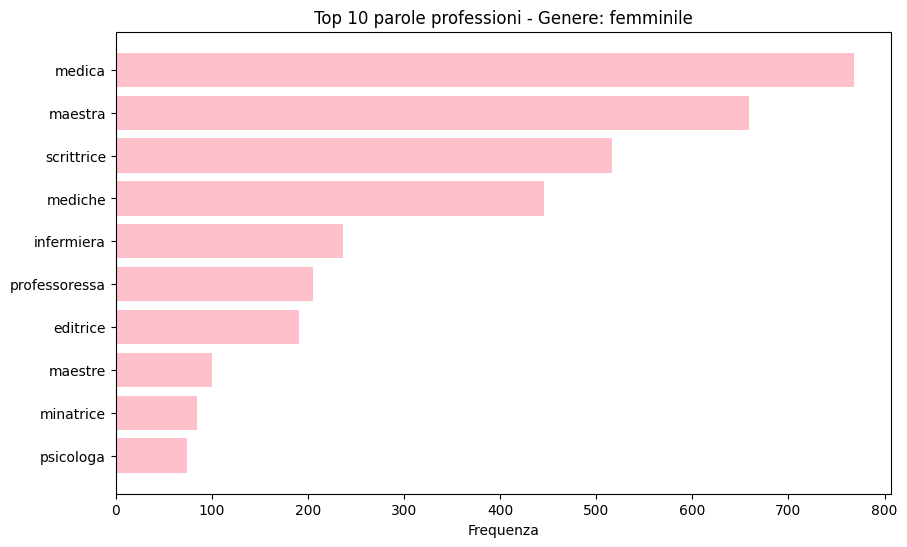

In [69]:
def plot_top_parole_conteggi(df, genere, top_n=10): #definisco una funzione per fare i grafici distinti per genere, in maniera da non dover riscrivere due volte il codice per entrambi i sessi
    conteggi_per_genere = mf.conta_professioni_per_genere(df) #Per ottenere il conteggio delle professioni per genere con la mia funzione
    
    top = conteggi_per_genere[genere].most_common(top_n) #Seleziono le professioni più frequenti per il genere specificato
    
    parole_top = [item[0] for item in top] #Estraggo le parole e i conteggi 
    counts = [item[1] for item in top]

    graf_top_paisa = plt.figure(figsize=(10,6))
    graf_top_parole_genere= plt.barh(parole_top[::-1], counts[::-1], color='skyblue' if genere == 'maschile' else 'pink') 
    plt.title(f'Top {top_n} parole professioni - Genere: {genere}')
    plt.xlabel('Frequenza')
    plt.show()

plot_top_parole_conteggi(paisa_analisi, 'maschile')
plot_top_parole_conteggi(paisa_analisi, 'femminile')


Dal grafico si può vedere chiaramente la distribuzione delle parole delle professioni in analisi, divise per genere grammaticale: paradossalmente le parole più frequenti, sia per il maschile che per il femminile sono inerenti al settore dell'istruzione e della sanità (nonostante nel dataset istat erano settori prevalentemente a occupazione femminile).

### Grafico per tutte le parole divise per maschili e femminili

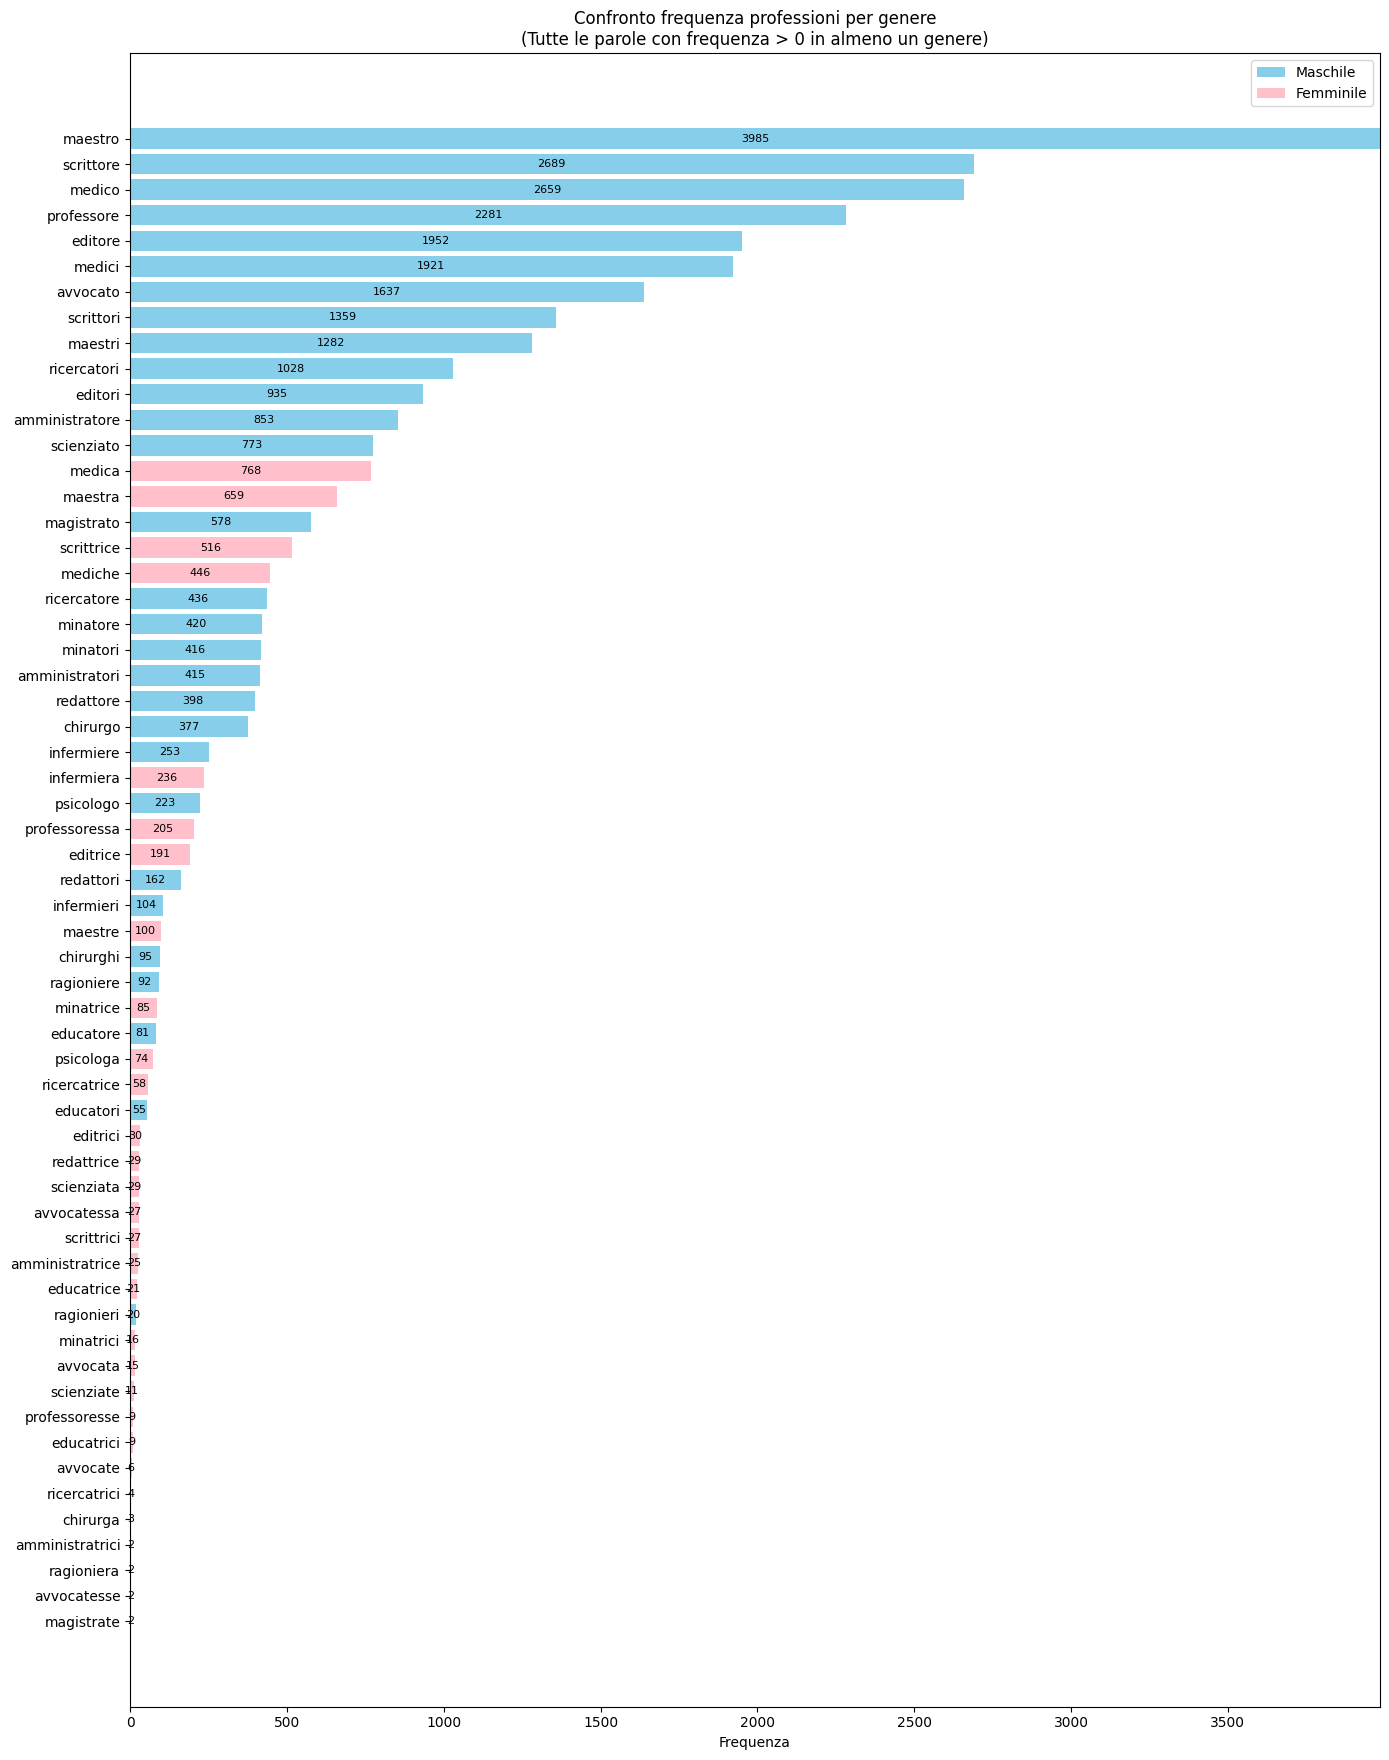

In [70]:
conteggi_per_genere = mf.conta_professioni_per_genere(paisa_analisi) # Ottengo i conteggi delle professioni per genere dal dataframe

tutte_parole = set() #Creo un insieme di tutte le professioni trovate in almeno un genere
for parola in conteggi_per_genere['maschile']:
    tutte_parole.add(parola)
for parola in conteggi_per_genere['femminile']:
    tutte_parole.add(parola)

parole_ordinate = [] #Costruisco una lista di tuple, per conteggi aggregati
for parola in tutte_parole:
    if parola in conteggi_per_genere['maschile']:   #Recupero il conteggio per genere maschile, se non presente assegno 0
        m_count = conteggi_per_genere['maschile'][parola]
    else:
        m_count = 0
    
    if parola in conteggi_per_genere['femminile']: #Recupero il conteggio per genere femminile, se non presente assegno 0
        f_count = conteggi_per_genere['femminile'][parola]
    else:
        f_count = 0
    
    totale = m_count + f_count  #Calcolo il totale delle occorrenze nei due generi
    
    if totale > 0:  #Se il totale è maggiore di 0 in almeno uno dei due generi, aggiungo la parola
        parole_ordinate.append((parola, {'maschile': m_count, 'femminile': f_count}))

for i in range(len(parole_ordinate)): #Ordino la lista in base alla frequenza totale (decrescente)
    for j in range(i+1, len(parole_ordinate)):
        tot_i = parole_ordinate[i][1]['maschile'] + parole_ordinate[i][1]['femminile']
        tot_j = parole_ordinate[j][1]['maschile'] + parole_ordinate[j][1]['femminile']
        if tot_j > tot_i:
            parole_ordinate[i], parole_ordinate[j] = parole_ordinate[j], parole_ordinate[i]

nomi_professioni = []  #Preparo liste separate per parole e conteggi da usare nel grafico
maschile_counts = []
femminile_counts = []
for p in parole_ordinate:
    nomi_professioni.append(p[0]) #nome della professione
    maschile_counts.append(p[1]['maschile'])
    femminile_counts.append(p[1]['femminile'])

genere_prof = range(len(nomi_professioni)) #creo sequenza numerica per posizioni asse y

plt.figure(figsize=(14, max(6, len(nomi_professioni)*0.3)))
graf_paisa_professioni_maschili = plt.barh(genere_prof, maschile_counts, color='skyblue', label='Maschile')  #grafico a barre orizzontali impilate: maschile_count in azzurro, femminile_counts in rosa
graf_paisa_professioni_femminili = plt.barh(genere_prof, femminile_counts, left=maschile_counts, color='pink', label='Femminile')
plt.yticks(genere_prof, nomi_professioni)
plt.xlabel('Frequenza')
plt.title('Confronto frequenza professioni per genere\n(Tutte le parole con frequenza > 0 in almeno un genere)')
plt.legend()

ax = plt.gca() #aggiungo le etichette del grafico
for i in genere_prof:
    if maschile_counts[i] > 0:
        ax.text(maschile_counts[i]/2, i, str(maschile_counts[i]), va='center', ha='center', color='black', fontsize=8) #conteggi maschili centrati nella prima metà della barra
    if femminile_counts[i] > 0:
        ax.text(maschile_counts[i] + femminile_counts[i]/2, i, str(femminile_counts[i]), va='center', ha='center', color='black', fontsize=8) #conteggi femminili nella parte rosa

plt.gca().invert_yaxis() #per mettere le professioni più frequenti in alto
plt.tight_layout()
plt.show()


Dal grafico si nota come le parole più frequenti siano al maschile, solo dopo ben 14 posizioni arriva una parola ad 'alta frequenza' femminile.
Un risultato che merita una menzione è la parola più frequente per genere, che è stato inaspettato: **maestro** per il maschile e **medica** per il femminile (mi aspettavo un risultato diverso). Essendo più prettamente "femminili" i settori come *Sanità e assistenza sociale* e *Istruzione*, si osserva chiaramente come il genere maschile sia sovrageneralizzato nel linguaggio. 

## 2c) Conteggio delle occorrenze per genere nei settori

Successivamente, viene eseguito un conteggio delle occorrenze **maschili** e **femminili** in ciascun settore:
Già i settori sono stati estratti insieme alle professioni e, inseriti in una colonna specifica: **settori_estratti**.

- Si utilizza la funzione `conta_settori_per_genere()`, per ottenere un dizionario in cui, per ogni settore, sono riportati i conteggi divisi per genere.

Per ogni settore:
- Si estraggono i conteggi maschili e femminili.
- I valori vengono stampati e aggiunti alle rispettive liste.

Così possiamo ottenere una **distribuzione di genere per settore lavorativo** in base alle parole estratte dal corpus.


In [71]:
paisa_analisi['settori_estratti']

0        [ISTRUZIONE, SANITÀ E ASSISTENZA SOCIALE]
1                                               []
2                                               []
3                                               []
4                                               []
                           ...                    
77513                                           []
77514                                           []
77515                                           []
77516                                           []
77517                                           []
Name: settori_estratti, Length: 77518, dtype: object

In [72]:
conteggi_settori = mf.conta_settori_per_genere(paisa_analisi) #conto occorrenze in base al genere in ciascun settore

settori = [] #creo liste per salvare i risultati: le userò per il df riassuntivo di queste analisi settoriali
maschili = []
femminili = []

print("Occorrenze per settore:\n")

for settore, counts in conteggi_settori.items():  #ciclo su ogni settore di conteggi_settori
    m = counts['maschile'] 
    f = counts['femminile']
    
    print(f"{settore}: Maschile = {m}, Femminile = {f}")
    
    settori.append(settore) #salvo i risultati nelle liste
    maschili.append(m)
    femminili.append(f)

Occorrenze per settore:

ISTRUZIONE: Maschile = 4355, Femminile = 611
SANITÀ E ASSISTENZA SOCIALE: Maschile = 2867, Femminile = 746
ATTIVITÀ LEGALI E CONTABILITÀ: Maschile = 1506, Femminile = 94
ATTIVITÀ EDITORIALI: Maschile = 4044, Femminile = 458
RICERCA SCIENTIFICA E SVILUPPO: Maschile = 1456, Femminile = 108
ESTRAZIONE DI MINERALI DA CAVE E MINIERE: Maschile = 619, Femminile = 73
ATTIVITÀ IMMOBILIARI: Maschile = 878, Femminile = 34


## Percentuali

Ora per gli stessi valori, calcolo la percentuale di occorrenza della parole nel corpus, distinguendo tra maschile e femminile

In [73]:
maschile_perc = [] #creo liste per salvare i risultati
femminile_perc = []

print("Percentuali per settore:")

for i in range(len(settori)): #ciclo su ogni settore tramite l'indice
    m = maschili[i] #numero occorrenze maschili per settore i
    f = femminili[i]
    totale = m + f #totale occorrenze per quel settore
    if totale > 0: #se il totale è maggiore di 0, procedo a calcolare le percentuali
        perc_m = round(m / totale * 100, 2)
        perc_f = round(f / totale * 100, 2)
    else:
        perc_m = perc_f = 0.0
    
    print(f"{settori[i]}: Maschile {perc_m:.2f}%, Femminile {perc_f:.2f}%") #stampo i risultati
    
    maschile_perc.append(perc_m) #salvo i risultati sulle liste
    femminile_perc.append(perc_f)


Percentuali per settore:
ISTRUZIONE: Maschile 87.70%, Femminile 12.30%
SANITÀ E ASSISTENZA SOCIALE: Maschile 79.35%, Femminile 20.65%
ATTIVITÀ LEGALI E CONTABILITÀ: Maschile 94.12%, Femminile 5.88%
ATTIVITÀ EDITORIALI: Maschile 89.83%, Femminile 10.17%
RICERCA SCIENTIFICA E SVILUPPO: Maschile 93.09%, Femminile 6.91%
ESTRAZIONE DI MINERALI DA CAVE E MINIERE: Maschile 89.45%, Femminile 10.55%
ATTIVITÀ IMMOBILIARI: Maschile 96.27%, Femminile 3.73%


### Risultati

Si nota chiaramente come a livello linguistico, il maschile predomina sul femminile, riportando percentuali anche elevatissime, come in **Attività immobiliari** e **Attività legali e contabilità**, che vede una percentuale di parole maschili superiori al 95%.
Anche per settori come **Santità e assintenza sociale** e **Istruzione** la prevalenza dei maschili rimane netta

Creo un df nuovo per salvare tutte queste analisi con le parole di paisa riferite ai settori, in modo che sia comparabile con i dati ricavati da istat, che presentano soltanto i settori e, non le singole professioni.

In [74]:
df_paisa_analisi_settori = pd.DataFrame({  #creo un df riassuntivo per queste analisi
    'Settore': settori,
    'Maschile': maschili,
    'Femminile': femminili,
    'Percentuale Maschile': maschile_perc,
    'Percentuale Femminile': femminile_perc
})

df_paisa_analisi_settori

Settore  Maschile  Femminile  \
0                                ISTRUZIONE      4355        611   
1               SANITÀ E ASSISTENZA SOCIALE      2867        746   
2             ATTIVITÀ LEGALI E CONTABILITÀ      1506         94   
3                       ATTIVITÀ EDITORIALI      4044        458   
4            RICERCA SCIENTIFICA E SVILUPPO      1456        108   
5  ESTRAZIONE DI MINERALI DA CAVE E MINIERE       619         73   
6                      ATTIVITÀ IMMOBILIARI       878         34   

   Percentuale Maschile  Percentuale Femminile  
0                 87.70                  12.30  
1                 79.35                  20.65  
2                 94.12                   5.88  
3                 89.83                  10.17  
4                 93.09                   6.91  
5                 89.45                  10.55  
6                 96.27                   3.73

### Grafico per visualizzare questi risultati

Grafico a barre in cui metto in relazione le percentuali dei maschili e femminili riscontrati nel testo per settore, per evidenziare la disparità di genere.

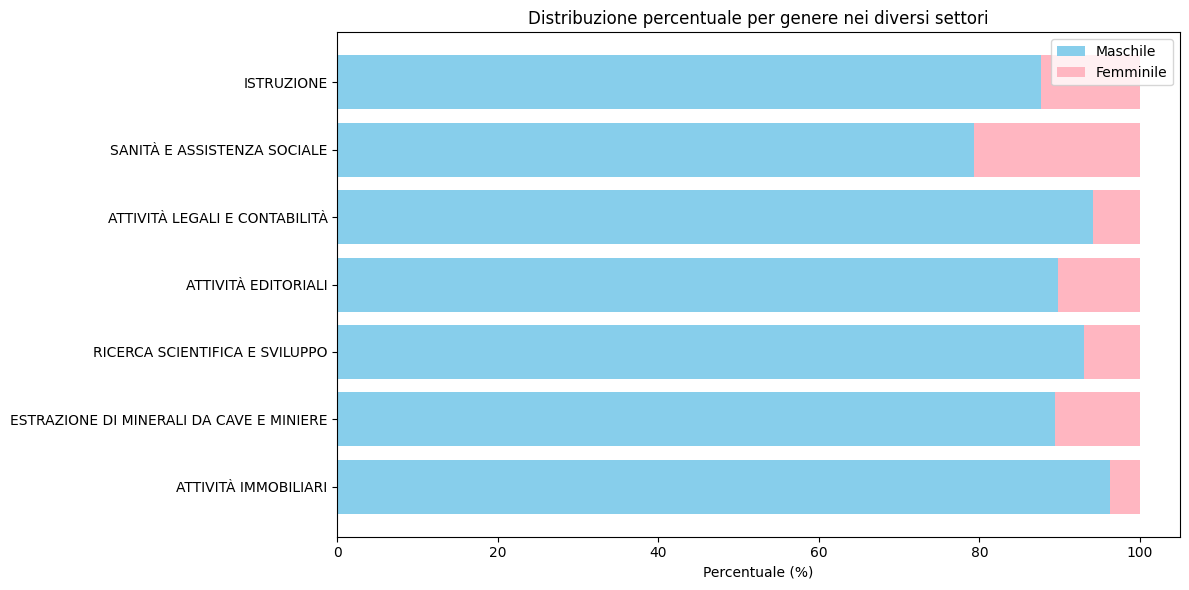

In [75]:
y_pos = range(len(df_paisa_analisi_settori)) #Posizioni sull'asse Y in base alla lunghezza del DataFrame

plt.figure(figsize=(12, max(6, len(df_paisa_analisi_settori)*0.5)))

graf_paisa_settori_maschili = plt.barh( #Barre per percentuale maschile
    y_pos,
    df_paisa_analisi_settori['Percentuale Maschile'],
    color='skyblue',
    label='Maschile'
)

graf_paisa_settori_femminili = plt.barh( #Barre per percentuale femminile, partendo da dove finisce quella maschile
    y_pos,
    df_paisa_analisi_settori['Percentuale Femminile'],
    left=df_paisa_analisi_settori['Percentuale Maschile'],
    color='lightpink',
    label='Femminile'
)

#Etichette Y sono nomi dei settori
plt.yticks(y_pos, df_paisa_analisi_settori['Settore'])

plt.xlabel('Percentuale (%)')
plt.title('Distribuzione percentuale per genere nei diversi settori')
plt.legend()
plt.gca().invert_yaxis()  #Inverte l’asse Y per avere i settori dall’alto verso il basso
plt.tight_layout()
plt.show()


### Interpretazione

Questo grafico e analisi permette di cogliere rapidamente quali settori presentano squilibri di genere più marcati: in nessun settore troviamo un gap a favore dei femminili! In alcuni casi, come per \emph{Attività legali} e \emph{Attività immobiliari} emerge un gap del 95\% a favore dei maschili! Questo è un risultato importante, in quanto mostra quanto il genere femminile sia sottorappresentato nei linguaggio settoriali del lavoro.

In [76]:
df_paisa_analisi_settori

Settore  Maschile  Femminile  \
0                                ISTRUZIONE      4355        611   
1               SANITÀ E ASSISTENZA SOCIALE      2867        746   
2             ATTIVITÀ LEGALI E CONTABILITÀ      1506         94   
3                       ATTIVITÀ EDITORIALI      4044        458   
4            RICERCA SCIENTIFICA E SVILUPPO      1456        108   
5  ESTRAZIONE DI MINERALI DA CAVE E MINIERE       619         73   
6                      ATTIVITÀ IMMOBILIARI       878         34   

   Percentuale Maschile  Percentuale Femminile  
0                 87.70                  12.30  
1                 79.35                  20.65  
2                 94.12                   5.88  
3                 89.83                  10.17  
4                 93.09                   6.91  
5                 89.45                  10.55  
6                 96.27                   3.73

## Calcolo del Gender Gap

Calcolo per il gender gap: percentuale maschile - percentuale femmminile delle parole estratte.

In [77]:
# Calcolo il gender gap sottraendo la percentuale femminile da quella maschile
df_paisa_analisi_settori['Gender Gap'] = df_paisa_analisi_settori['Percentuale Maschile'] - df_paisa_analisi_settori['Percentuale Femminile']

df_paisa_analisi_settori


Settore  Maschile  Femminile  \
0                                ISTRUZIONE      4355        611   
1               SANITÀ E ASSISTENZA SOCIALE      2867        746   
2             ATTIVITÀ LEGALI E CONTABILITÀ      1506         94   
3                       ATTIVITÀ EDITORIALI      4044        458   
4            RICERCA SCIENTIFICA E SVILUPPO      1456        108   
5  ESTRAZIONE DI MINERALI DA CAVE E MINIERE       619         73   
6                      ATTIVITÀ IMMOBILIARI       878         34   

   Percentuale Maschile  Percentuale Femminile  Gender Gap  
0                 87.70                  12.30       75.40  
1                 79.35                  20.65       58.70  
2                 94.12                   5.88       88.24  
3                 89.83                  10.17       79.66  
4                 93.09                   6.91       86.18  
5                 89.45                  10.55       78.90  
6                 96.27                   3.73       92.54

Tutte le parole, per i settori hanno netta prevalenza del genere grammaticale maschile! Neanche un settore ha prevalenza femminile.

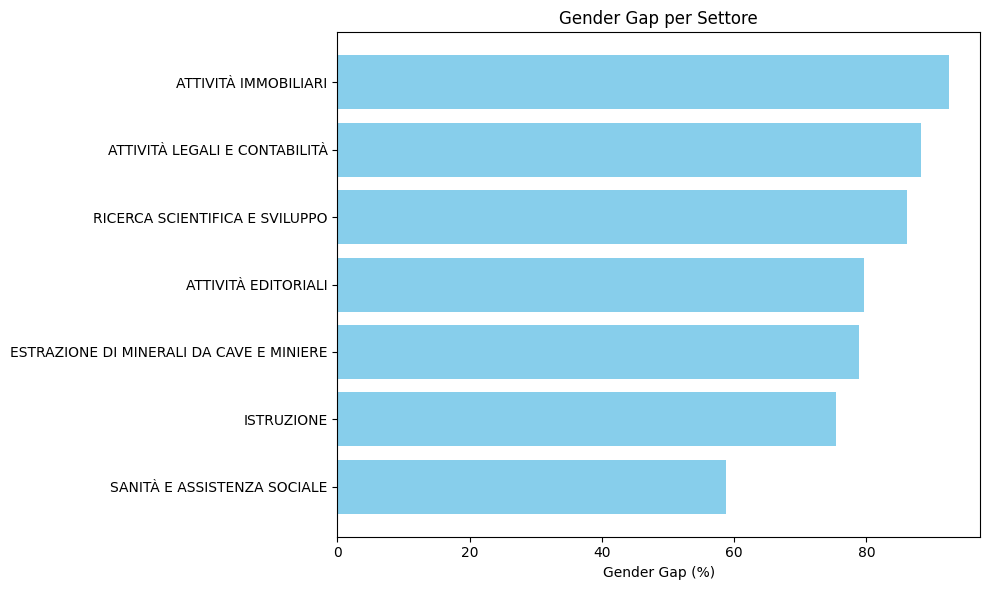

In [78]:
df_gap_sorted = df_paisa_analisi_settori.sort_values(by='Gender Gap') #ordino in un nuovo df in base al Gender Gap


plt.figure(figsize=(10,6)) #imposto la figura

colori = [] #lista dei colori
for valore in df_gap_sorted['Gender Gap']: #assegno i colori in base alla direzione del gap (più per completezza del codice, perché nessun gender gap è a favore femminile, quindi negativo, ma, al contrario, sono tutti maschili!)
    if valore > 0:
        colori.append('skyblue')
    else:
        colori.append('lightcoral')

graf_gap_paisa_settore = plt.barh(df_gap_sorted['Settore'],
                                  df_gap_sorted['Gender Gap'],
                                  color=colori)

plt.xlabel('Gender Gap (%)')
plt.title('Gender Gap per Settore')
plt.tight_layout()
plt.show()

In [79]:
df_paisa_analisi_settori.to_csv("output_progetto/analisi_paisa/df_paisa_analisi_settori.csv", index=False) #salvo il mio file

## 2d) Analisi degli URL

A partire dalle **professioni** estratte, analizzo in quali categorie di url sono più ricorrenti, distinguendo per maschile e femminile.

In [80]:
conteggi_professioni_per_urlcat = {}
parole_da_controllare = sorted(set(tutte_professioni))  #variabile creata precedentemente con Counter, per contare tutte le professioni, senza dividerle per genere grammaticale

for i in range(len(paisa_analisi)): #ciclo su ogni riga del df
    if paisa_analisi.at[i, 'url_sospetto']:  #Se url è segnato come sospetto, continua
        continue
    
    prof_list = paisa_analisi.at[i, 'professioni_estratte'] #estraggo lista delle professioni 
    categoria = paisa_analisi.at[i, 'url_categoria'] #estraggo categoria url per la riga corrente
    
    if not isinstance(prof_list, list): #se professione non è una lista, salta
        continue
    
    for prof in prof_list: #ciclo su tutte le professioni trovate
        p = prof 
        
        if p not in conteggi_professioni_per_urlcat: #se la professione non è nel dizionario, inizializzo
            conteggi_professioni_per_urlcat[p] = {}
        if categoria not in conteggi_professioni_per_urlcat[p]:
            conteggi_professioni_per_urlcat[p][categoria] = 0
        
        conteggi_professioni_per_urlcat[p][categoria] += 1 #incremento il conteggio per professione e categoria
        
for parola in sorted(parole_da_controllare):  #Ordino alfabeticamente le parole da controllare
    print(f"\nDistribuzione per '{parola}':") #stampo la parola da controllare (professione)
    
    if parola in conteggi_professioni_per_urlcat: 
        for cat, count in conteggi_professioni_per_urlcat[parola].items(): #per ogni professione controlla la categoria
            print(f"  {cat}: {count}") #stampa la catgoria e il conteggio


Distribuzione per 'amministratore':
  altro: 94
  wikipedia: 562
  blog: 126
  forum: 46
  news: 25

Distribuzione per 'amministratori':
  wikipedia: 212
  blog: 48
  forum: 50
  altro: 98
  news: 6
  blog_femminili: 1

Distribuzione per 'amministratrice':
  blog: 3
  wikipedia: 18
  forum: 3
  news: 1

Distribuzione per 'amministratrici':
  wikipedia: 1
  forum: 1

Distribuzione per 'avvocata':
  forum: 3
  wikipedia: 12

Distribuzione per 'avvocate':
  forum: 6

Distribuzione per 'avvocatessa':
  wikipedia: 16
  blog: 11

Distribuzione per 'avvocatesse':
  forum: 1
  wikipedia: 1

Distribuzione per 'avvocati':
  blog: 166
  wikipedia: 242
  forum: 81
  altro: 73
  news: 28

Distribuzione per 'avvocato':
  wikipedia: 958
  altro: 157
  blog: 341
  forum: 150
  news: 31

Distribuzione per 'chirurga':
  blog: 3

Distribuzione per 'chirurghi':
  altro: 6
  wikipedia: 65
  blog: 15
  forum: 4
  blog_femminili: 1
  news: 4

Distribuzione per 'chirurgo':
  wikipedia: 286
  blog: 47
  news:

### Intepretazione

Emerge chiaramente come il genere maschile sia nettamente prevalente rispetto a quello femminile, non solo nel linguaggio ma anche nelle fonti web analizzate. Le professioni al femminile sono infatti maggiormente presenti in categorie come Wikipedia, forum o blog dedicati prevalentemente al pubblico femminile, mentre le forme maschili dominano nettamente nelle categorie di news e siti di informazione.
Questa evidenza conferma la persistenza di uno squilibrio nell’uso e nella rappresentazione linguistica delle professioni, con un predominio quasi esclusivo del maschile in molti ambiti, anche digitali.

Questo risultato risalta la netta prevalenza e, quasi totalità per alcuni settori dell'uso del maschile a discapito del femminile.


## 3) ANALISI COMPARATIVA ISTAT-PAISA

In questa utlima sezione, si compareranno i risultati ottenuto dal corpus **PAISA**, con i risultati ottenuti dal dataset **ISTAT**.
Per prima cosa creo un nuovo DataFrame con i dati utili, comprendendo risultati di entrambe le analisi, per avere una visione chiara di ciò che abbiamo ottenuto. Poi, successivamente, si realizzeranno le visualizzazioni grafiche.

### Confronto tra Gender Gap ISTAT e PAISA

Per confrontare i dati ufficiali ISTAT con quelli linguistici estratti dal corpus PAISA, sono stati uniti i due DataFrame contenenti le statistiche settoriali. Prima di eseguire l'operazione di merge, è stato necessario rinominare le colonne per coerenza.
Successivamente è stato eseguito un `merge` sui settori, mantenendo per ciascuno:

- la macroarea di riferimento;
- l'anno;
- il gender gap ISTAT;
- le percentuali e i conteggi delle occorrenze maschili e femminili trovate nel corpus PAISA.

Il risultato è il DataFrame `comparazione_gender_gap_istat_paisa_italia`, che verrà successivamente utilizzato per le realizzazioni grafiche dei dati.


In [81]:
df_gender_gap_2017_italia_renamed = df_gender_gap_2017_italia.rename(columns={ #Rinomino le colonne in df_gender_gap_2017_italia per uniformità
    'Settore di lavoro': 'Settore',
    '% Maschi (settore)': '% Maschi (istat)',
    '% Femmine (settore)': '% Femmine (istat)',
    'Gender Gap (settore)': 'Gender Gap ISTAT'
})

df_paisa_analisi_settori_renamed = df_paisa_analisi_settori.rename(columns={ #Rinomino la colonna 'Gender Gap' in df_paisa_analisi_settori
    'Gender Gap': 'Gender Gap PAISA',
    'Percentuale Maschile': '% Maschili (paisa)',
    'Percentuale Femminile' : '% Femminili (paisa)'
}) 



comparazione_gender_gap_istat_paisa_italia = pd.merge( #Faccio il merge sui settori
    df_gender_gap_2017_italia_renamed,
    df_paisa_analisi_settori_renamed,
    on='Settore'
)

comparazione_gender_gap_istat_paisa_italia = comparazione_gender_gap_istat_paisa_italia[  #Seleziono solo le colonne che voglio includere
    ['Anno', 'Macroarea', 'Settore', '% Maschi (istat)', '% Femmine (istat)', 'Gender Gap ISTAT','% Maschili (paisa)', '% Femminili (paisa)', 'Gender Gap PAISA']]

comparazione_gender_gap_istat_paisa_italia


Anno Macroarea                                   Settore  % Maschi (istat)  \
0  2017    Italia               SANITÀ E ASSISTENZA SOCIALE             31.98   
1  2017    Italia             ATTIVITÀ LEGALI E CONTABILITÀ             45.00   
2  2017    Italia                      ATTIVITÀ IMMOBILIARI             59.96   
3  2017    Italia                                ISTRUZIONE             36.45   
4  2017    Italia                       ATTIVITÀ EDITORIALI             50.79   
5  2017    Italia  ESTRAZIONE DI MINERALI DA CAVE E MINIERE             82.23   
6  2017    Italia            RICERCA SCIENTIFICA E SVILUPPO             57.80   

   % Femmine (istat)  Gender Gap ISTAT  % Maschili (paisa)  \
0              68.02            -36.04               79.35   
1              55.00            -10.00               94.12   
2              40.04             19.92               96.27   
3              63.55            -27.10               87.70   
4              49.21              1.58               89.83   
5              17.77             64.46               89.45   
6              42.20             15.60               93.09   

   % Femminili (paisa)  Gender Gap PAISA  
0                20.65             58.70  
1                 5.88             88.24  
2                 3.73             92.54  
3                12.30             75.40  
4                10.17             79.66  
5                10.55             78.90  
6                 6.91             86.18

In [82]:
comparazione_gender_gap_istat_paisa_italia.to_csv("output_progetto/analisi_comparative/comparazione_gender_gap_istat_paisa_italia.csv", index=False)

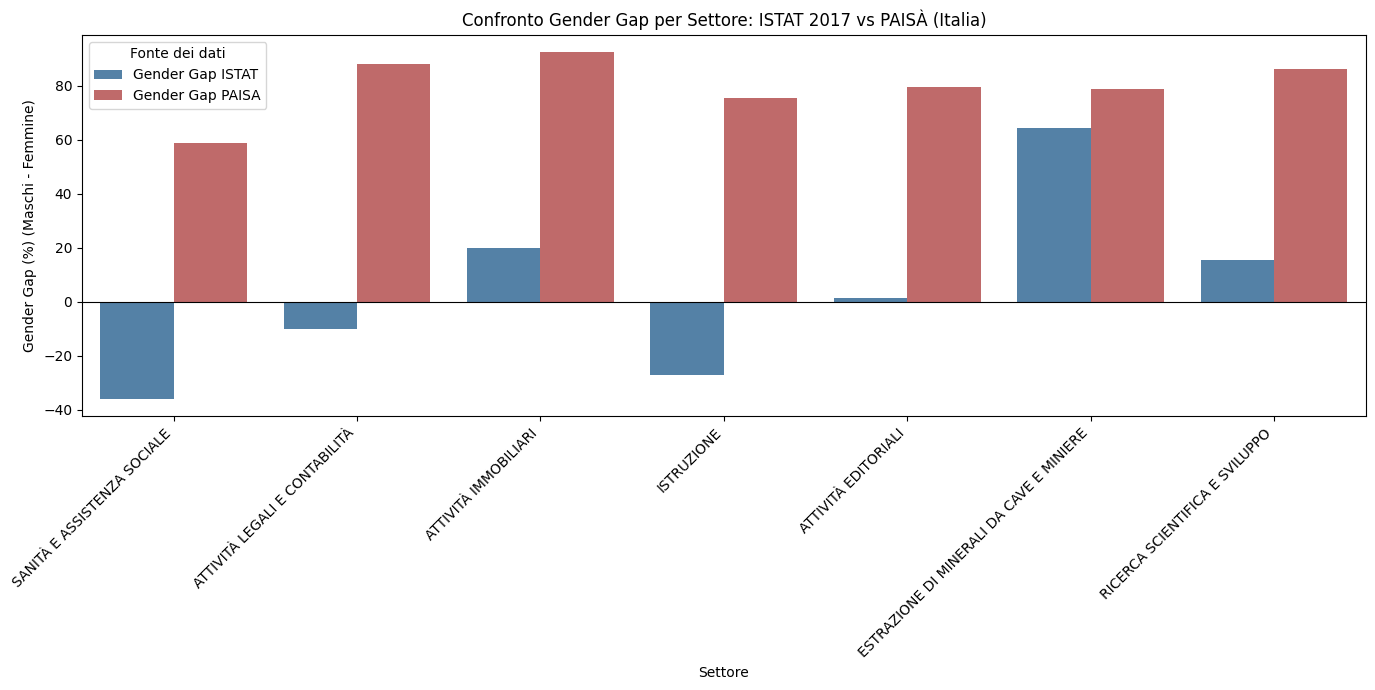

In [83]:
df_comparazione_italia_melt = comparazione_gender_gap_istat_paisa_italia.melt( #Faccio melt in maniera tale che i dati gender gap sia di ISTAT che di PAISA siano in un'unica colonna
    id_vars=['Settore'],  #colonna che identifica il settore
    value_vars=['Gender Gap ISTAT', 'Gender Gap PAISA'], #colonne da unire
    var_name='Fonte dei dati', #nome della nuova colonna
    value_name='Gender Gap' #Nome della nuova colonna che contiene i valori
)

plt.figure(figsize=(14,7))
graf_comparazione_istat_paisa_italia = sns.barplot(data=df_comparazione_italia_melt, #creo grafico a barre
            x='Settore', 
            y='Gender Gap', 
            hue='Fonte dei dati', 
            palette=['steelblue', 'indianred'])

plt.xticks(rotation=45, ha='right') 
plt.axhline(0, color='black', linewidth=0.8) #aggiungo linea orizzontale su y=0 in maniera da aver ben diviso il grafico
plt.ylabel('Gender Gap (%) (Maschi - Femmine)')
plt.title('Confronto Gender Gap per Settore: ISTAT 2017 vs PAISÀ (Italia)')
plt.tight_layout()
plt.legend(title='Fonte dei dati')
plt.show()

### Interpretazione

Dal grafico emergono alcune osservazioni significative: nonostante il gender gap di paisa sia solo a favore dei maschili, per i settori a forte prevalenza maschile come **Estrazione di minerali da cave e miniere**, il gap di paisa e di istat quasi si equivalgono; mentre per i settori più prettamente femminili come **Sanità e assistenza sociale** e **Istruzione**, mostra un gap paisa sempre a favore dei maschili, ma con una percentuale più bassa.
Nel complesso, i dati suggeriscono che il linguaggio tende a riflettere parzialmente le disuguaglianze di genere presenti nel mercato occupazionale, ma in modo distorto, con una **sovrarappresentazione linguistica maschile anche in ambiti femminili**.

## Confronto Gender Gap ISTAT-PAISA (macroaree)

Ora procediamo a fare l'analisi, seguendo la precedente logica, con i dati inerenti alle macroaree. 
Per prima cosa rinomino le colonne di df_gender_gap_2017_macroaree, in maniera da uniformare i nomi delle colonne. 
Successivamente faccio un merge sui settori, in quanto il corpus paisa non distingue per macroarea.
Infine, come per l'analisi precedente, faccio un grafico a barre, per ogni macroarea, in maniera tale da visualizzare i divari di gap tra i dati del dataset ISTAT e del corpus PAISA.

In [84]:
paisa_gap = comparazione_gender_gap_istat_paisa_italia[['Settore', '% Maschili (paisa)', '% Femminili (paisa)', 'Gender Gap PAISA']]

istat_macroaree = df_gender_gap_2017_macroaree.rename(columns={'% Maschi': '% Maschi (istat)', '% Femmine':'% Femmine (istat)', 'Gap %': 'Gender Gap ISTAT', 'Settore di lavoro': 'Settore'})

comparazione_gender_gap_macroaree = istat_macroaree.merge(paisa_gap, on='Settore', how='left') #Faccio un merge senza macroarea, ma solo per settore, così paisa può avere valori per ogni macroarea

comparazione_gender_gap_macroaree

Anno   Macroarea                                   Settore  \
0   2017       Isole  ESTRAZIONE DI MINERALI DA CAVE E MINIERE   
1   2017         Sud  ESTRAZIONE DI MINERALI DA CAVE E MINIERE   
2   2017    Nord-est  ESTRAZIONE DI MINERALI DA CAVE E MINIERE   
3   2017  Nord-ovest  ESTRAZIONE DI MINERALI DA CAVE E MINIERE   
4   2017      Centro  ESTRAZIONE DI MINERALI DA CAVE E MINIERE   
5   2017       Isole                       ATTIVITÀ EDITORIALI   
6   2017         Sud                       ATTIVITÀ EDITORIALI   
7   2017       Isole                      ATTIVITÀ IMMOBILIARI   
8   2017         Sud                      ATTIVITÀ IMMOBILIARI   
9   2017    Nord-est                      ATTIVITÀ IMMOBILIARI   
10  2017    Nord-est            RICERCA SCIENTIFICA E SVILUPPO   
11  2017  Nord-ovest                      ATTIVITÀ IMMOBILIARI   
12  2017      Centro                      ATTIVITÀ IMMOBILIARI   
13  2017         Sud             ATTIVITÀ LEGALI E CONTABILITÀ   
14  2017         Sud            RICERCA SCIENTIFICA E SVILUPPO   
15  2017      Centro            RICERCA SCIENTIFICA E SVILUPPO   
16  2017  Nord-ovest            RICERCA SCIENTIFICA E SVILUPPO   
17  2017       Isole             ATTIVITÀ LEGALI E CONTABILITÀ   
18  2017    Nord-est                       ATTIVITÀ EDITORIALI   
19  2017       Isole            RICERCA SCIENTIFICA E SVILUPPO   
20  2017      Centro                       ATTIVITÀ EDITORIALI   
21  2017  Nord-ovest                       ATTIVITÀ EDITORIALI   
22  2017      Centro             ATTIVITÀ LEGALI E CONTABILITÀ   
23  2017    Nord-est                                ISTRUZIONE   
24  2017  Nord-ovest             ATTIVITÀ LEGALI E CONTABILITÀ   
25  2017         Sud               SANITÀ E ASSISTENZA SOCIALE   
26  2017  Nord-ovest                                ISTRUZIONE   
27  2017    Nord-est             ATTIVITÀ LEGALI E CONTABILITÀ   
28  2017       Isole               SANITÀ E ASSISTENZA SOCIALE   
29  2017       Isole                                ISTRUZIONE   
30  2017      Centro                                ISTRUZIONE   
31  2017         Sud                                ISTRUZIONE   
32  2017      Centro               SANITÀ E ASSISTENZA SOCIALE   
33  2017  Nord-ovest               SANITÀ E ASSISTENZA SOCIALE   
34  2017    Nord-est               SANITÀ E ASSISTENZA SOCIALE   

    % Maschi (istat)  % Femmine (istat)  Gender Gap ISTAT  % Maschili (paisa)  \
0              91.92               8.08             83.84               89.45   
1              91.49               8.51             82.98               89.45   
2              88.19              11.81             76.38               89.45   
3              86.64              13.36             73.28               89.45   
4              76.68              23.32             53.36               89.45   
5              64.59              35.41             29.18               89.83   
6              63.19              36.81             26.38               89.83   
7              62.19              37.81             24.38               96.27   
8              61.67              38.33             23.34               96.27   
9              60.95              39.05             21.90               96.27   
10             59.21              40.79             18.42               93.09   
11             59.11              40.89             18.22               96.27   
12             59.03              40.97             18.06               96.27   
13             58.33              41.67             16.66               94.12   
14             57.98              42.02             15.96               93.09   
15             57.87              42.13             15.74               93.09   
16             57.46              42.54             14.92               93.09   
17             52.68              47.32              5.36               94.12   
18             52.11              47.89              4.22               89.83   
19     

Per la visualizzazione del grafico, si segue la logica utilizzata per il grafico di Italia, ovvero facendo melt per avere una colonna unificata per Gender Gap Istat e Paisa, solo con un ciclo for per visualizzare un grafico per ogni macroarea.

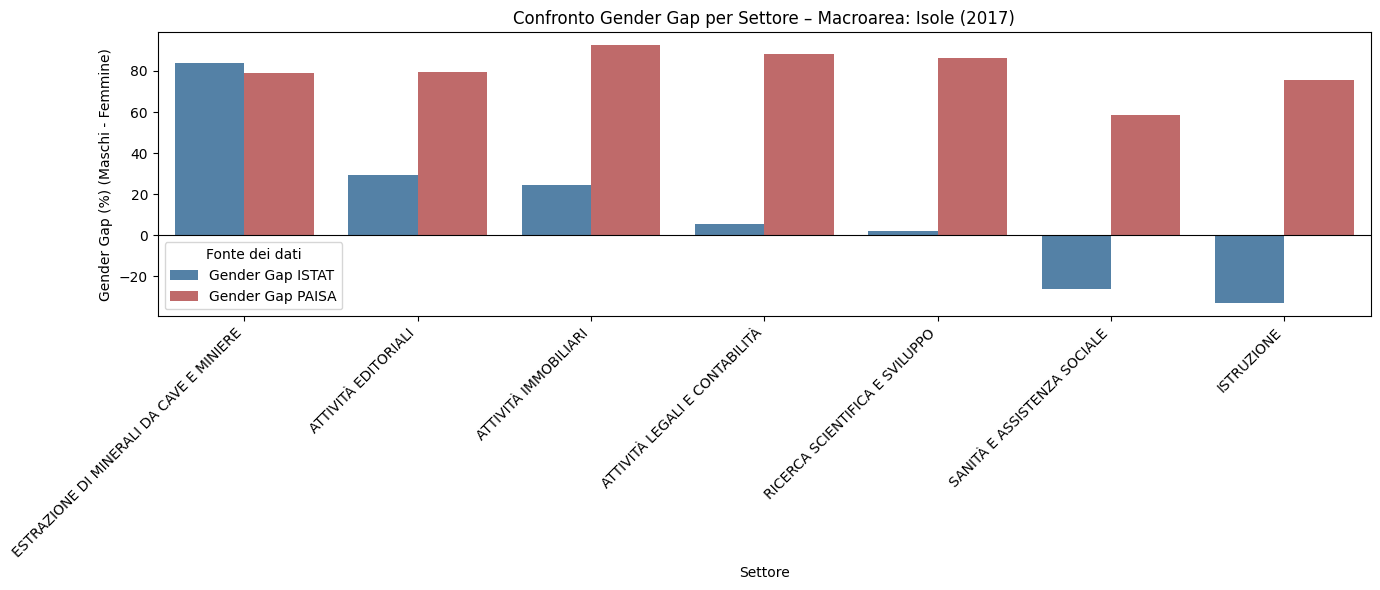

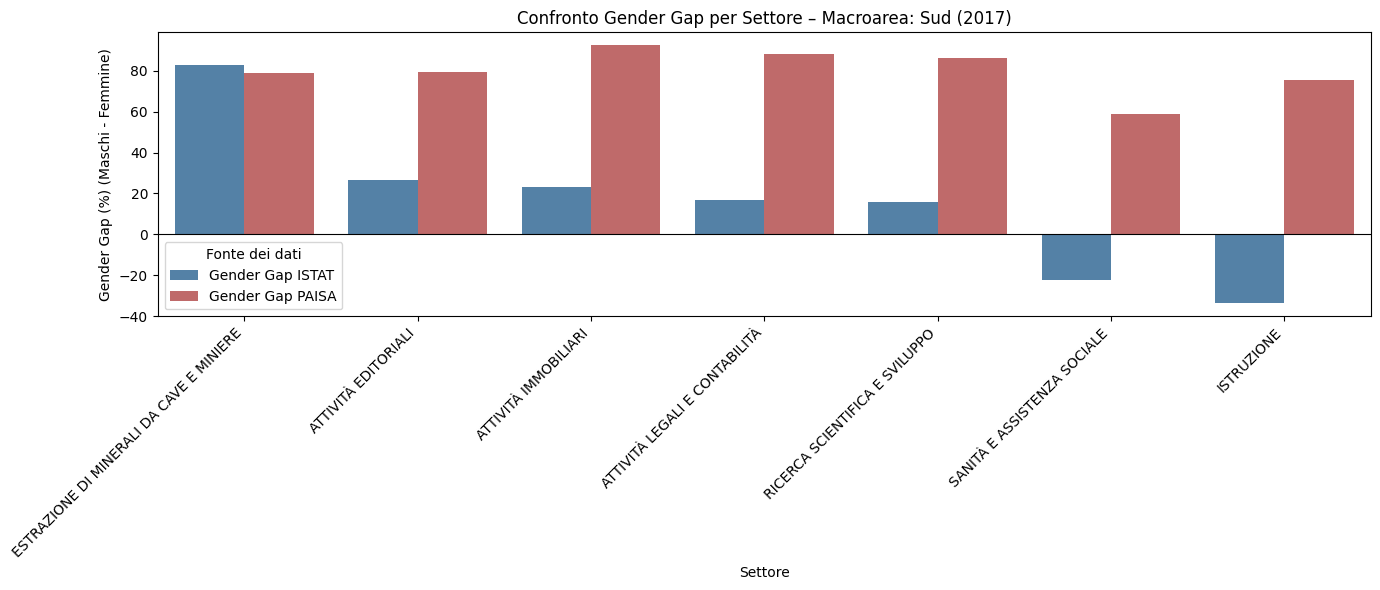

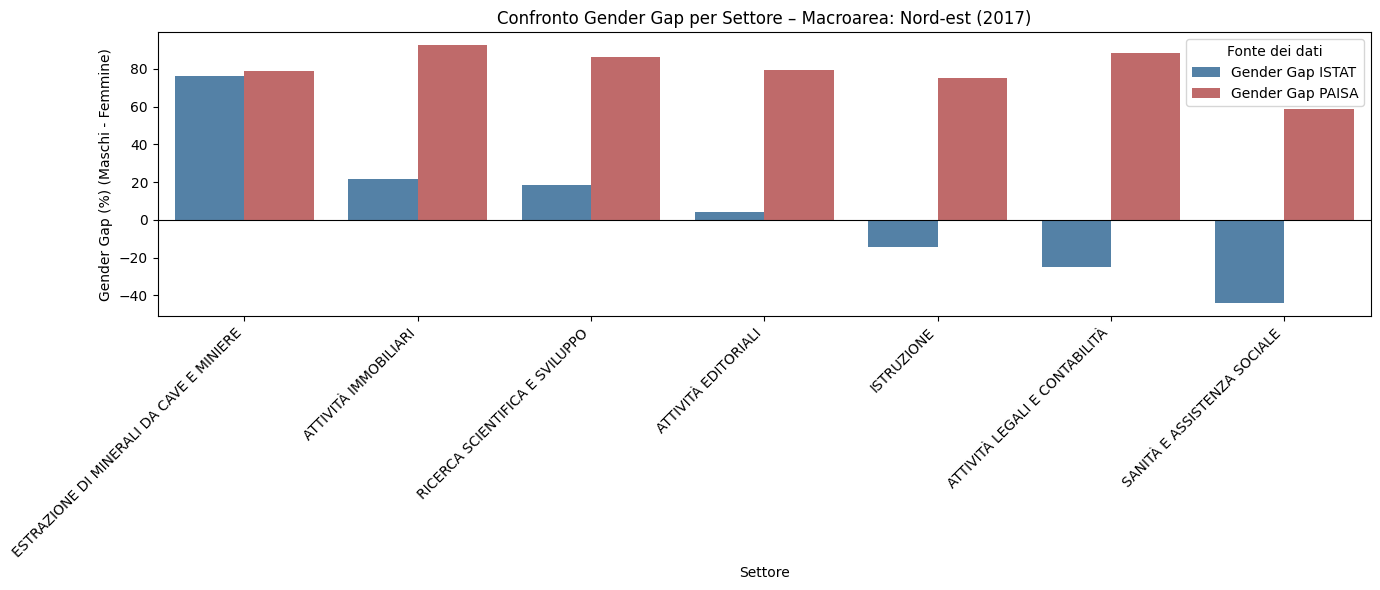

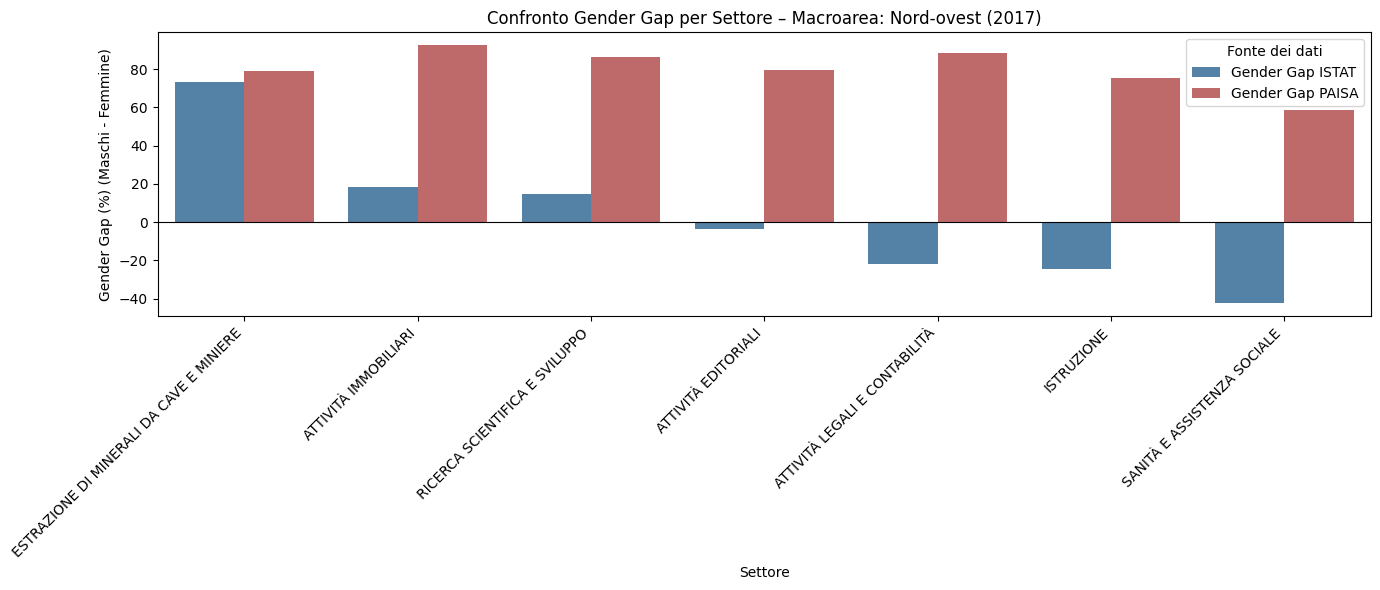

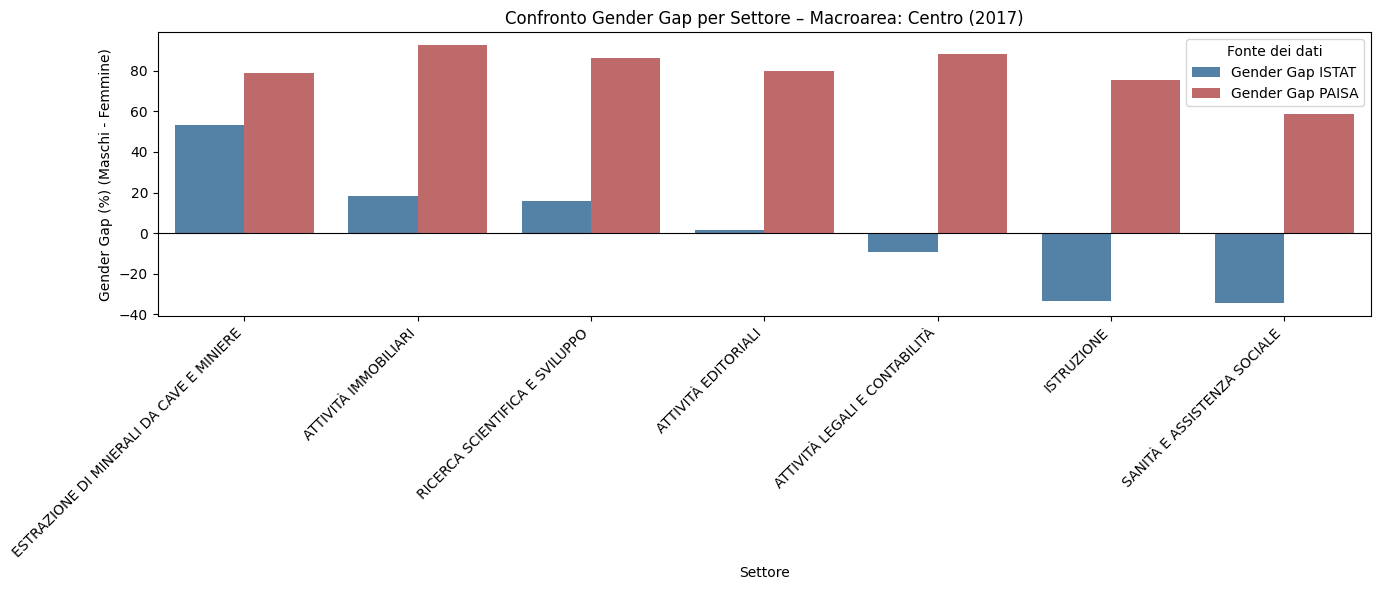

In [85]:
macroaree = comparazione_gender_gap_macroaree['Macroarea'].unique()

for macro in macroaree:
    dati = comparazione_gender_gap_macroaree[comparazione_gender_gap_macroaree['Macroarea'] == macro]

    df_melt_macro = dati.melt(  #melt per unire le 2 colonne separate dei gender gap in una unica
        id_vars=['Settore'],
        value_vars=['Gender Gap ISTAT', 'Gender Gap PAISA'],
        var_name='Fonte dei dati',
        value_name='Gender Gap'
    )

    plt.figure(figsize=(14,6))
    graf_macro_comparazione = sns.barplot(data=df_melt_macro,
                x='Settore',
                y='Gender Gap',
                hue='Fonte dei dati',
                palette=['steelblue', 'indianred'])

    plt.xticks(rotation=45, ha='right')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.ylabel('Gender Gap (%) (Maschi - Femmine)')
    plt.title(f'Confronto Gender Gap per Settore – Macroarea: {macro} (2017)')
    plt.tight_layout()
    plt.legend(title='Fonte dei dati')
    plt.show()


### Interpretazione

Confrontando i dati ISTAT e PAISA per ciascuna macroarea e settore, emergono evidenti discrepanze:

- **Costanza dei dati PAISA**: il Gender Gap linguistico non varia per macroarea ma solo per settore, perché PAISA è un corpus nazionale.

- Settori maschili come **Estrazione di minerali** sono ben rappresentati in PAISÀ, con un Gender Gap linguistico vicino a quello ISTAT.

- Settori femminili come **Istruzione** e **Sanità e assistenza sociale** risultano invece fortemente mascolinizzati nel linguaggio: per esempio, **Istruzione nel Sud**: *ISTAT* -33.80% (più donne); *PAISA*: +76.90% (più termini maschili).

- Soltanto nel settore **Estrazione di minerali da cave e miniere** il gender gap istat ha superato quello di paisa, nelle sole macroaree **Isole e Sud**.

In conclusione il corpus PAISA non riflette adeguatamente la presenza femminile nei settori dove le donne sono occupate in maggioranza, mostrando un bias linguistico a favore del maschile, indipendentemente dalla realtà statistica regionale o settoriale lavorativo.

## Analisi complessiva: Macroaree + Italia

Procedo ad unire i due dataframe, in maniera tale da avere una sintesi riassuntiva, che tiene conto di tutte le macroaree, non più analizzate singolarmente. 

In [86]:
df_italia = comparazione_gender_gap_istat_paisa_italia.copy()  #Preparo i dati inerenti all'Italia, copiando il df precedente, in modo da non intaccare i dati ordinati
df_italia = df_italia[['Macroarea', 'Settore', 'Anno', 'Gender Gap ISTAT', 'Gender Gap PAISA']]

df_macroaree = comparazione_gender_gap_macroaree[['Macroarea', 'Settore', 'Anno', 'Gender Gap ISTAT', 'Gender Gap PAISA']] #Prendo i dati per le macroaree, dal mio df

gender_gap_finale_istat_paisa = pd.concat( #Unisco i dati concatenando i df
    [df_italia, df_macroaree],
    ignore_index=True
)

gender_gap_finale_istat_paisa


Macroarea                                   Settore  Anno  \
0       Italia               SANITÀ E ASSISTENZA SOCIALE  2017   
1       Italia             ATTIVITÀ LEGALI E CONTABILITÀ  2017   
2       Italia                      ATTIVITÀ IMMOBILIARI  2017   
3       Italia                                ISTRUZIONE  2017   
4       Italia                       ATTIVITÀ EDITORIALI  2017   
5       Italia  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017   
6       Italia            RICERCA SCIENTIFICA E SVILUPPO  2017   
7        Isole  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017   
8          Sud  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017   
9     Nord-est  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017   
10  Nord-ovest  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017   
11      Centro  ESTRAZIONE DI MINERALI DA CAVE E MINIERE  2017   
12       Isole                       ATTIVITÀ EDITORIALI  2017   
13         Sud                       ATTIVITÀ EDITORIALI  2017   
14       Isole                      ATTIVITÀ IMMOBILIARI  2017   
15         Sud                      ATTIVITÀ IMMOBILIARI  2017   
16    Nord-est                      ATTIVITÀ IMMOBILIARI  2017   
17    Nord-est            RICERCA SCIENTIFICA E SVILUPPO  2017   
18  Nord-ovest                      ATTIVITÀ IMMOBILIARI  2017   
19      Centro                      ATTIVITÀ IMMOBILIARI  2017   
20         Sud             ATTIVITÀ LEGALI E CONTABILITÀ  2017   
21         Sud            RICERCA SCIENTIFICA E SVILUPPO  2017   
22      Centro            RICERCA SCIENTIFICA E SVILUPPO  2017   
23  Nord-ovest            RICERCA SCIENTIFICA E SVILUPPO  2017   
24       Isole             ATTIVITÀ LEGALI E CONTABILITÀ  2017   
25    Nord-est                       ATTIVITÀ EDITORIALI  2017   
26       Isole            RICERCA SCIENTIFICA E SVILUPPO  2017   
27      Centro                       ATTIVITÀ EDITORIALI  2017   
28  Nord-ovest                       ATTIVITÀ EDITORIALI  2017   
29      Centro             ATTIVITÀ LEGALI E CONTABILITÀ  2017   
30    Nord-est                                ISTRUZIONE  2017   
31  Nord-ovest             ATTIVITÀ LEGALI E CONTABILITÀ  2017   
32         Sud               SANITÀ E ASSISTENZA SOCIALE  2017   
33  Nord-ovest                                ISTRUZIONE  2017   
34    Nord-est             ATTIVITÀ LEGALI E CONTABILITÀ  2017   
35       Isole               SANITÀ E ASSISTENZA SOCIALE  2017   
36       Isole                                ISTRUZIONE  2017   
37      Centro                                ISTRUZIONE  2017   
38         Sud                                ISTRUZIONE  2017   
39      Centro               SANITÀ E ASSISTENZA SOCIALE  2017   
40  Nord-ovest               SANITÀ E ASSISTENZA SOCIALE  2017   
41    Nord-est               SANITÀ E ASSISTENZA SOCIALE  2017   

    Gender Gap ISTAT  Gender Gap PAISA  
0             -36.04             58.70  
1             -10.00             88.24  
2              19.92             92.54  
3             -27.10             75.40  
4               1.58             79.66  
5              64.46             78.90  
6              15.60             86.18  
7              83.84             78.90  
8              82.98             78.90  
9              76.38             78.90  
10             73.28             78.90  
11             53.36             78.90  
12             29.18             79.66  
13             26.38             79.66  
14             24.38             92.54  
15             23.34             92.54  
16             21.90             92.54  
17             18.42             86.18  
18             18.22             92.54  
19             18.06             92.54  
20             16.66             88.24  
21             15.96             86.18  
22             15.74             86.18  
23             14.92             86.18  
24              5.36             88.24  
25              4.22             79.66  
26              2.12             86.18  
27              1.

## Interpretazione comparativa del Gender Gap ISTAT e PAISA per Macroarea, Italia e Settore (2017)

Analizzando i dati relativi al gender gap per settore e macroarea, emergono alcune considerazioni interessanti:

- A livello nazionale, il gender gap ISTAT mostra una netta prevalenza femminile in settori come **Sanità e assistenza sociale** (-36.04%) e **Istruzione** (-27.10%), mentre PAISA indica un gap positivo molto più ampio a favore del genere maschile (rispettivamente 57.34% e 76.90%). Questo suggerisce che nel corpus linguistico i termini maschili sono sovra-rappresentati rispetto alla reale distribuzione lavorativa.

- Nei settori maggiormente maschili secondo ISTAT, come **Estrazione di minerali da cave e miniere** (83.84% di gender gap nel Nord-Est), i dati PAISÀ mostrano una rappresentazione del genere maschile più bilanciata, con un gap leggermente inferiore (78.44%). Ciò indica una certa coerenza tra le due fonti, sebbene PAISA tenda comunque a ridurre leggermente l'entità del divario.

- La macroarea geografica incide sul gender gap ISTAT, con valori più estremi nel Nord rispetto al Sud e alle Isole. Tuttavia, PAISÀ riporta valori più omogenei tra le macroaree, probabilmente a causa di una minore granularità o differenze nella copertura del corpus.

- Nei settori come **Attività legali e contabilità** e **Attività immobiliari**, PAISA indica un gender gap a favore degli uomini molto più marcato rispetto ai dati ISTAT, suggerendo una possibile sovra-rappresentazione del linguaggio maschile nei testi analizzati.

In sintesi, il confronto tra dati ISTAT e PAISA mette in luce come il linguaggio raccolto nei corpora può riflettere o distorcere la realtà occupazionale, evidenziando la necessità di considerare attentamente le fonti e i contesti nella ricerca di genere e lavoro.


In [87]:
gender_gap_finale_istat_paisa.to_csv("output_progetto/analisi_comparative/gender_gap_finale_istat_paisa.csv", index=False)  #salvo il df#salva comparazione_gender_gap_macroaree_istat_paisa

## Medie per settore

Dal momento che paisa non varia per macroarea, ma lo fa per settore, faccio la media del Gender Gap del dataset Istat e, quello di paisa, in maniera da poter confrontare ancora meglio i dati. 

In [88]:
comparazione_totale_medie = gender_gap_finale_istat_paisa.groupby('Settore')[[ #creo un df raggruppando per settore e faccio la media 
    'Gender Gap ISTAT', 'Gender Gap PAISA'
]].mean().reset_index()

comparazione_totale_medie = comparazione_totale_medie.rename(columns={  #rinomino le colonne
    'Gender Gap ISTAT': 'Media Gender Gap ISTAT',
    'Gender Gap PAISA': 'Media Gender Gap PAISA'
})

comparazione_totale_medie['Media Gender Gap ISTAT'] = comparazione_totale_medie['Media Gender Gap ISTAT'].round(2) #arrotondo a 2 decimali la media del Gender Gap istat

comparazione_totale_medie


Settore  Media Gender Gap ISTAT  \
0                       ATTIVITÀ EDITORIALI                    9.86   
1                      ATTIVITÀ IMMOBILIARI                   20.97   
2             ATTIVITÀ LEGALI E CONTABILITÀ                   -7.41   
3  ESTRAZIONE DI MINERALI DA CAVE E MINIERE                   72.38   
4                                ISTRUZIONE                  -27.80   
5            RICERCA SCIENTIFICA E SVILUPPO                   13.79   
6               SANITÀ E ASSISTENZA SOCIALE                  -34.26   

   Media Gender Gap PAISA  
0                   79.66  
1                   92.54  
2                   88.24  
3                   78.90  
4                   75.40  
5                   86.18  
6                   58.70

### Interpretazione media del Gender Gap per Settore (ISTAT vs PAISA)

Il confronto tra il Gender Gap medio calcolato sui dati ufficiali ISTAT e quello estratto dal corpus linguistico PAISÀ mostra alcune differenze rilevanti:

- **Estrazione di minerali da cave e miniere:** entrambi i dati indicano una forte prevalenza maschile (ISTAT circa 72%, PAISA circa 78%), confermando una buona corrispondenza tra realtà lavorativa e linguaggio.

- **Attività immobiliari e attività legali e contabilità:** il gender gap ISTAT è moderato o leggermente femminile (-7% in legali), mentre PAISA mostra un forte sbilanciamento verso il maschile (oltre 95%), suggerendo una sovrarappresentazione maschile nel linguaggio.

- **Istruzione e sanità e assistenza sociale:** dati ISTAT indicano una chiara prevalenza femminile (-28% e -34%), mentre PAISA riporta un gender gap a favore dei maschi, evidenziando un disallineamento tra dati reali e linguistici, nonostante siano tra i valori più bassi.

- **Ricerca scientifica e sviluppo:** il gap ISTAT è positivo ma modesto (circa 14%), mentre PAISA segnala una forte prevalenza maschile (circa 91%), indicando una sovrastima linguistica.

- **Attività editoriali:** il gender gap ISTAT è moderatamente maschile (circa 10%), mentre PAISA mostra un gap molto più alto (circa 81%).

In conclusione, il linguaggio nel corpus PAISA tende a sovrastimare la presenza maschile nei vari settori rispetto ai dati ISTAT, soprattutto nei settori con forte presenza femminile. Solo in settori tradizionalmente maschili come l’estrazione mineraria si osserva una buona corrispondenza. Questo potrebbe riflettere bias culturali o linguistici nell’uso delle forme maschili nel linguaggio scritto.

In [89]:
comparazione_totale_medie.to_csv("output_progetto/analisi_comparative/comparazione_totale_medie.csv", index=False)